In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import normaltest, linregress
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [2]:
df = pd.read_csv("./working_data/dataset.csv", index_col=0)

## Exploring the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 0 to 1596
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1597 non-null   int64  
 1   Item                       1597 non-null   object 
 2   Yield (tonnes/ha)          1597 non-null   float64
 3   Harvest (ha)               1597 non-null   int64  
 4   Production (tonnes)        1597 non-null   float64
 5   Change (C)                 1597 non-null   float64
 6   Annual Mean Precipitation  1597 non-null   float64
 7   Air Temp Mean              1597 non-null   float64
 8   Frost Days                 1597 non-null   float64
 9   Hot Days                   1597 non-null   float64
 10  Ice Days                   1597 non-null   float64
 11  Summer Days                1597 non-null   float64
 12  Sunshine Duration          1597 non-null   float64
 13  Tropical Nights            1597 non-null   float

In [4]:
crops = ['Wheat', 'Barley', 'Maize', 'Sugar beet', 'Potatoes', 'Rye', 'Rape', 'Apples', 'Grapes', 'Cabbages']
mask = df["Item"].str.contains("|".join(crops))
df = df[mask]
df.reset_index(drop=True, inplace=True)
df

Year                Item  Yield (tonnes/ha)  Harvest (ha)  \
0    1980              Barley             4.3104       2970671   
1    1980            Cabbages            29.6605         24663   
2    1980        Maize (corn)             5.6435        119749   
3    1980            Potatoes            20.9328        819108   
4    1980  Rape or colza seed             2.6132        262441   
..    ...                 ...                ...           ...   
378  2021            Potatoes            43.7944        258300   
379  2021  Rape or colza seed             3.5014       1000900   
380  2021                 Rye             5.2704        631000   
381  2021          Sugar beet            81.7645        390700   
382  2021               Wheat             7.3015       2939000   

     Production (tonnes)  Change (C)  Annual Mean Precipitation  \
0             12804914.0      -0.190                     771.58   
1               731518.0      -0.190                     771.58   
2               675807.0      -0.190                     771.58   
3             17146192.0      -0.190                     771.58   
4               685801.0      -0.190                     771.58   
..                   ...         ...                        ...   
378           11312100.0       1.304                     772.58   
379            3504600.0       1.304                     772.58   
380            3325600.0       1.304                     772.58   
381           31945400.0       1.304                     772.58   
382           21459200.0       1.304                     772.58   

     Air Temp Mean  Frost Days  Hot Days  ...  Mean CO2 (ppm)  Devil  \
0             7.63      103.61      1.45  ...      338.762500      0   
1             7.63      103.61      1.45  ...      338.762500      0   
2             7.63      103.61      1.45  ...      338.762500      0   
3             7.63      103.61      1.45  ...      338.762500      0   
4             7.63      103.61      1.45  ...      338.762500      0   
..             ...         ...       ...  ...             ...    ...   
378           9.16       89.36      4.53  ...      416.450833      2   
379           9.16       89.36      4.53  ...      416.450833      2   
380           9.16       89.36      4.53  ...      416.450833      2   
381           9.16       89.36      4.53  ...      416.450833      2   
382           9.16       89.36      4.53  ...      416.450833      2   

     Gustnado  Hail  Ice  Precip  Snow  Tornado  Wind  Total  
0           0     6    0       8     1       27    12     54  
1           0     6    0       8     1       27    12     54  
2           0     6    0       8     1       27    12     54  
3           0     6    0       8     1       27    12     54  
4           0     6    0       8     1       27    12     54  
..        ...   ...  ...     ...   ...      ...   ...    ...  
378         0   464   13    1535   186       40  3762   6002  
379         0   464   13    1535   186       40  3762   6002  
380         0   464   13    1535   186       40  3762   6002  
381         0   464   13    1535   186       40  3762   6002  
382         0   464   13    1535   186       40  3762   6002  

[383 rows x 24 columns]

## Exploring the data

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
display(missing_value_df)

column_name  percent_missing
Year                                            Year              0.0
Item                                            Item              0.0
Yield (tonnes/ha)                  Yield (tonnes/ha)              0.0
Harvest (ha)                            Harvest (ha)              0.0
Production (tonnes)              Production (tonnes)              0.0
Change (C)                                Change (C)              0.0
Annual Mean Precipitation  Annual Mean Precipitation              0.0
Air Temp Mean                          Air Temp Mean              0.0
Frost Days                                Frost Days              0.0
Hot Days                                    Hot Days              0.0
Ice Days                                    Ice Days              0.0
Summer Days                              Summer Days              0.0
Sunshine Duration                  Sunshine Duration              0.0
Tropical Nights                      Tropical Nights              0.0
Mean CO2 (ppm)                        Mean CO2 (ppm)              0.0
Devil                                          Devil              0.0
Gustnado                                    Gustnado              0.0
Hail                                            Hail              0.0
Ice                                              Ice              0.0
Precip                                        Precip              0.0
Snow                                            Snow              0.0
Tornado                                      Tornado              0.0
Wind                                            Wind              0.0
Total                                          Total              0.0

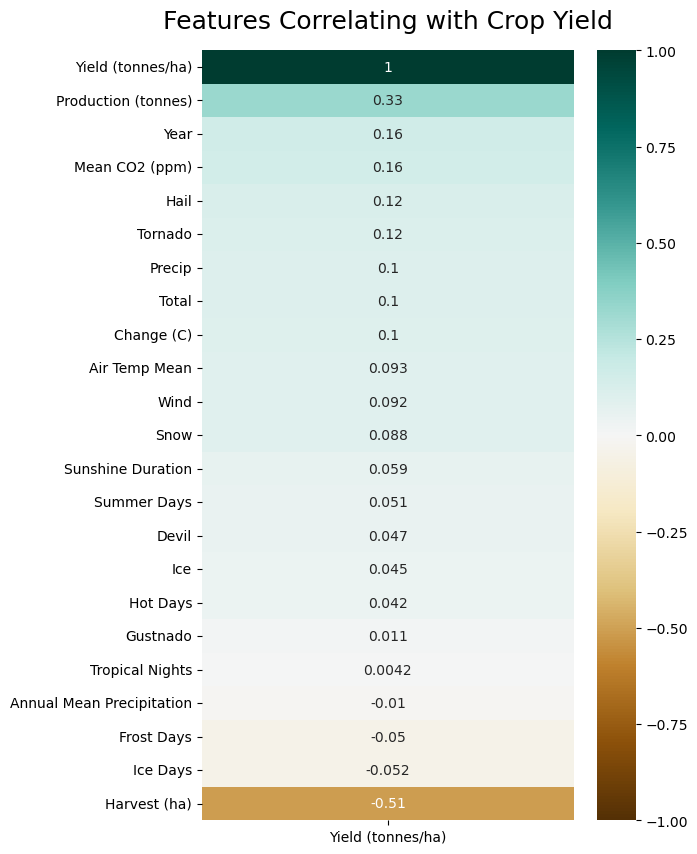

In [6]:
plt.figure(figsize=(6, 10))
heatmap = sns.heatmap(df.corr()[['Yield (tonnes/ha)']].sort_values(by='Yield (tonnes/ha)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Crop Yield', fontdict={'fontsize':18}, pad=16);

### Diving deep into the variables

Here we analyze the variables to understand if they fall under a Gaussian Distribution or not

In [7]:
crops = ['Wheat', 'Barley', 'Maize', 'Sugar beet', 'Potatoes', 'Rye', 'Rape', 'Apples', 'Grapes', 'Cabbages']
mask = df["Item"].str.contains("|".join(crops))
df = df[mask]
df.reset_index(drop=True, inplace=True)
crop_names = df["Item"].unique()

In [11]:
x = df[[
    'Year', 
    'Change (C)', 'Annual Mean Precipitation',
    'Air Temp Mean', 'Frost Days', 'Hot Days', 
    'Ice Days', 'Summer Days','Sunshine Duration', 
    'Tropical Nights', 'Mean CO2 (ppm)', "Devil",	
    'Gustnado',	'Hail',	'Ice',	'Precip',	'Snow',	
    'Tornado',	'Wind',	'Total']]

y = df["Yield (tonnes/ha)"]

In [16]:
master_norm = {}

for crop in crop_names:
    crop_df = df[df["Item"] == crop]
    # removing dependent variable
    crop_df = crop_df.drop(columns=["Item"])
    
    count_not = 0
    count = 0
    norm = []
    anorm = []
    
    for col in crop_df.columns:
        # Perform normality test
        stat, p = normaltest(crop_df[col])

        # Check if p-value is below significance level of 0.05
        if p < 0.05:
            count_not += 1
            anorm.append(col)
        else:
            count += 1 
            norm.append(col)
    
    master_norm[crop] = {"Normal":count, "Not Normal":count_not}

c:\Users\johna\anaconda3\envs\thesis\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [17]:
master_norm

{'Barley': {'Normal': 7, 'Not Normal': 16},
 'Cabbages': {'Normal': 7, 'Not Normal': 16},
 'Maize (corn)': {'Normal': 6, 'Not Normal': 17},
 'Potatoes': {'Normal': 6, 'Not Normal': 17},
 'Rape or colza seed': {'Normal': 8, 'Not Normal': 15},
 'Rye': {'Normal': 6, 'Not Normal': 17},
 'Sugar beet': {'Normal': 8, 'Not Normal': 15},
 'Wheat': {'Normal': 6, 'Not Normal': 17},
 'Apples': {'Normal': 9, 'Not Normal': 14},
 'Grapes': {'Normal': 17, 'Not Normal': 6}}

## Testing for linearity

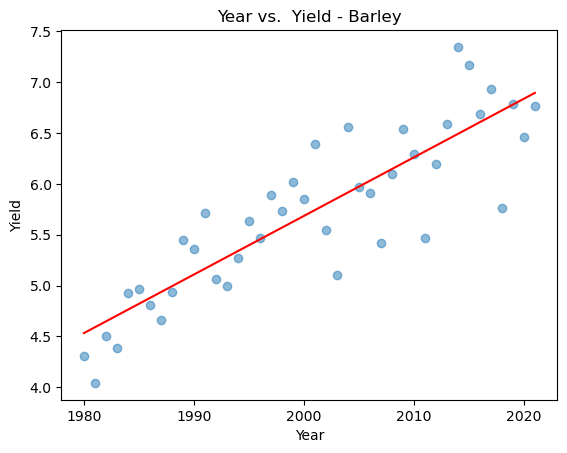

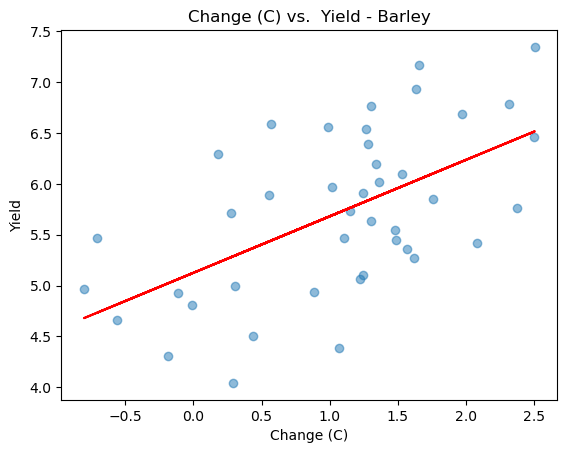

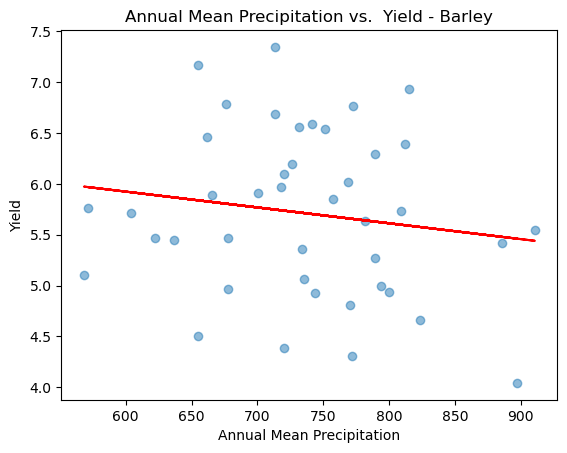

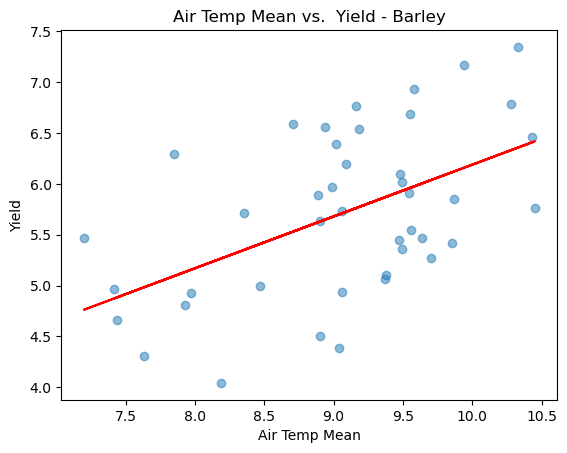

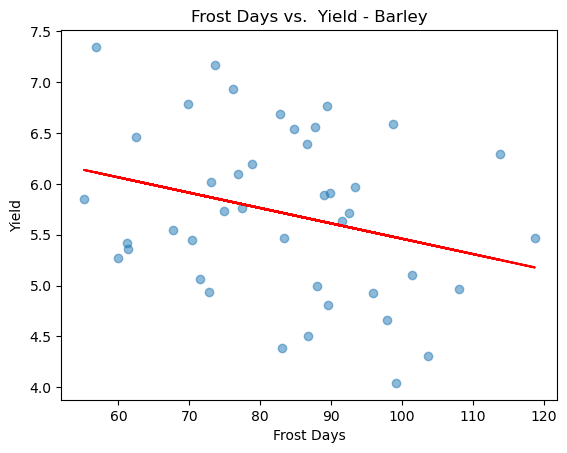

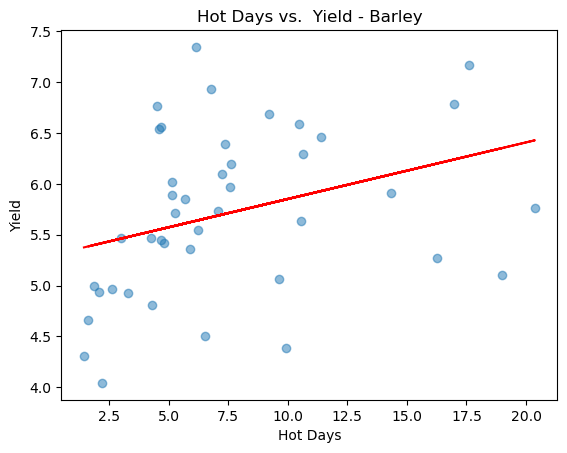

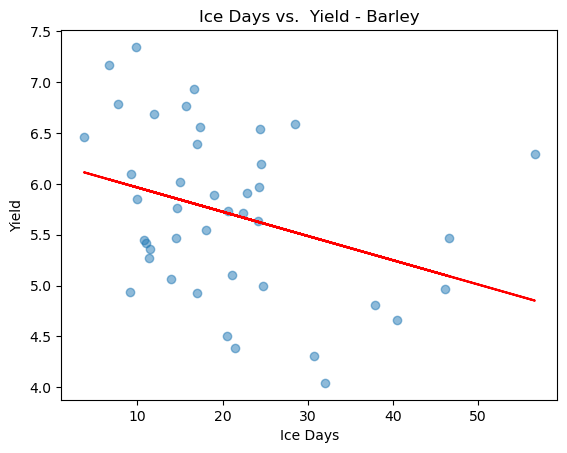

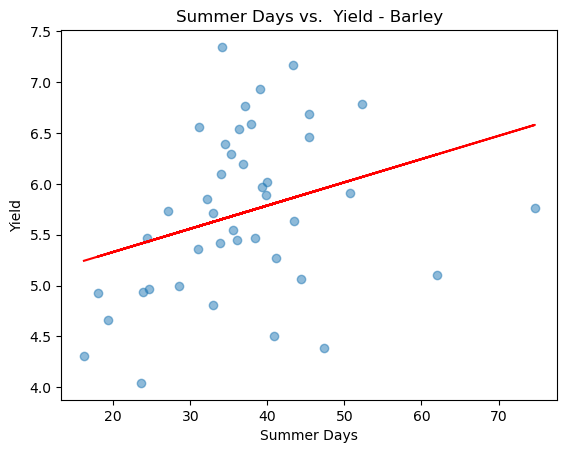

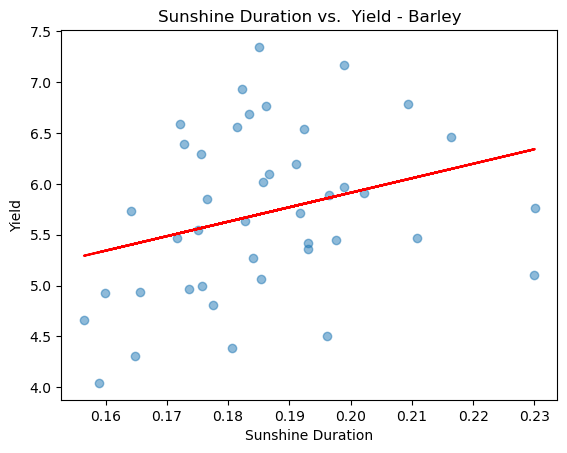

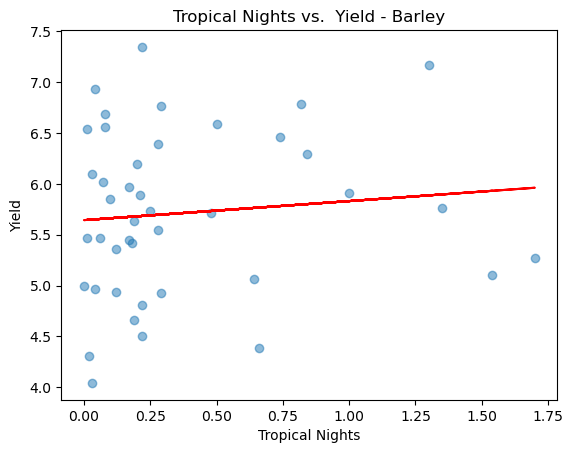

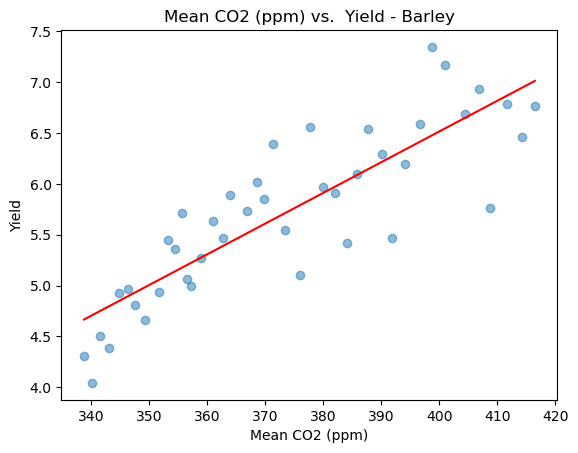

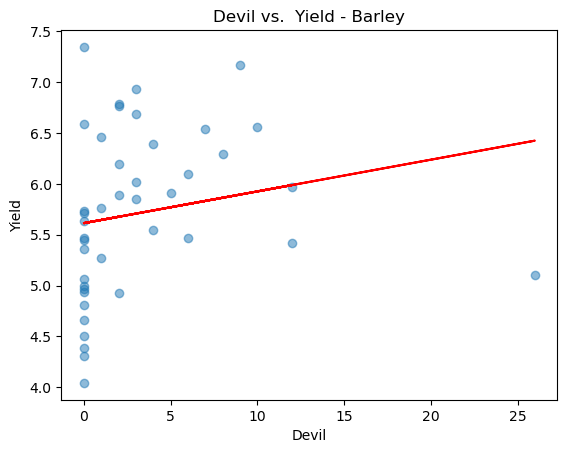

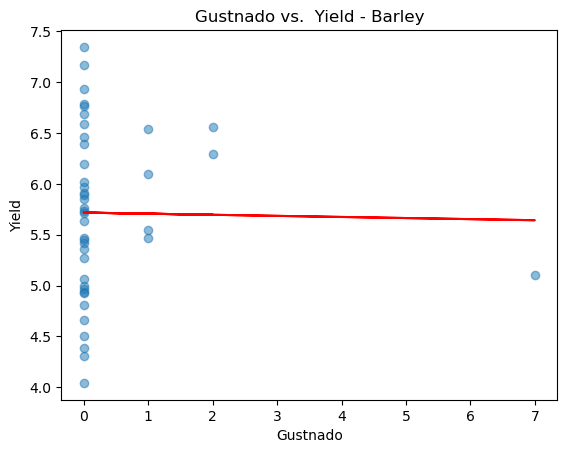

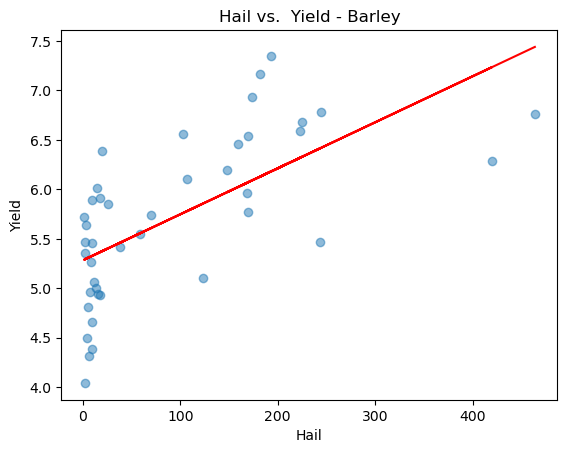

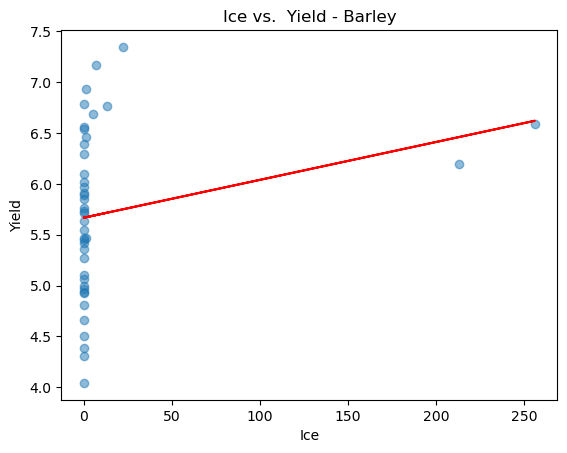

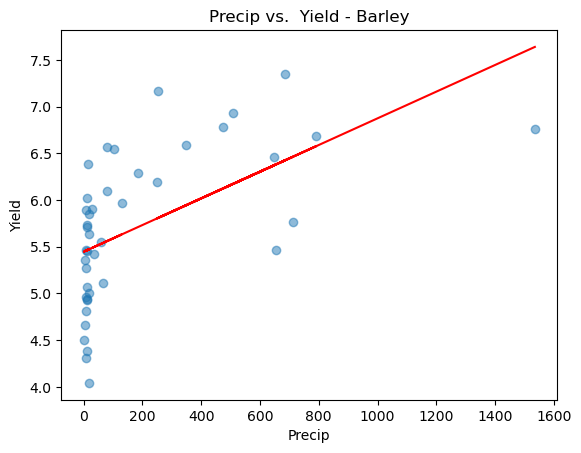

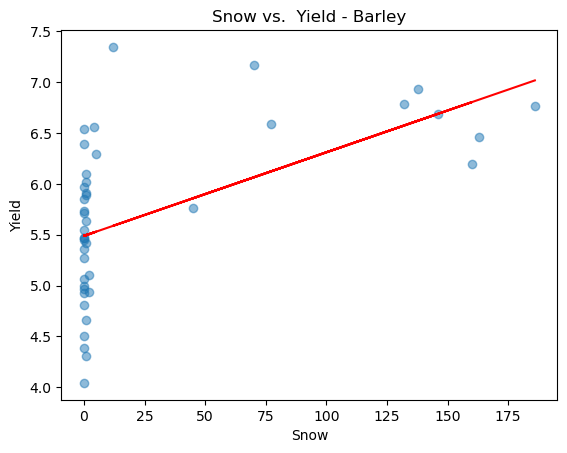

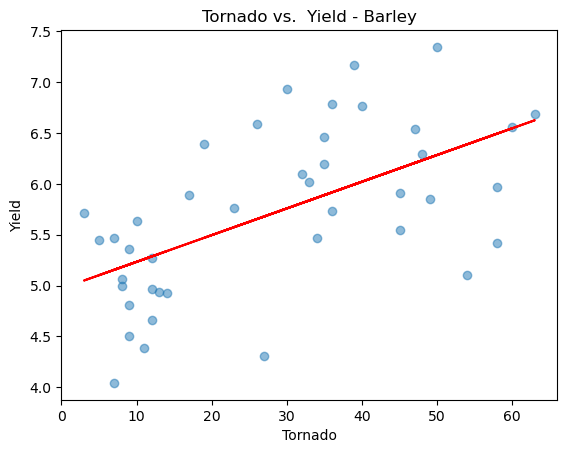

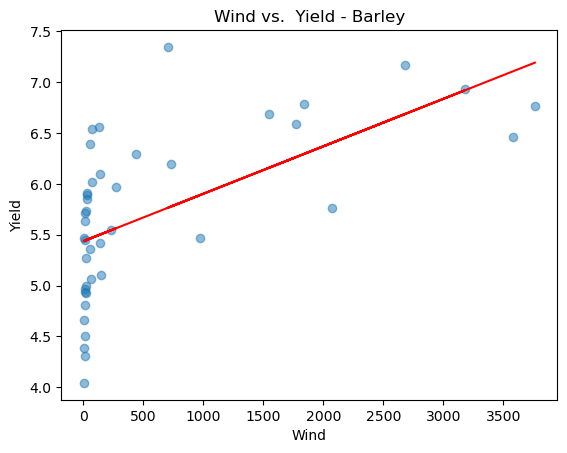

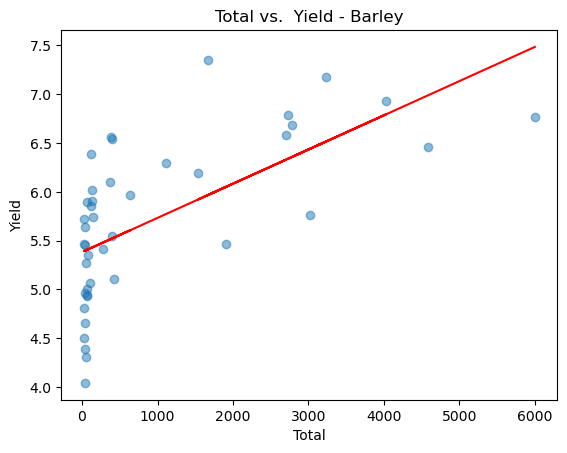

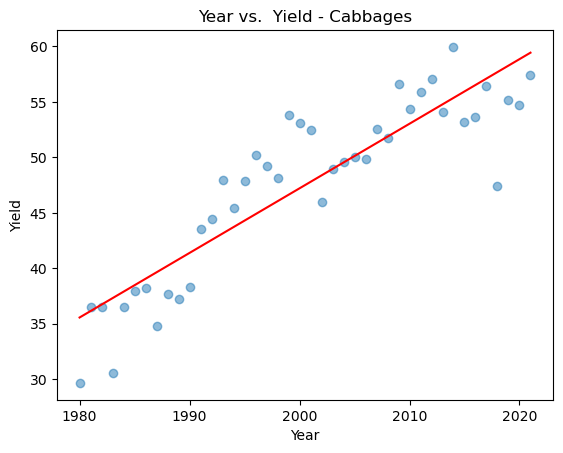

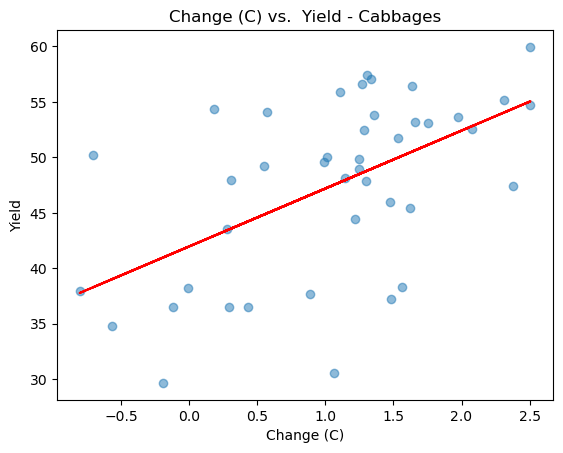

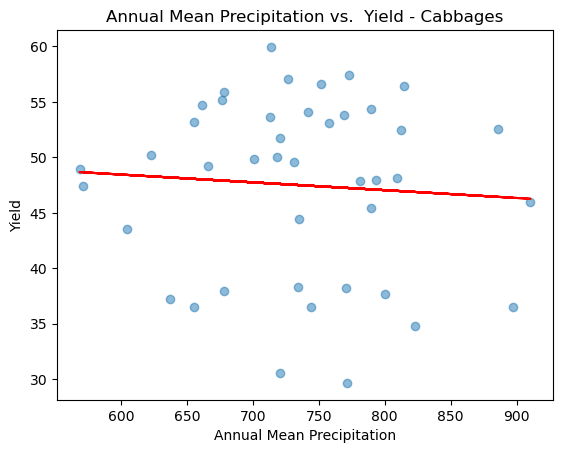

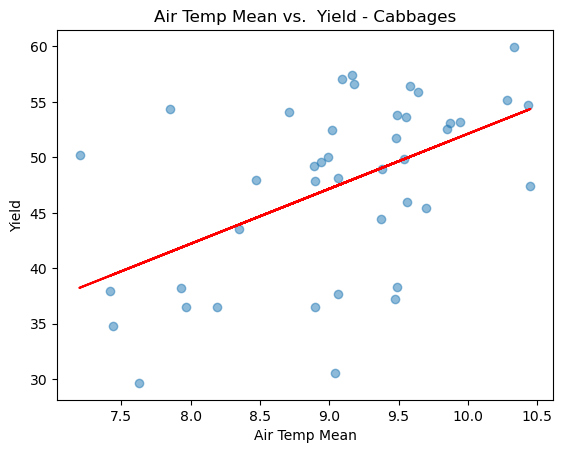

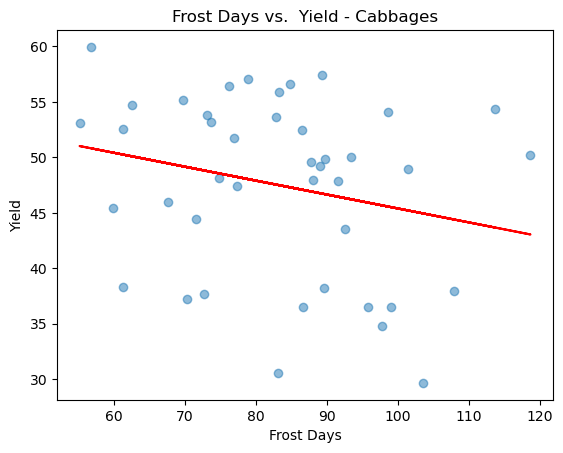

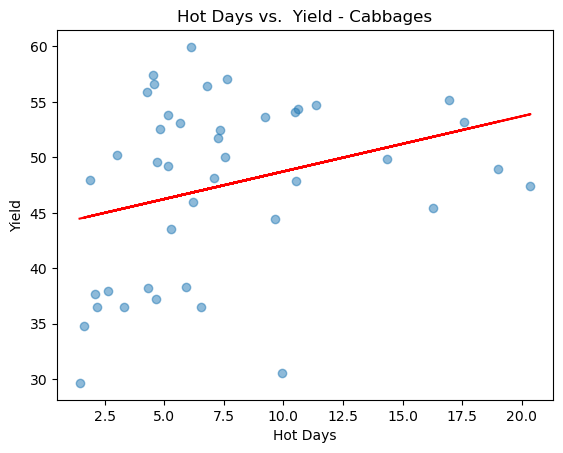

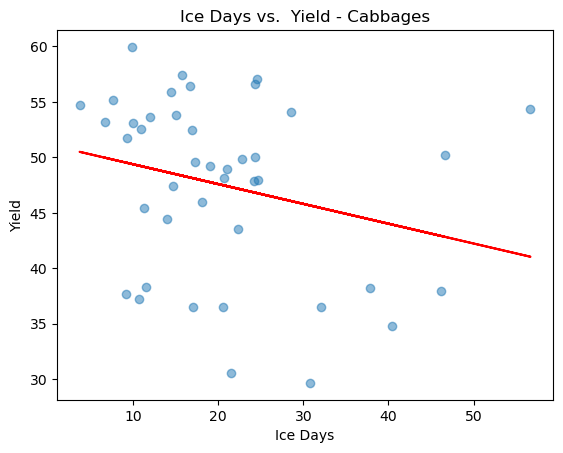

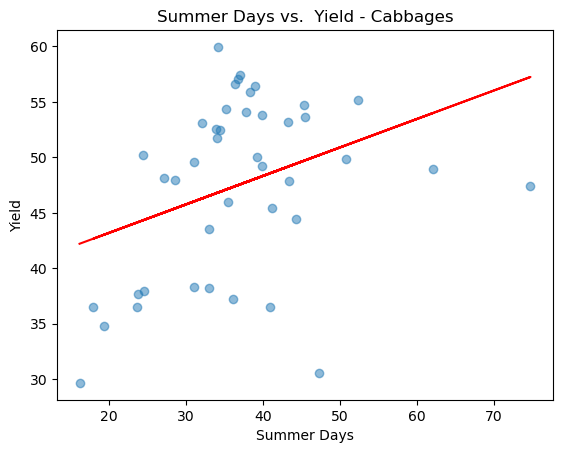

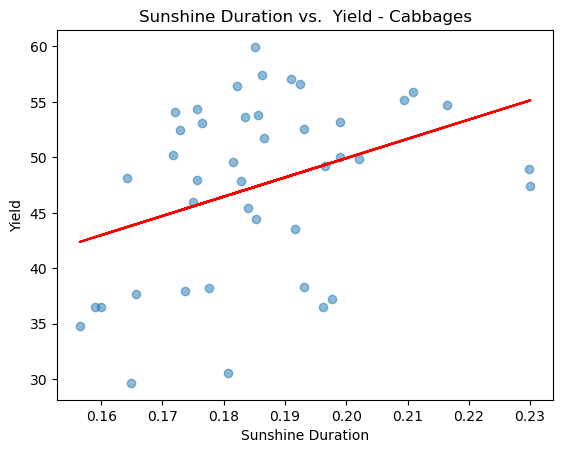

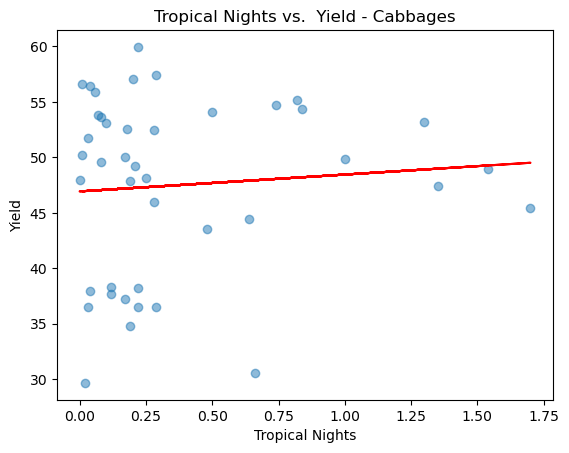

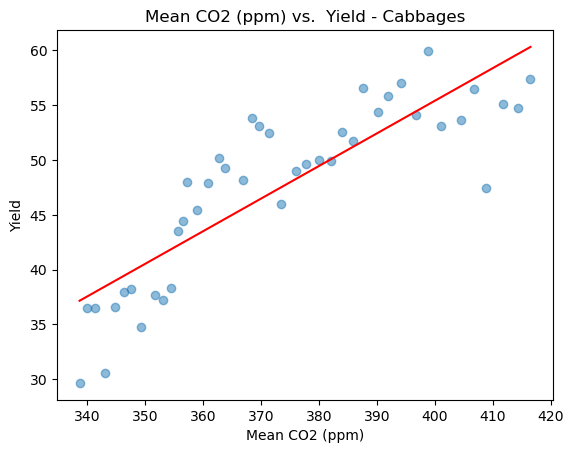

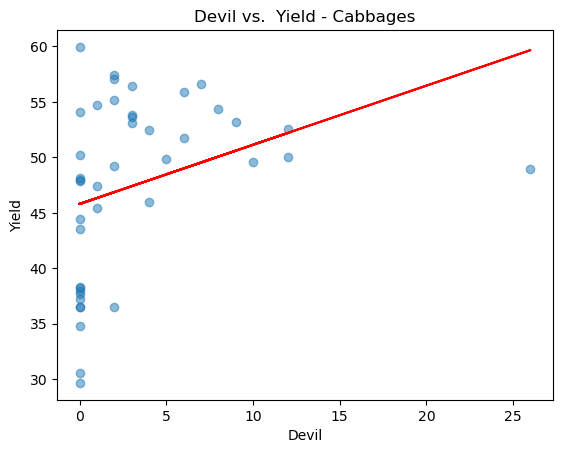

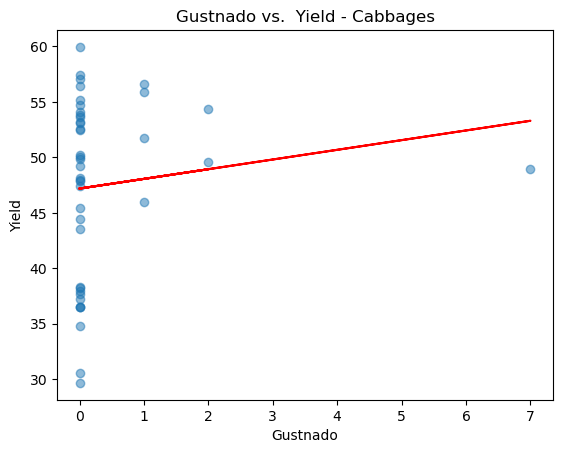

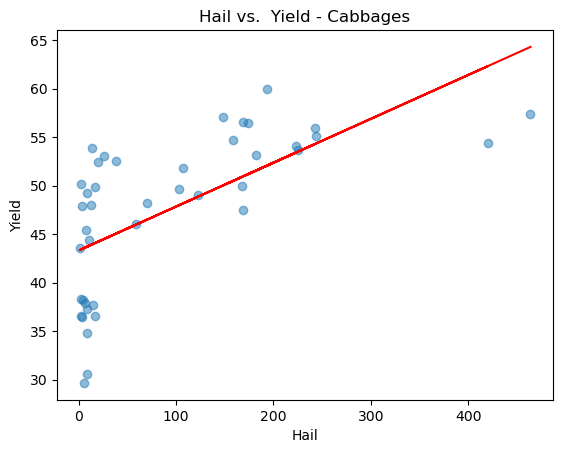

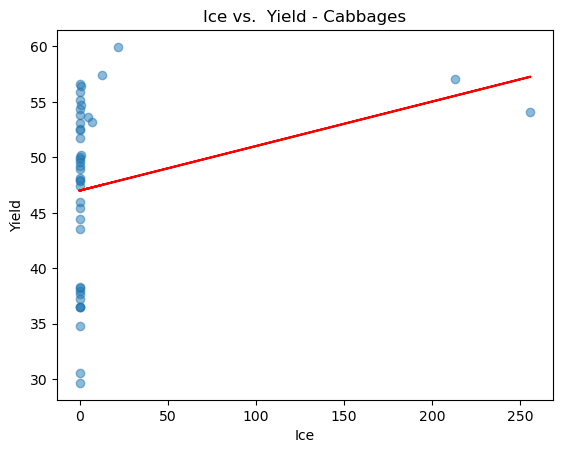

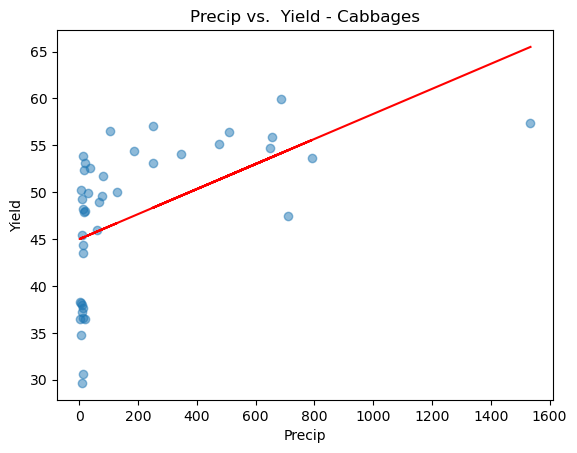

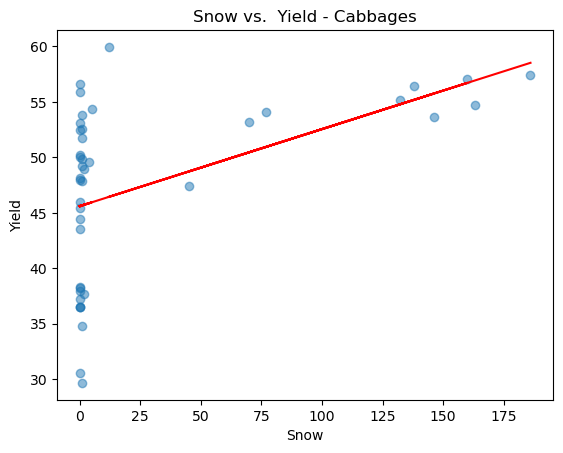

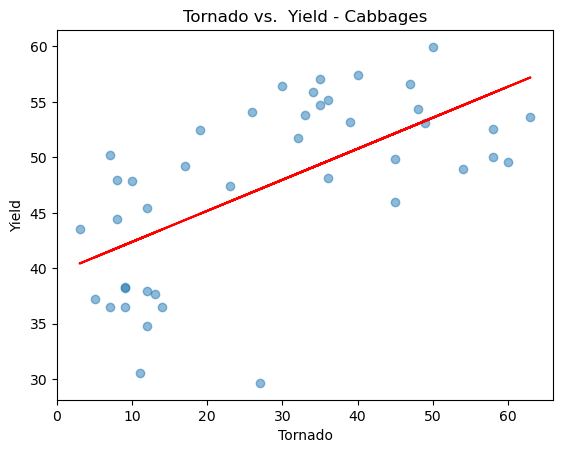

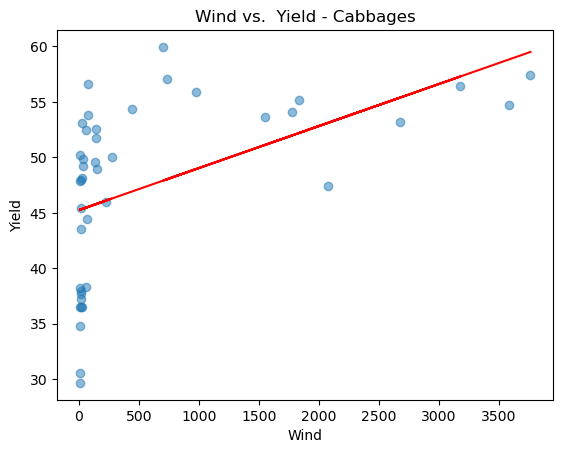

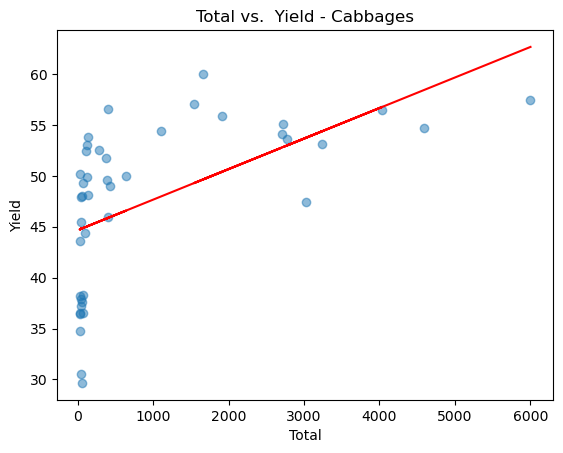

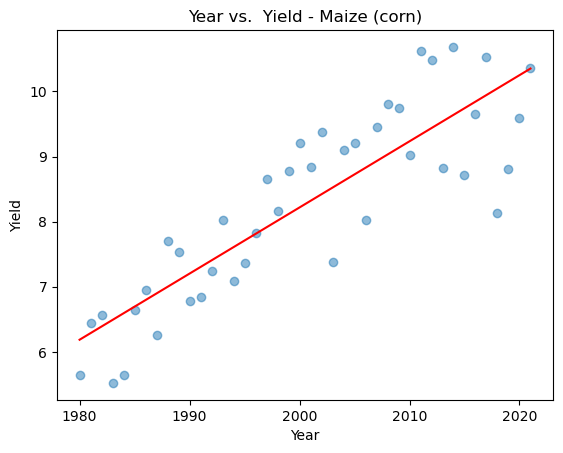

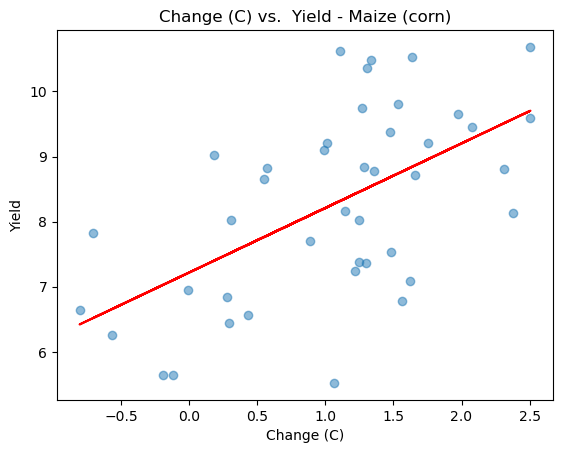

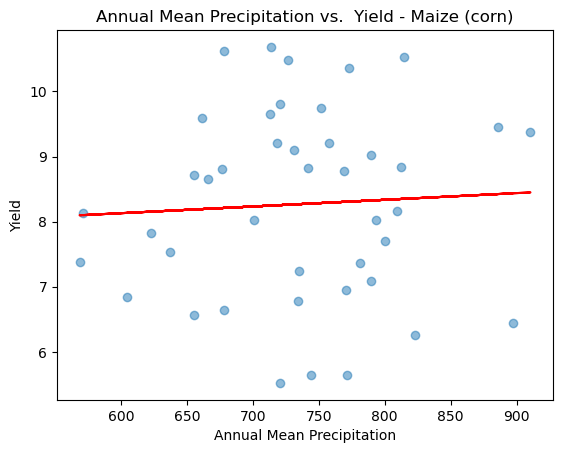

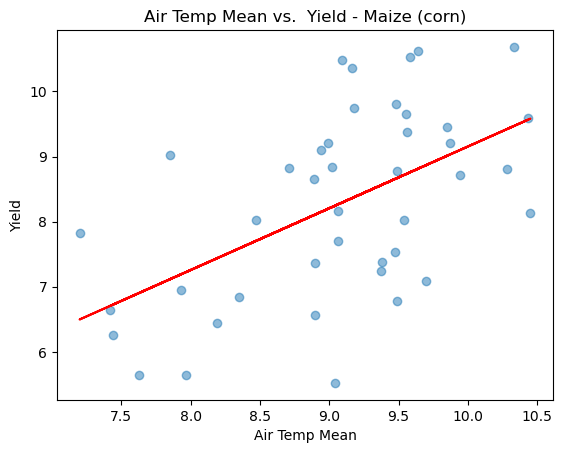

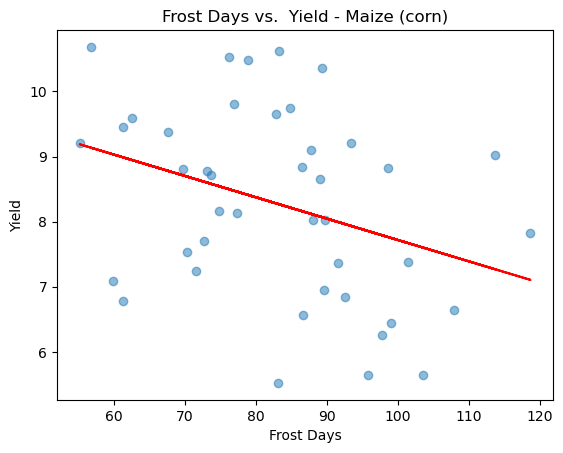

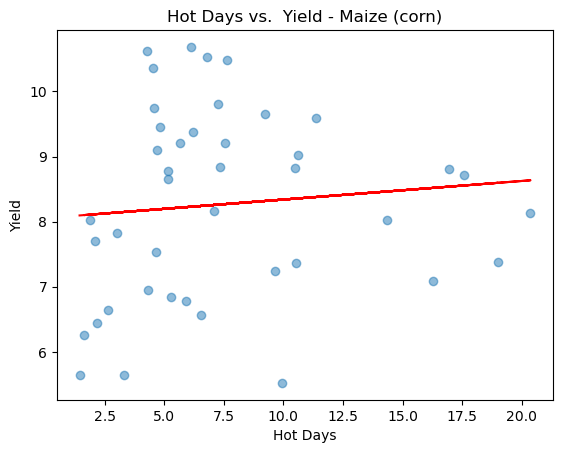

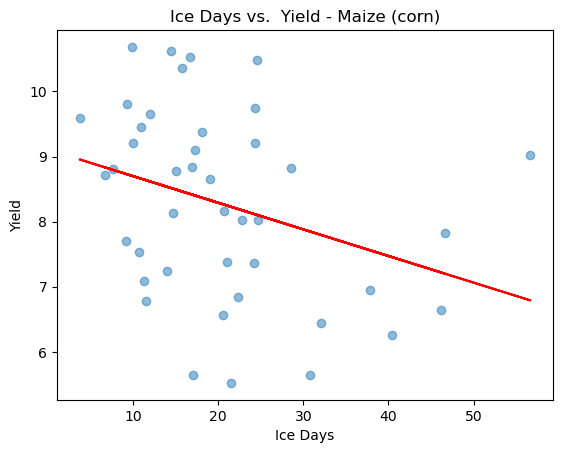

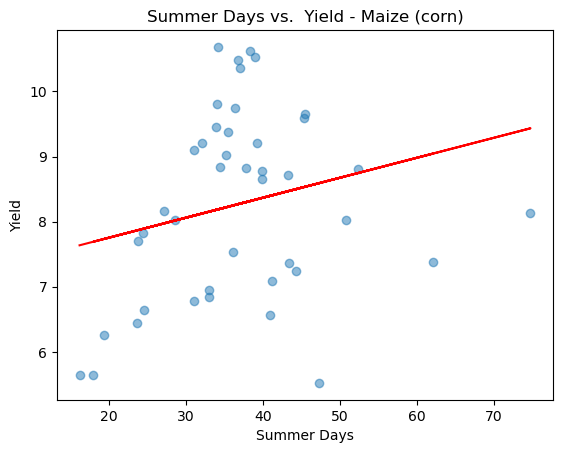

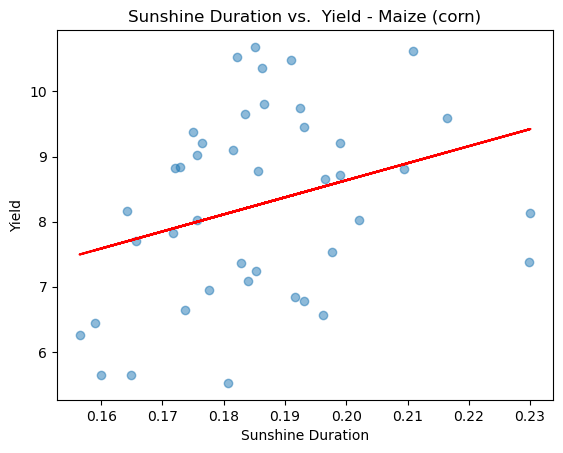

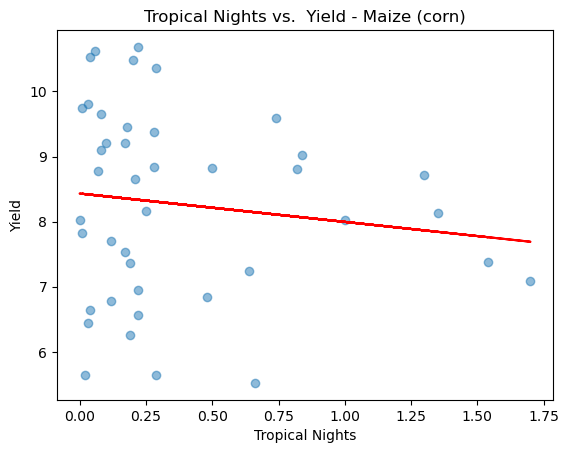

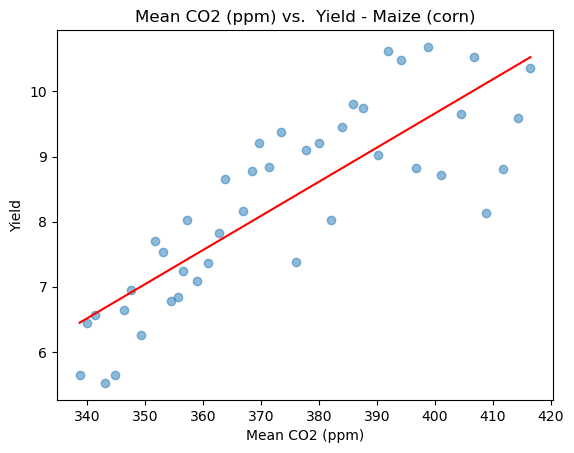

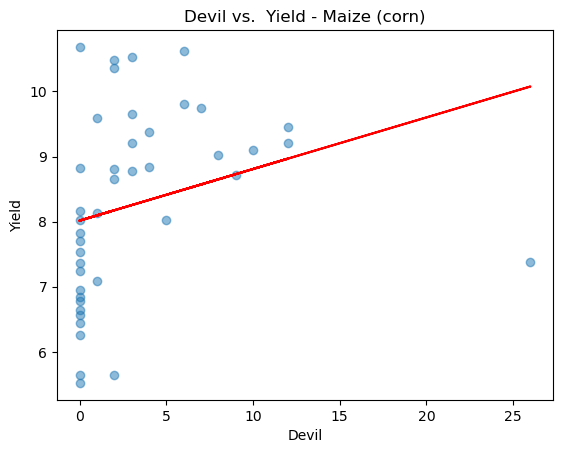

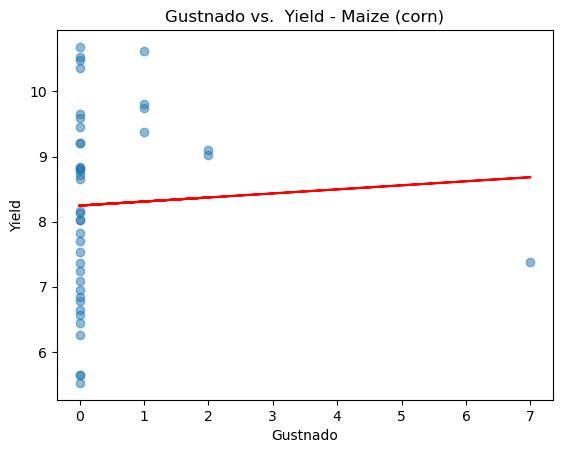

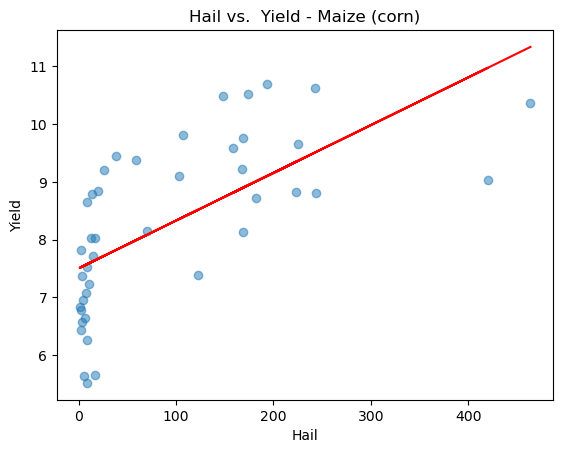

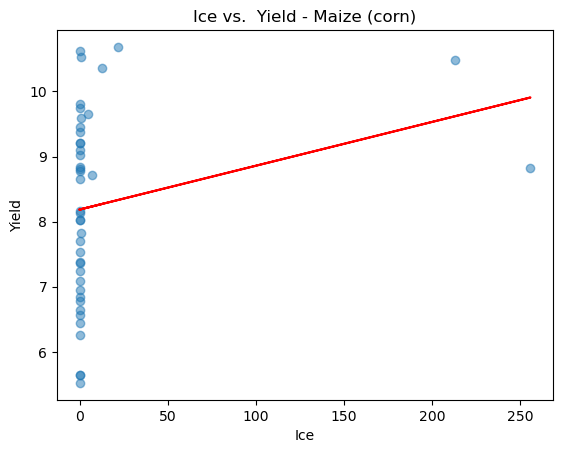

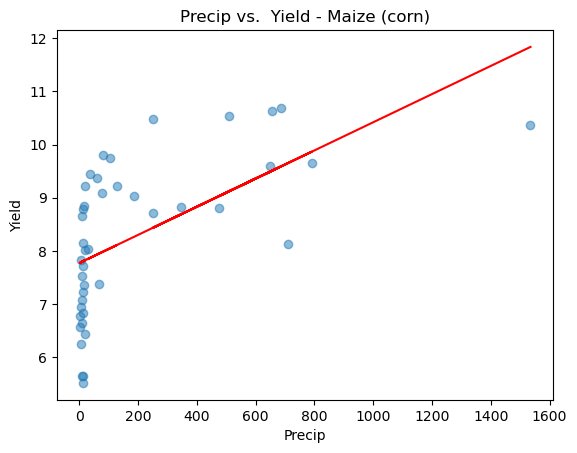

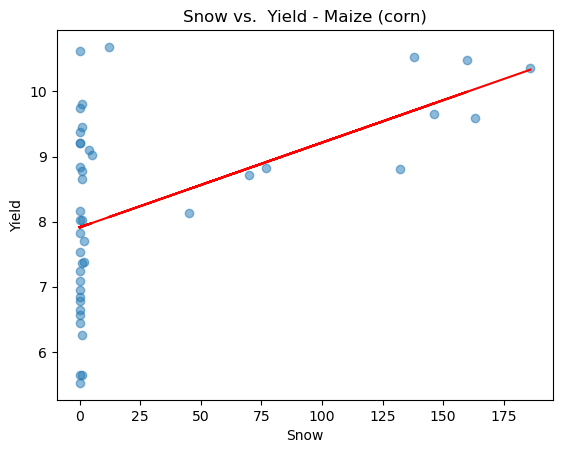

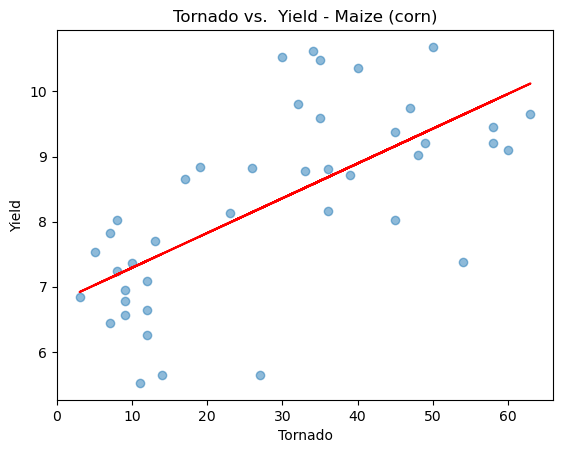

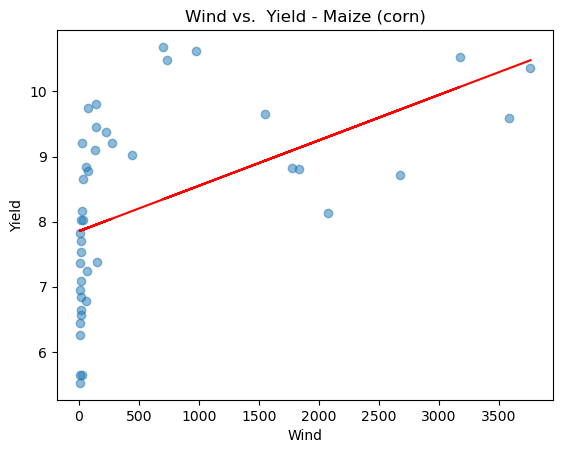

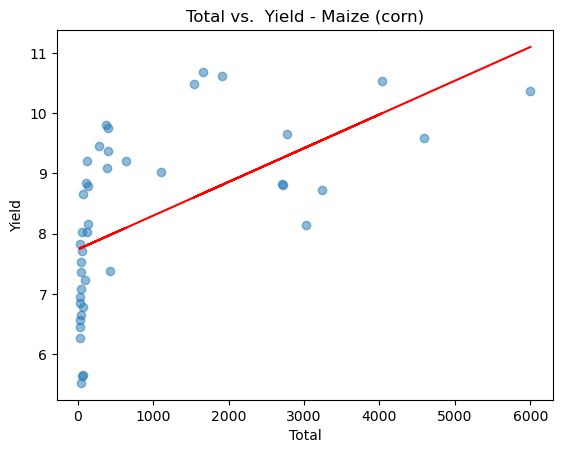

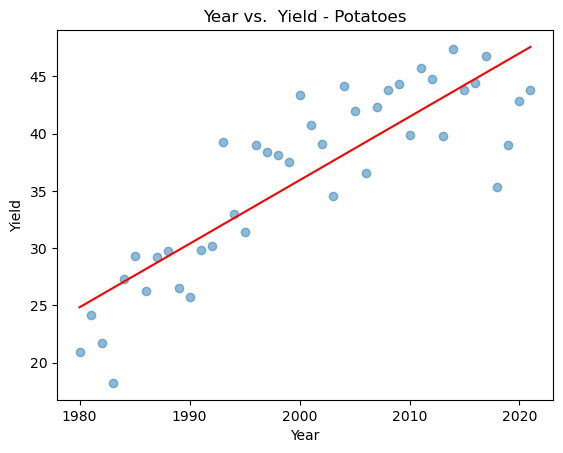

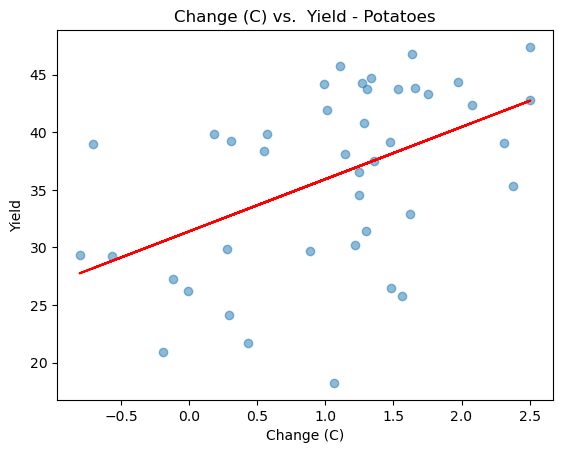

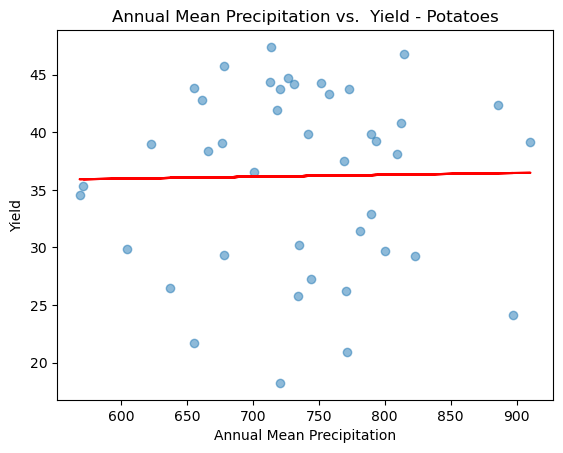

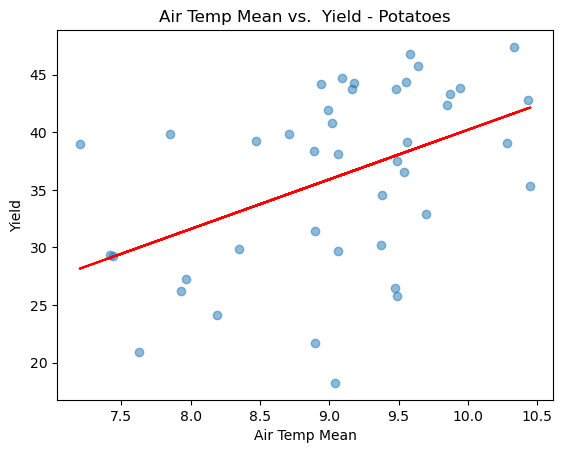

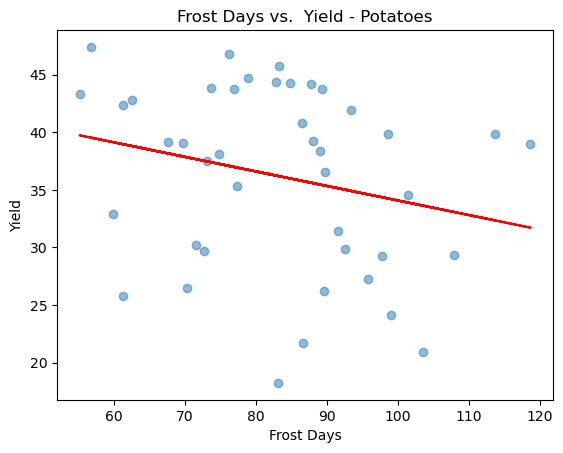

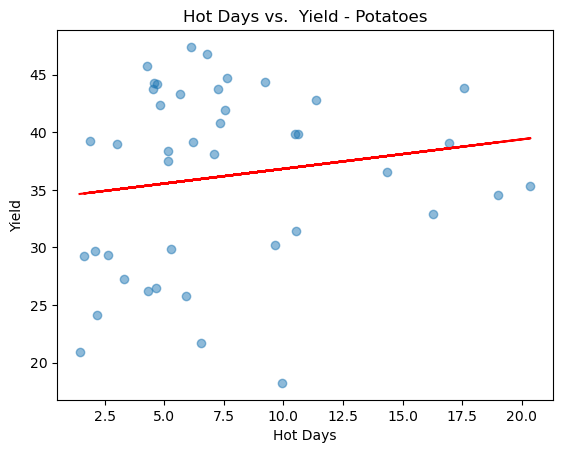

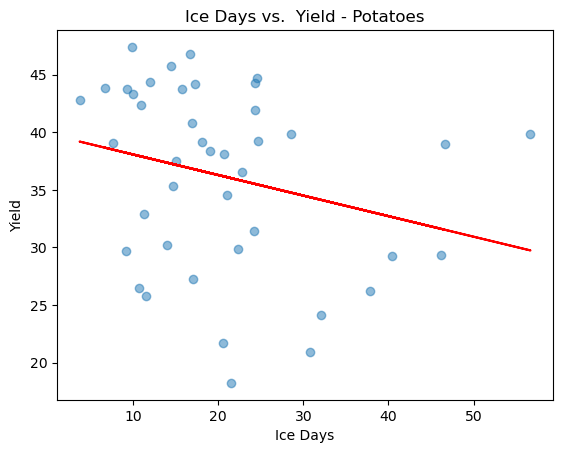

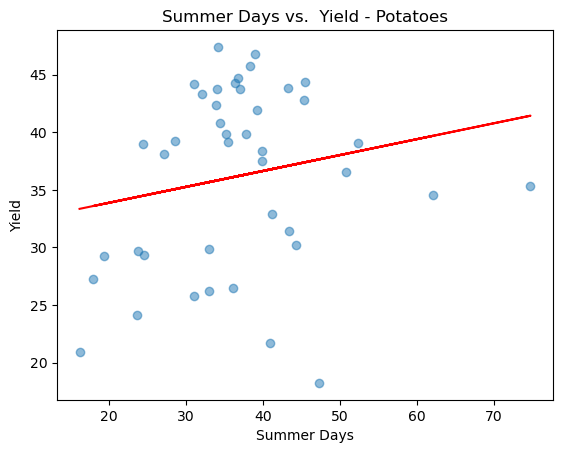

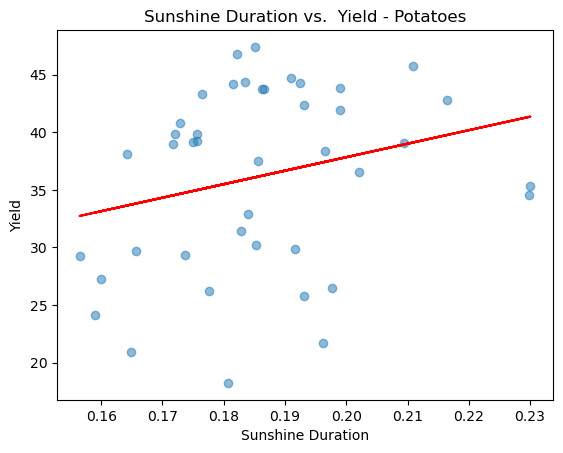

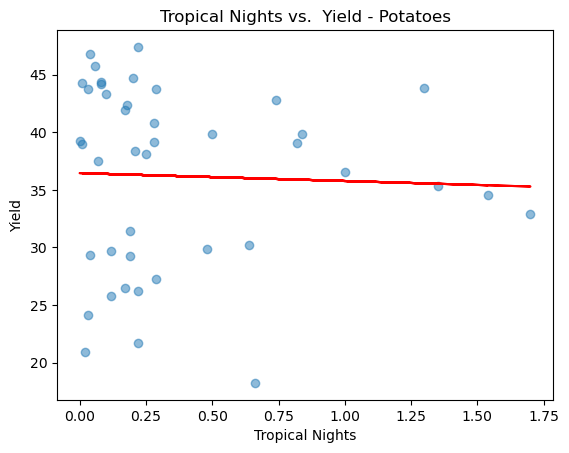

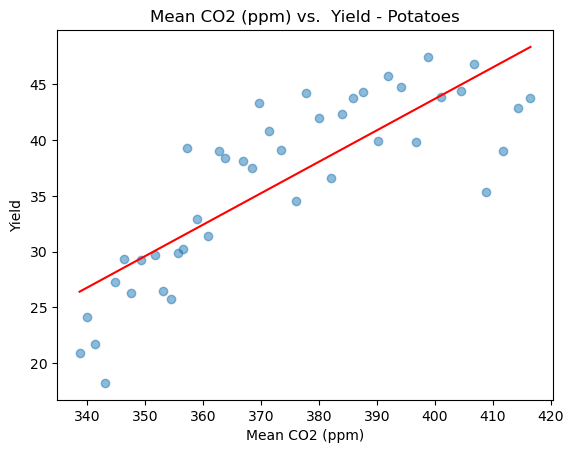

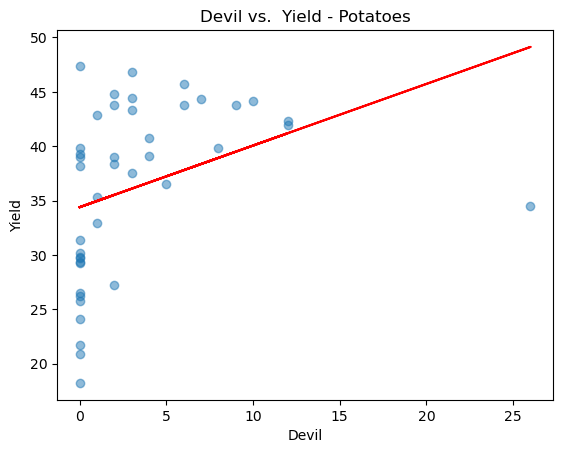

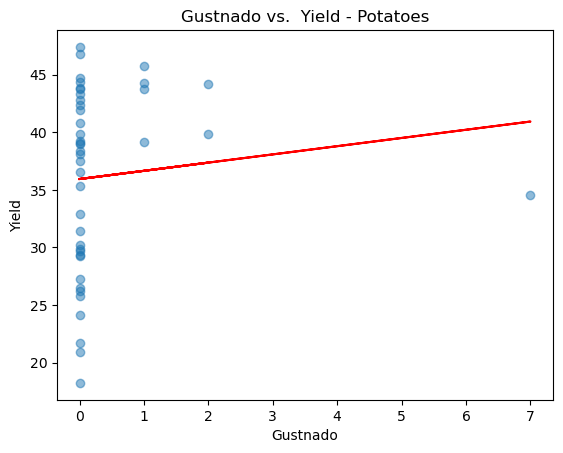

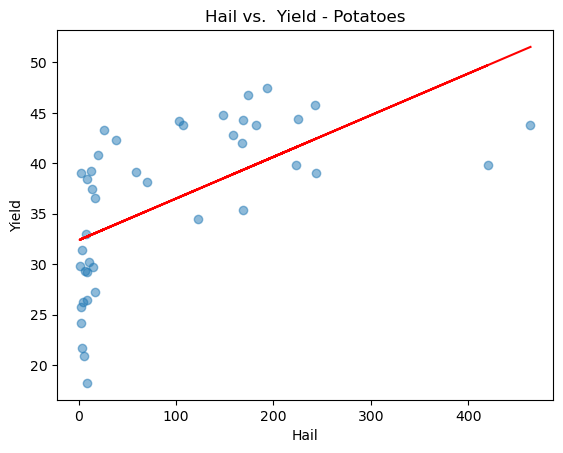

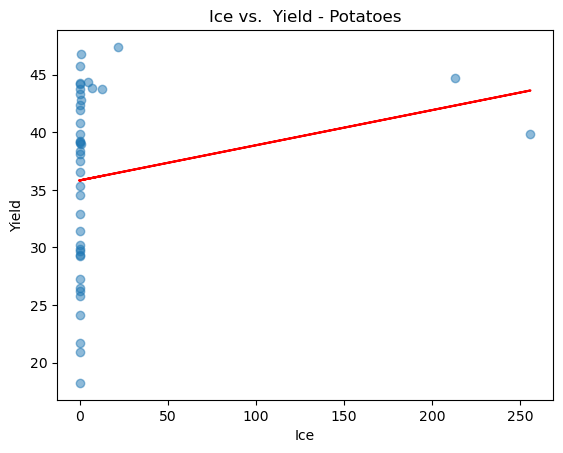

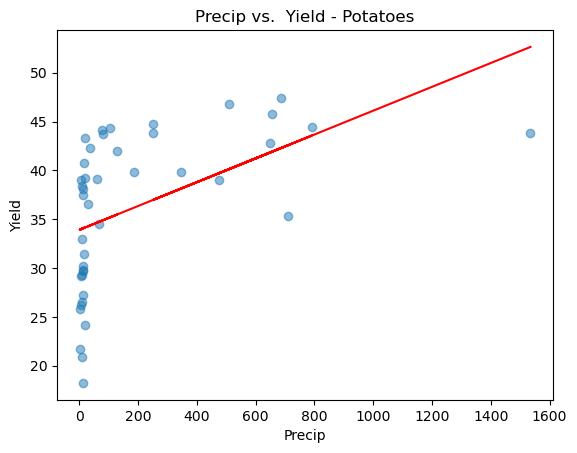

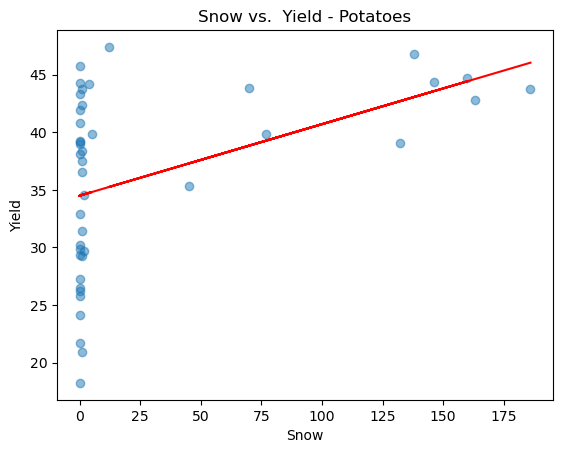

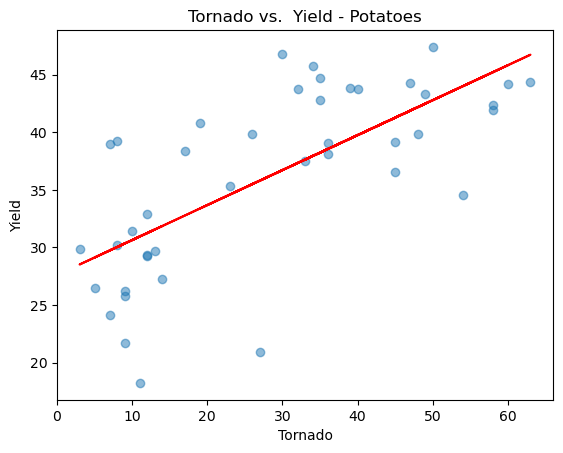

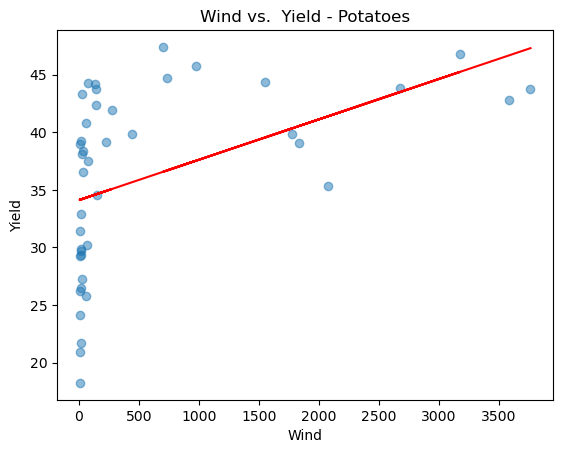

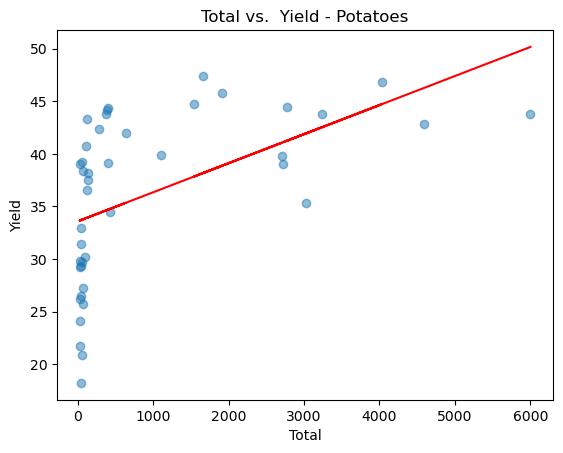

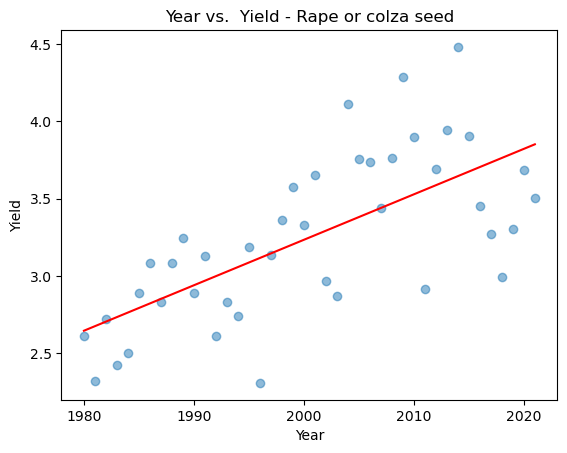

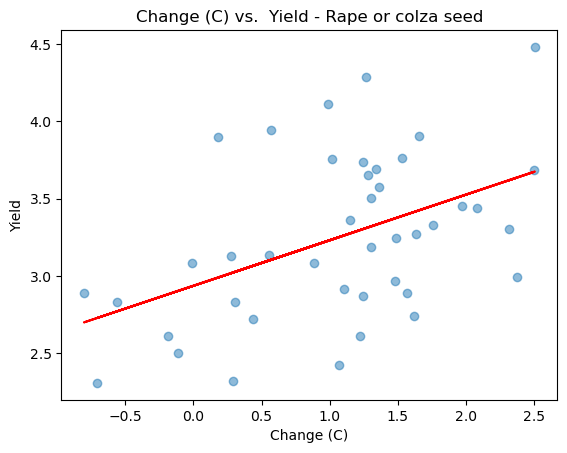

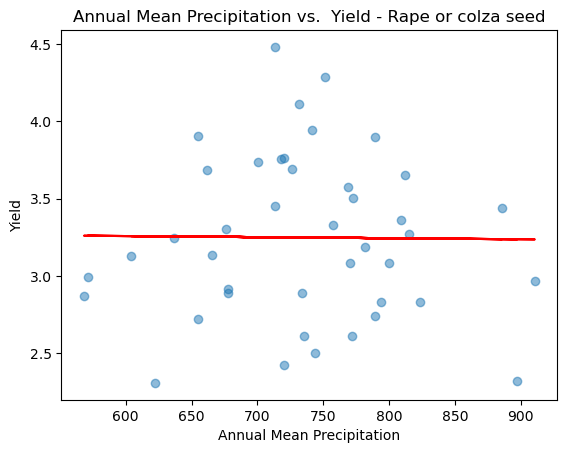

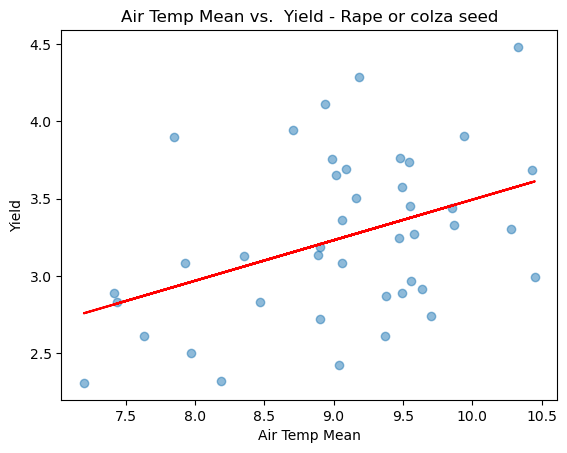

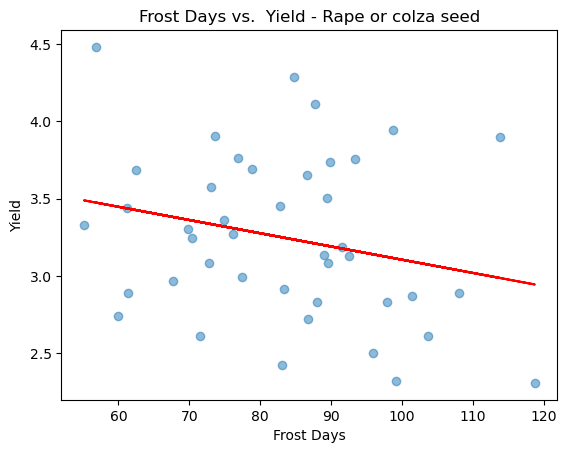

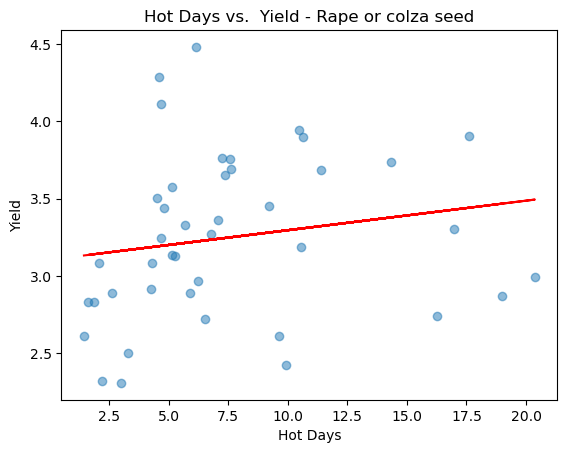

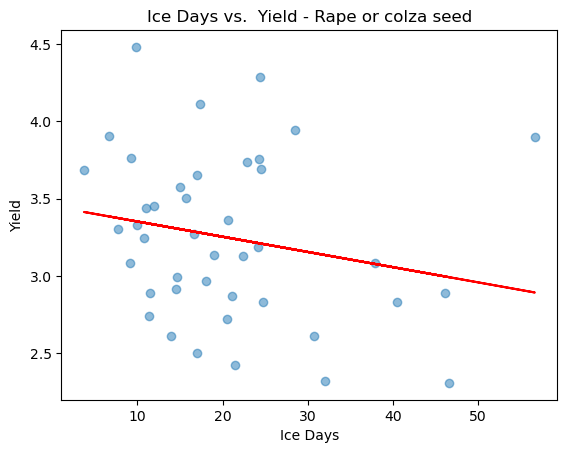

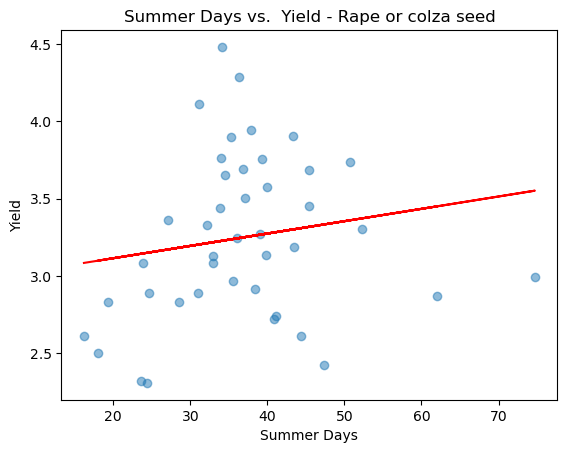

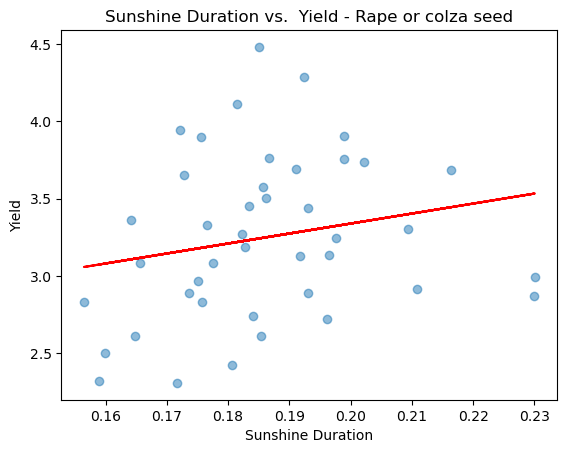

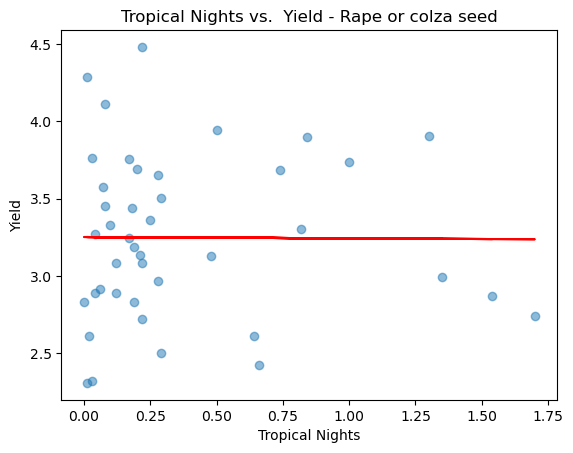

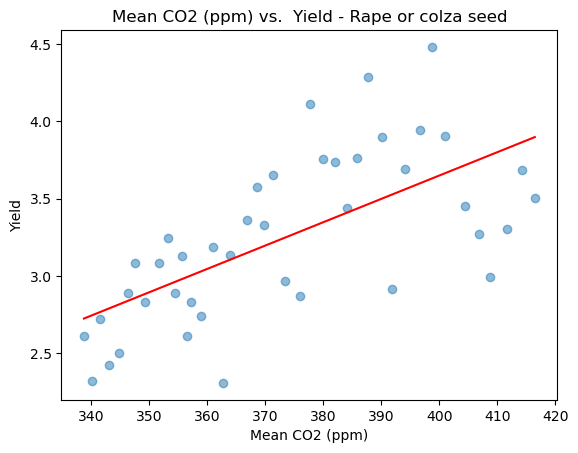

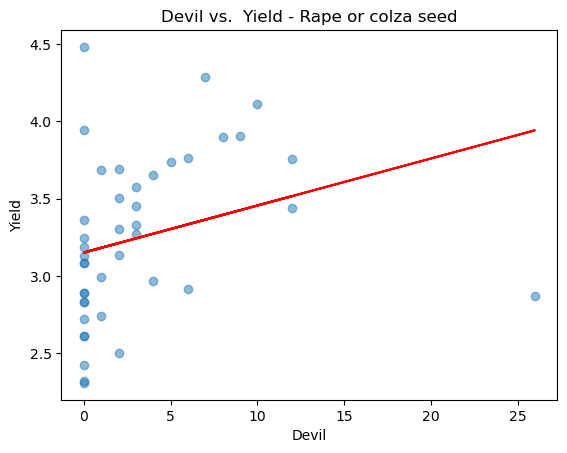

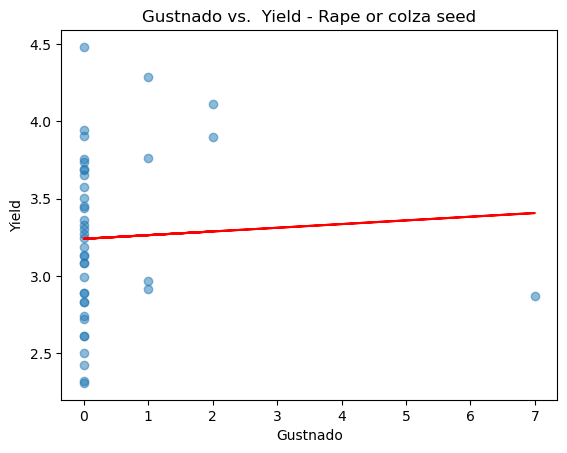

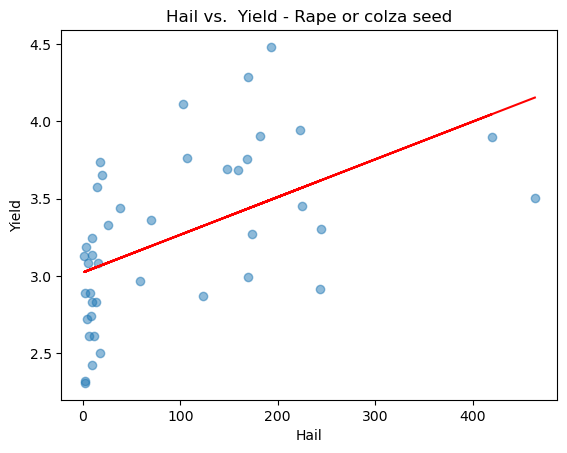

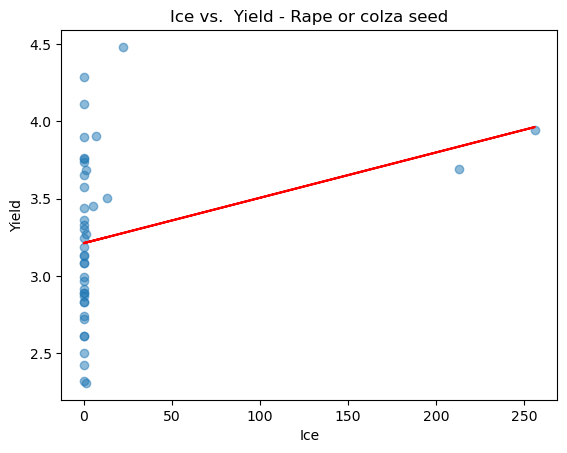

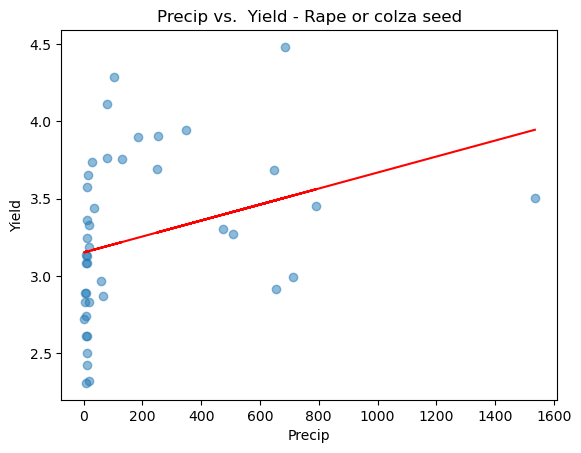

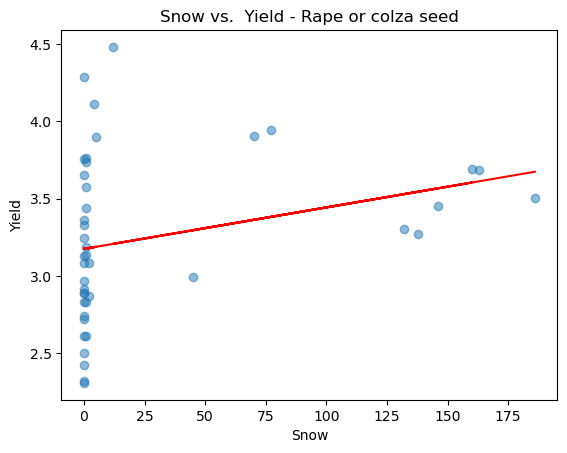

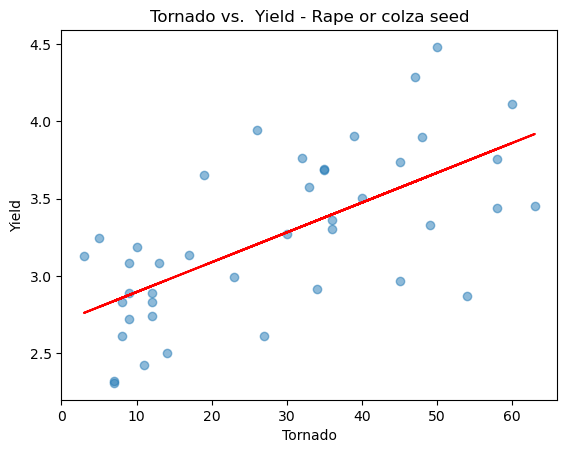

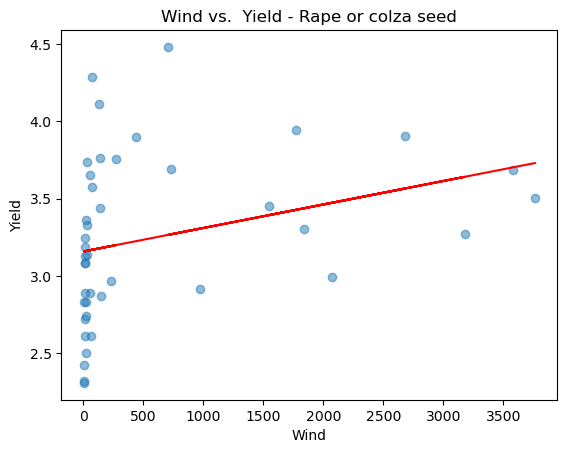

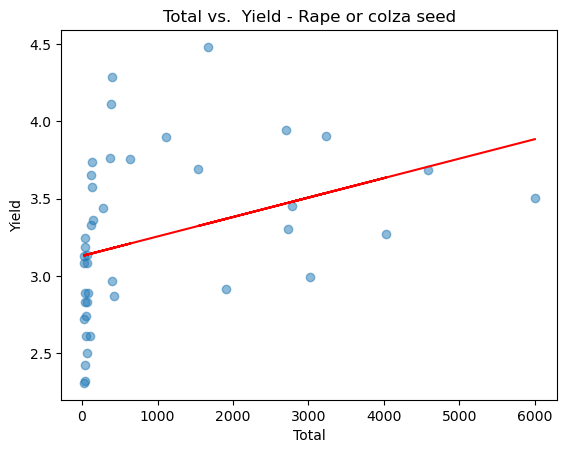

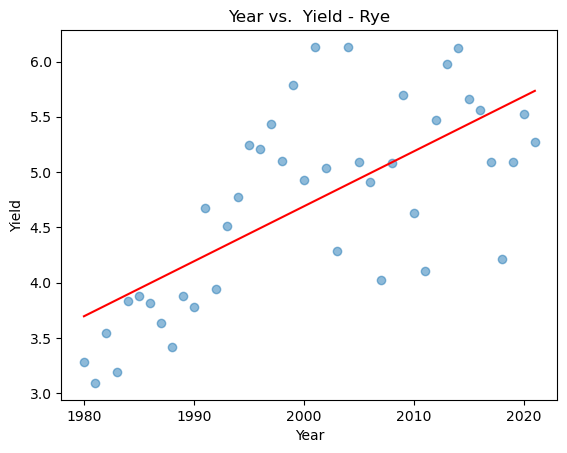

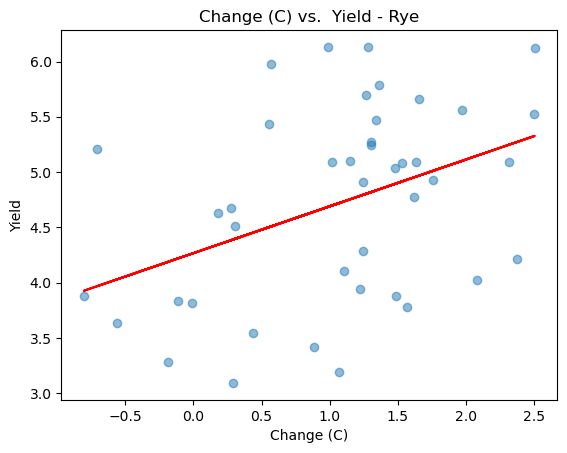

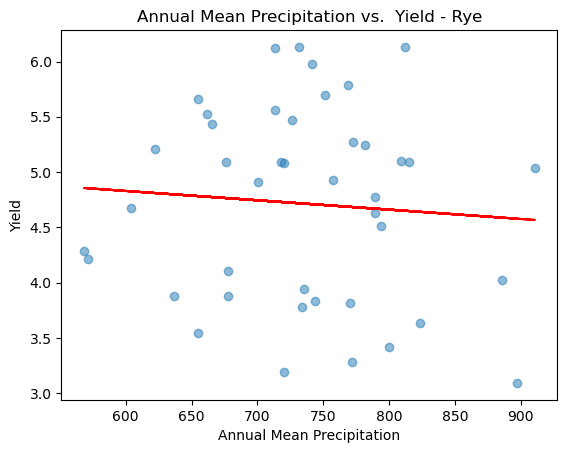

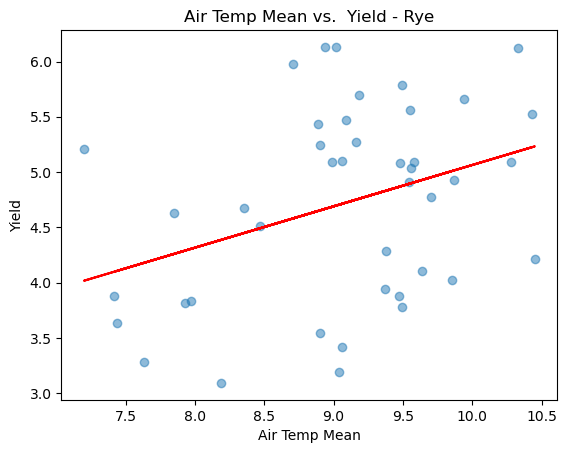

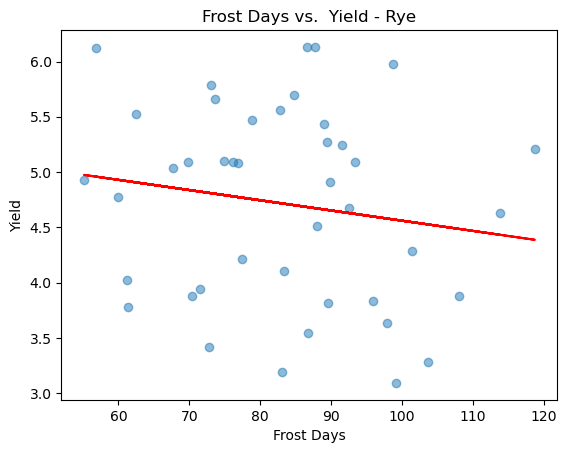

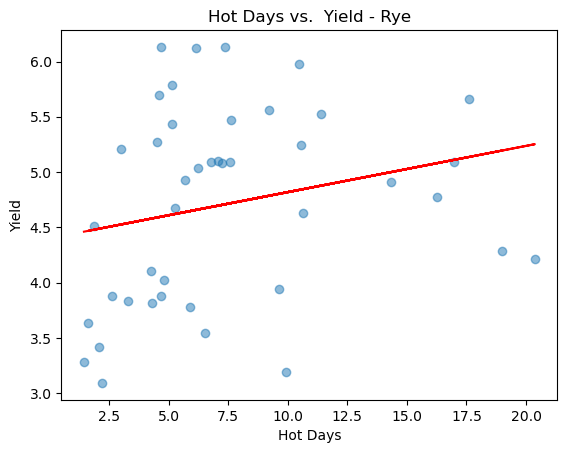

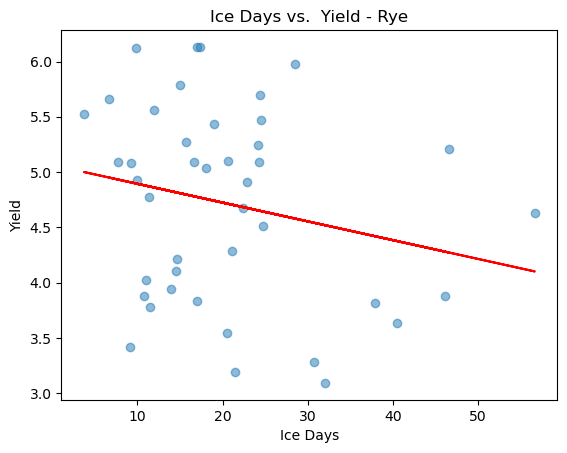

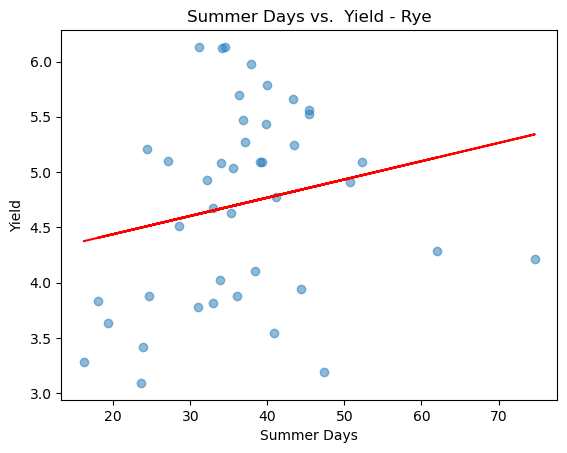

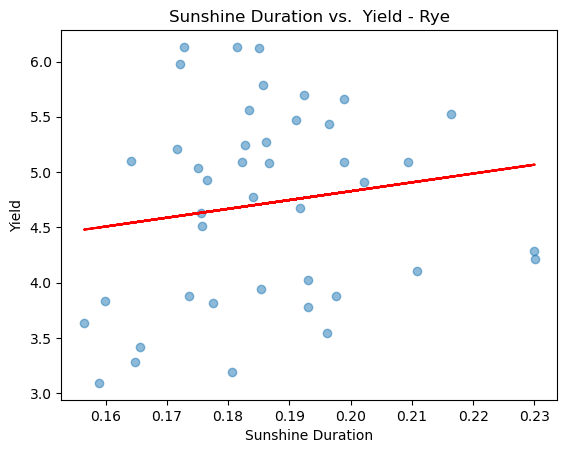

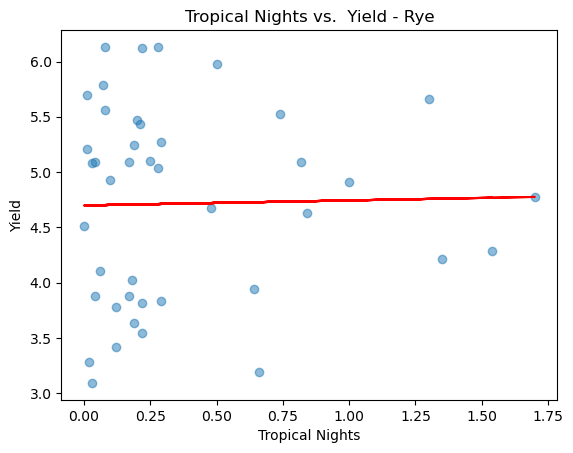

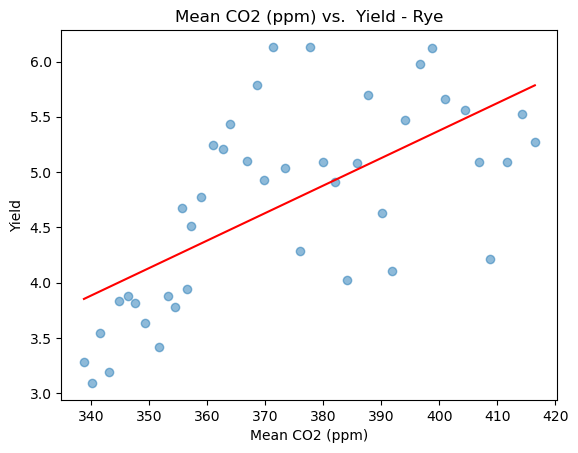

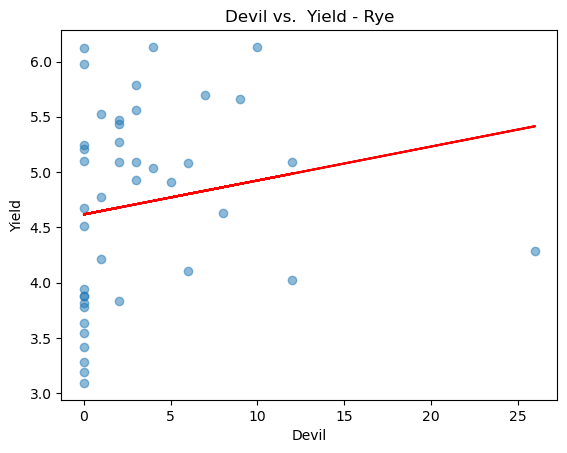

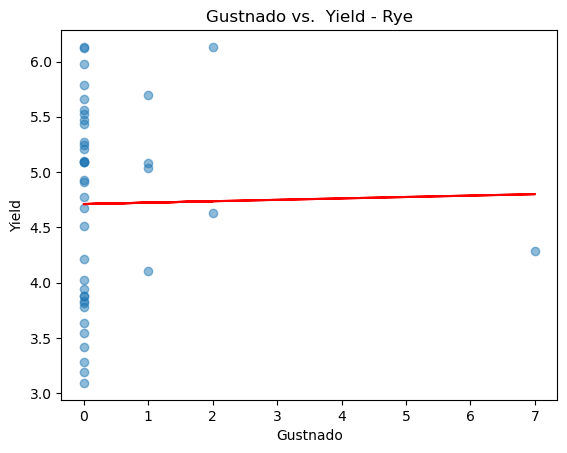

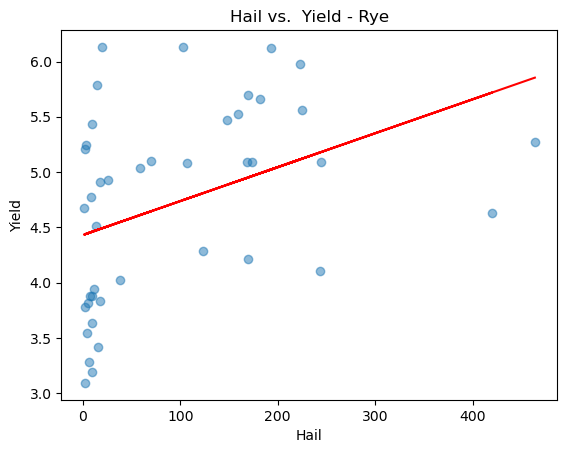

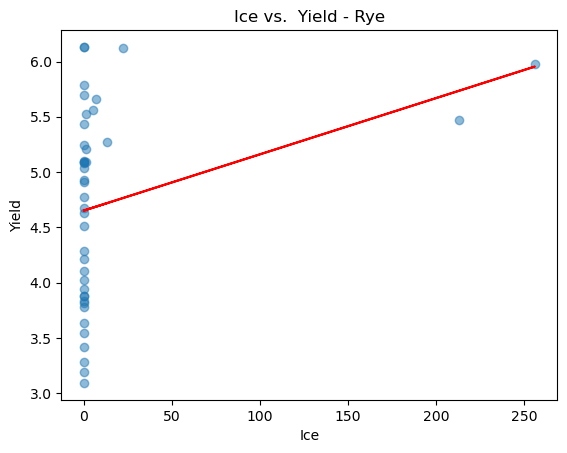

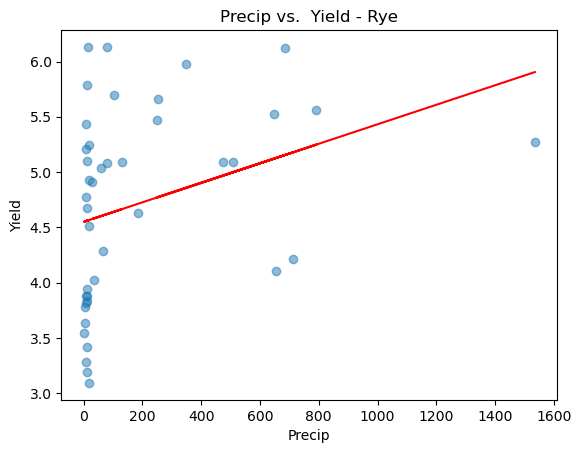

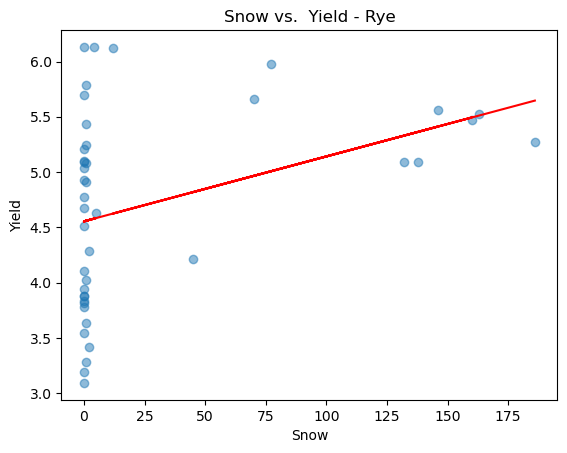

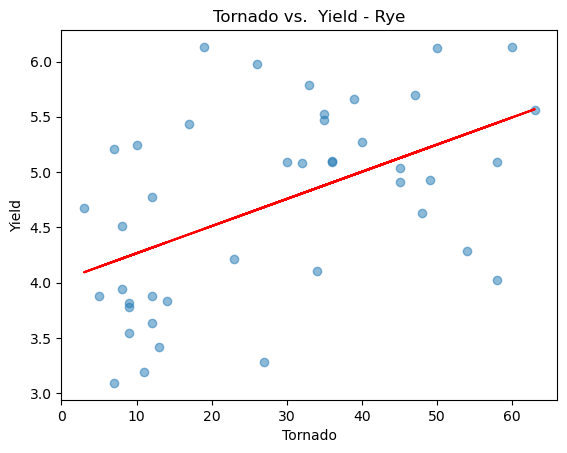

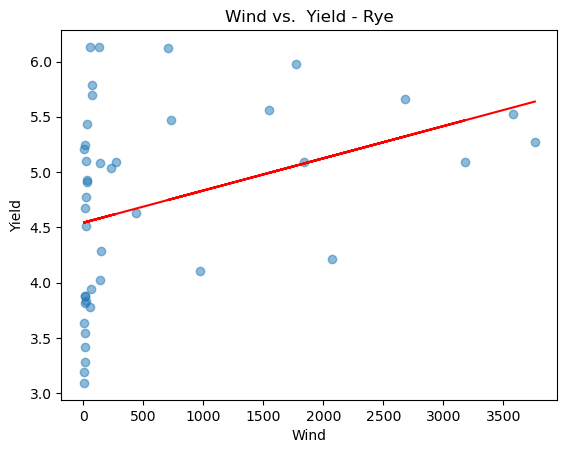

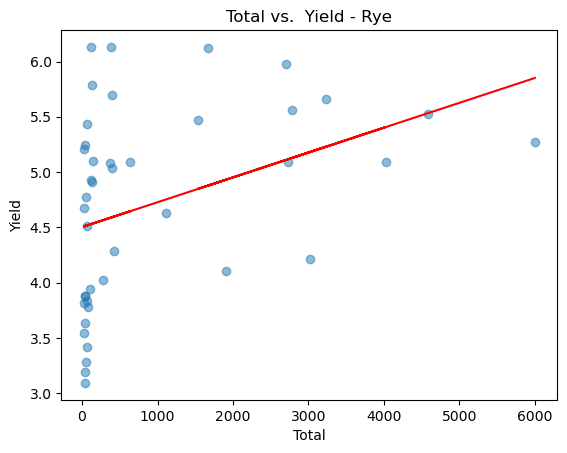

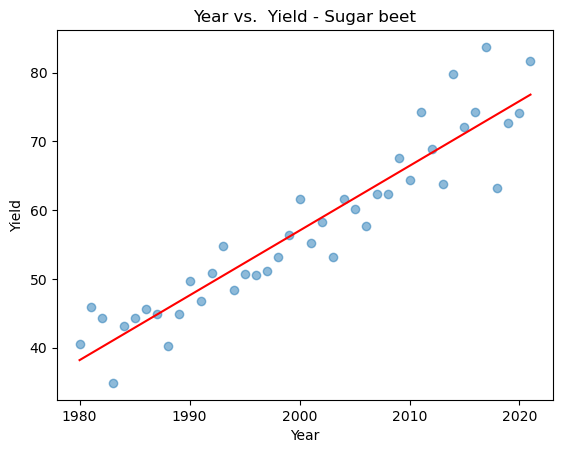

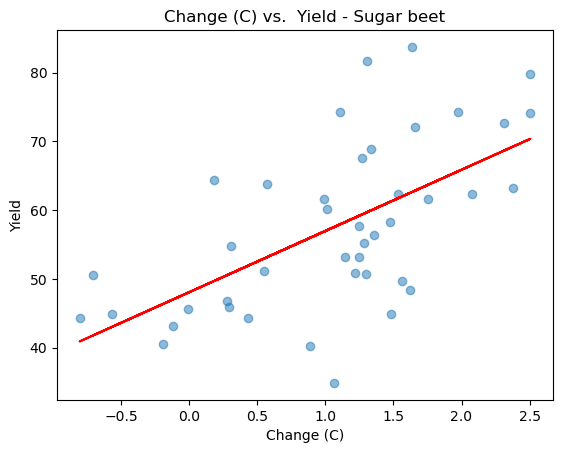

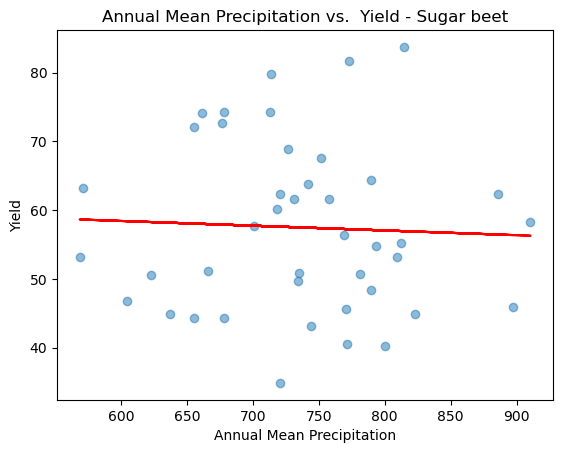

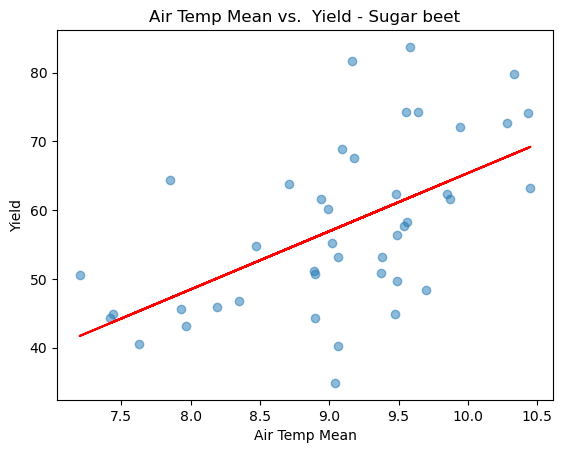

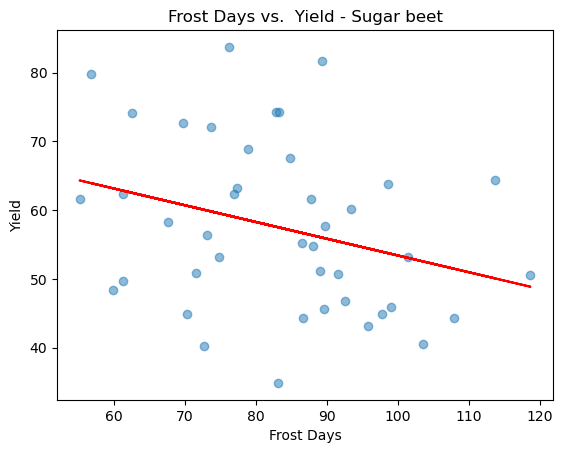

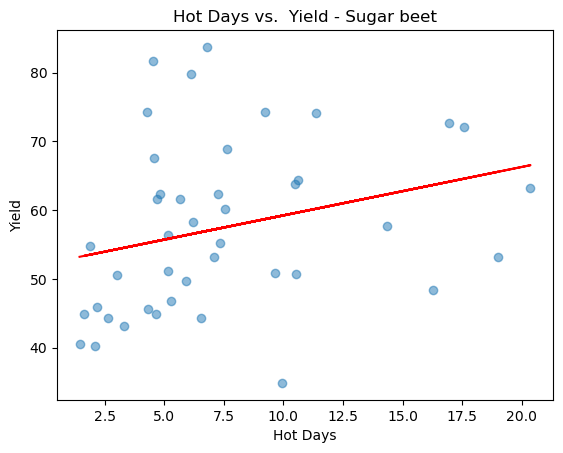

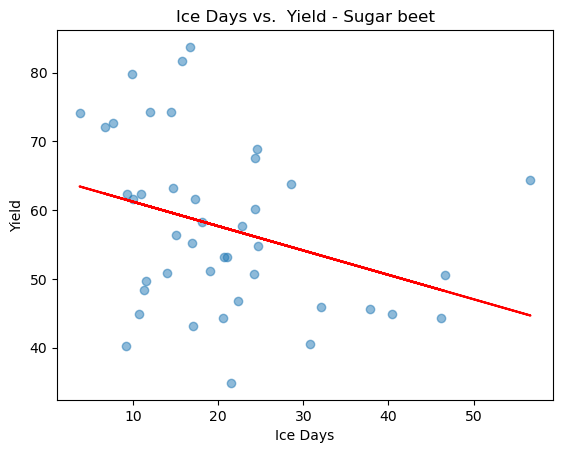

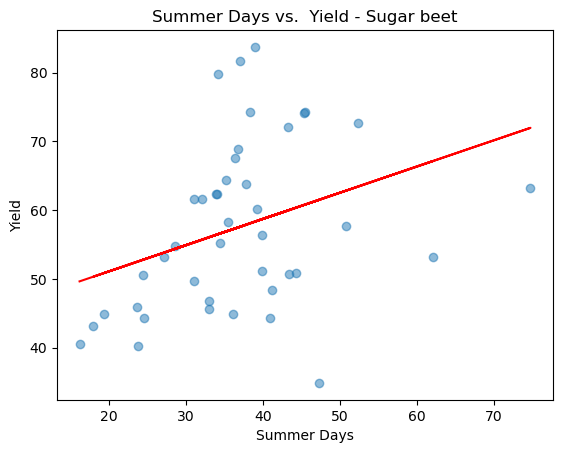

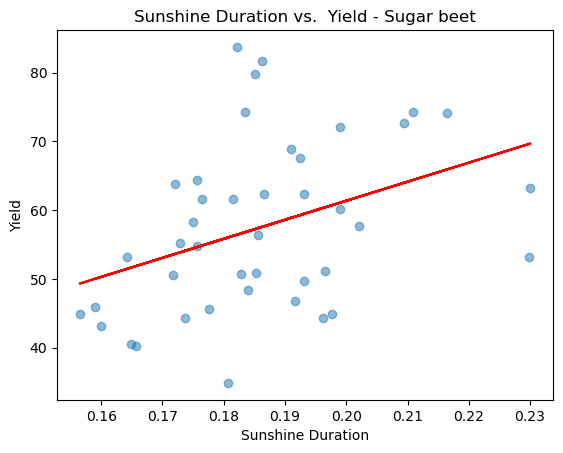

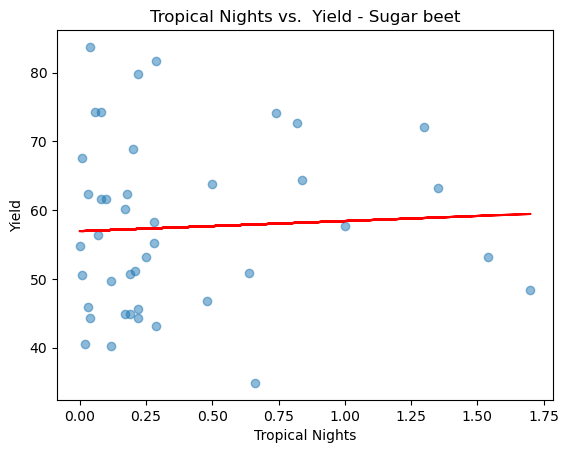

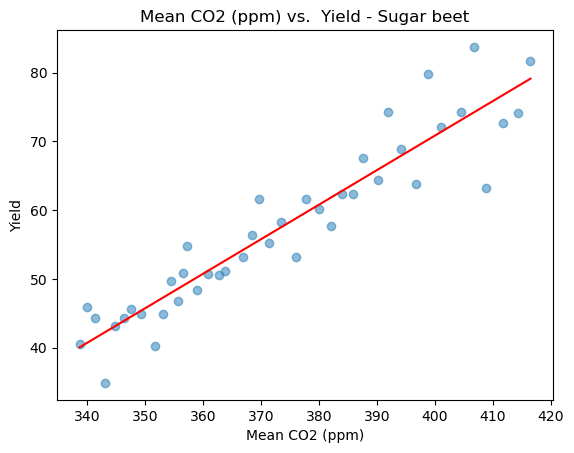

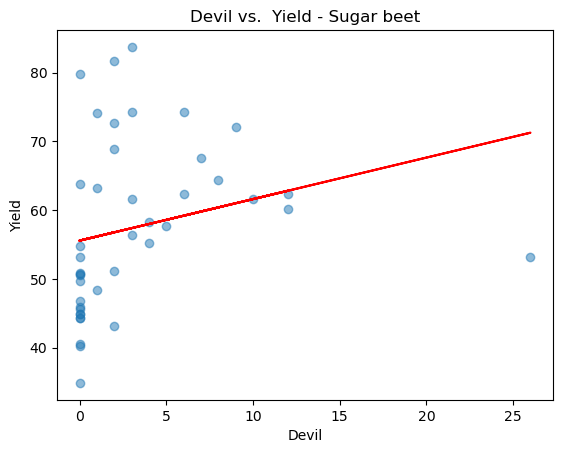

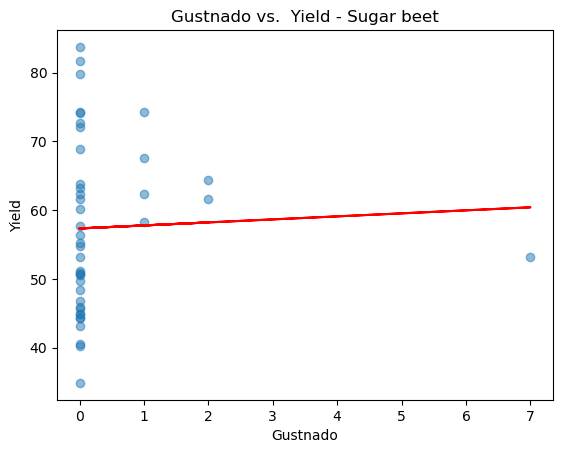

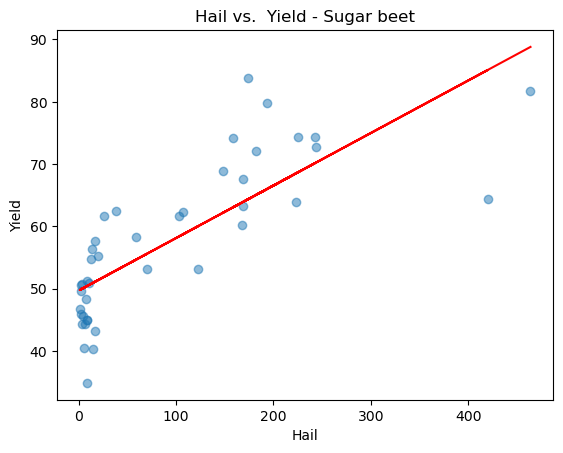

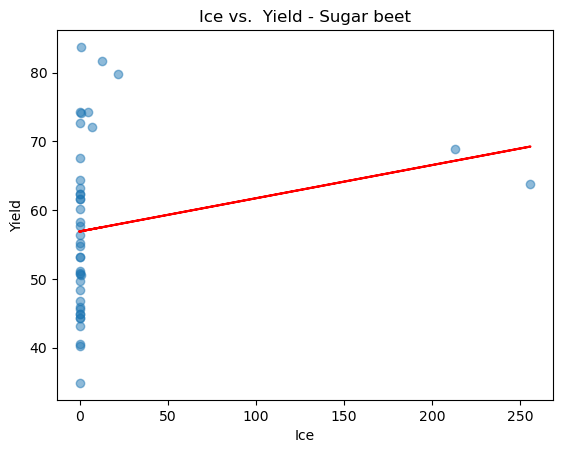

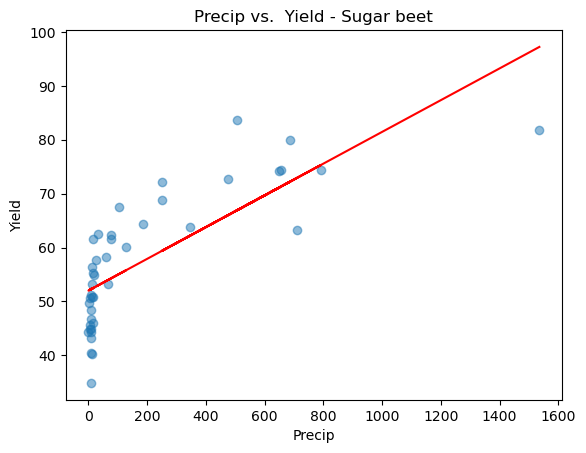

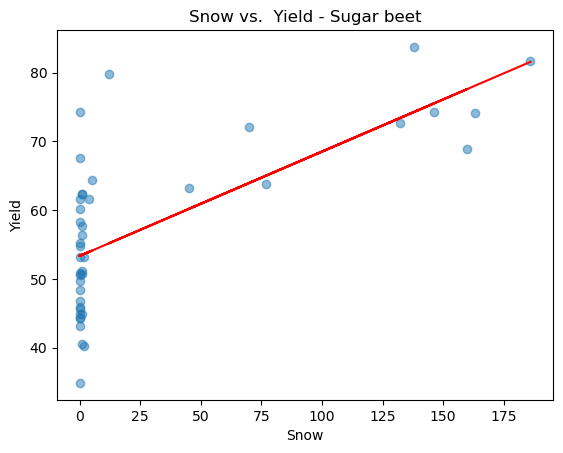

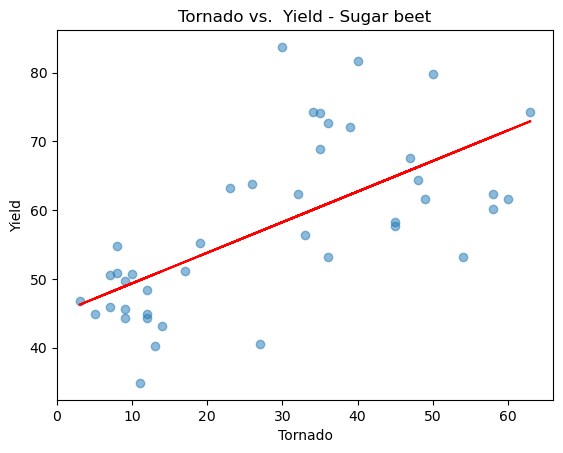

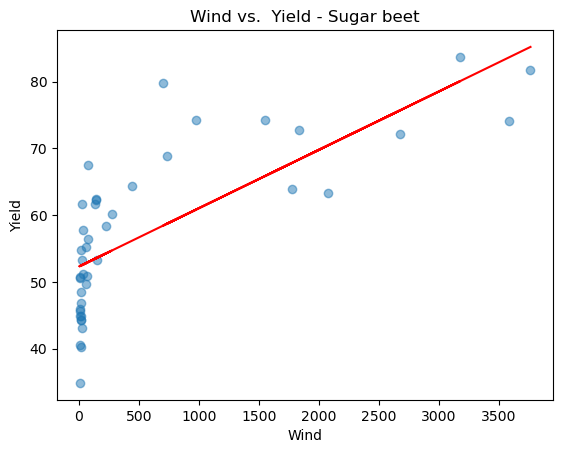

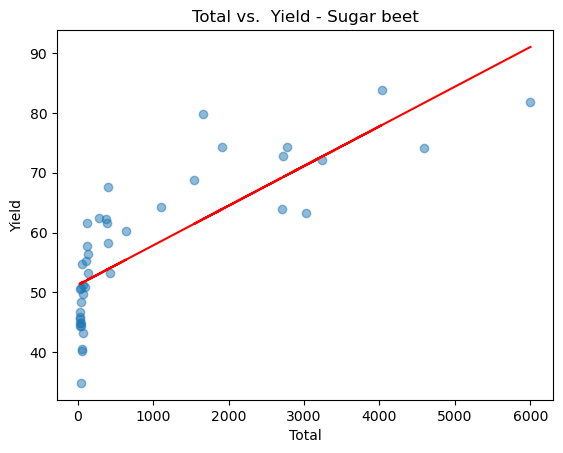

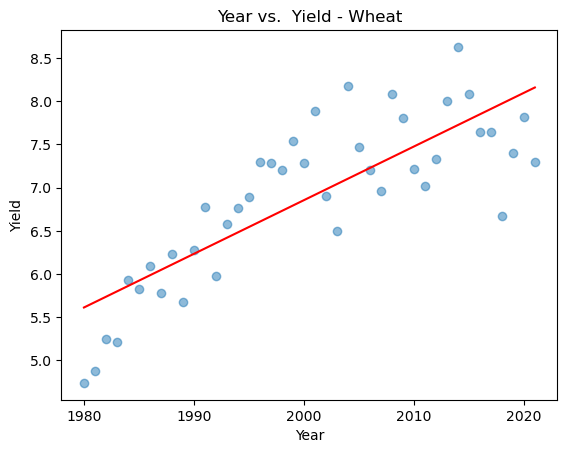

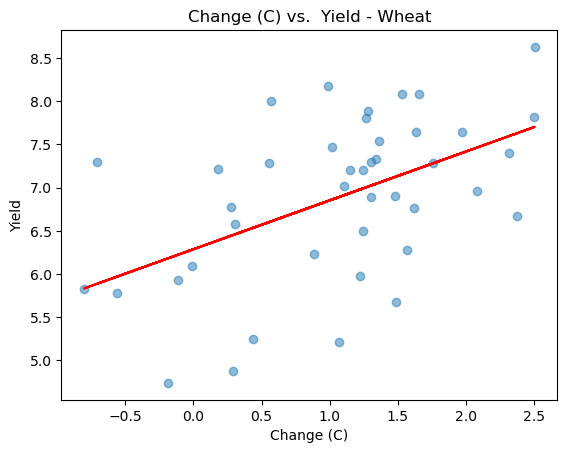

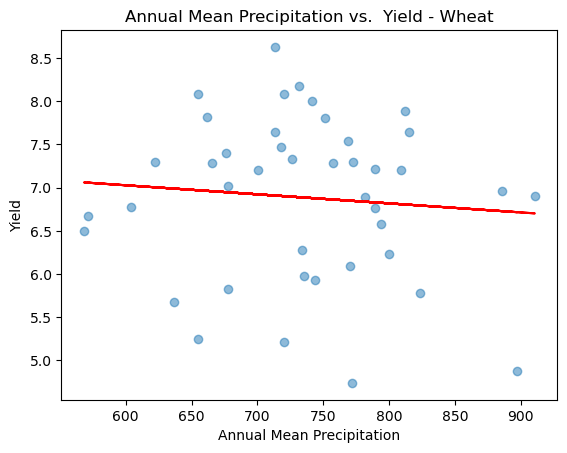

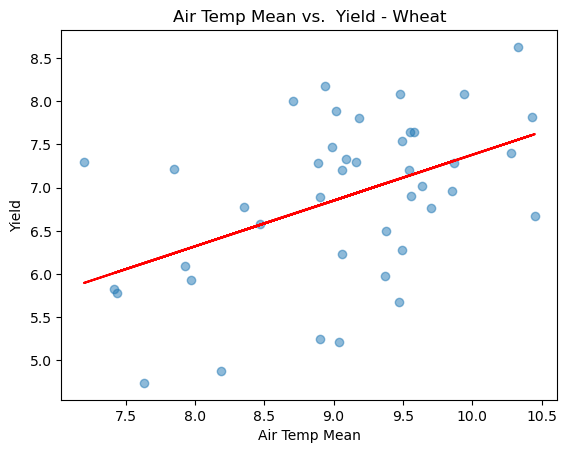

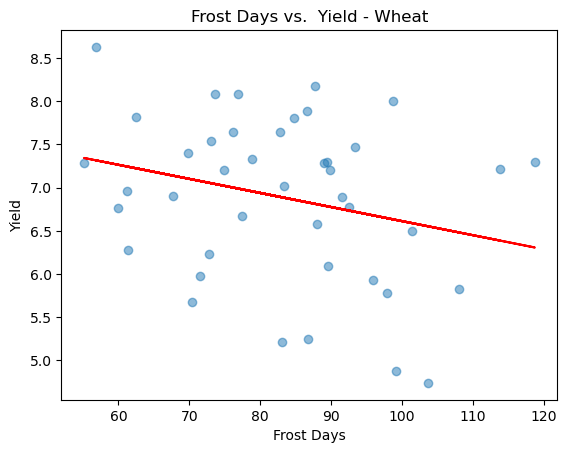

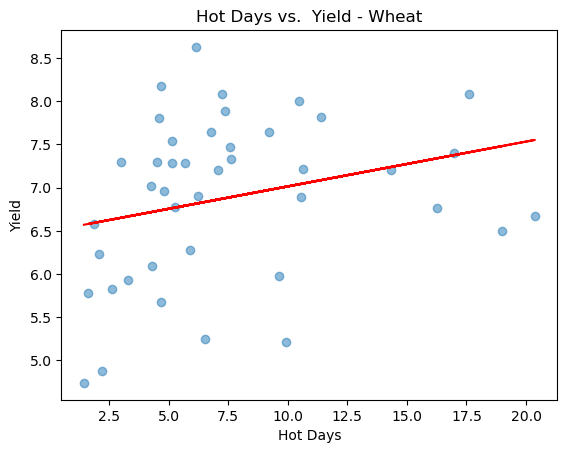

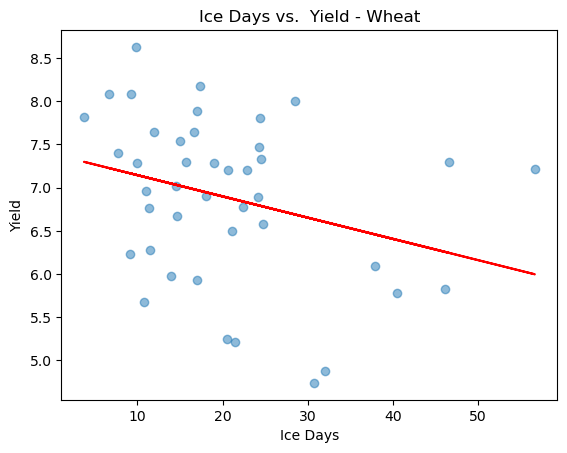

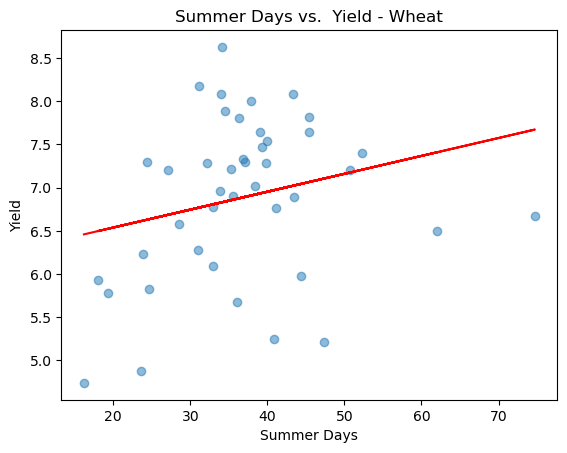

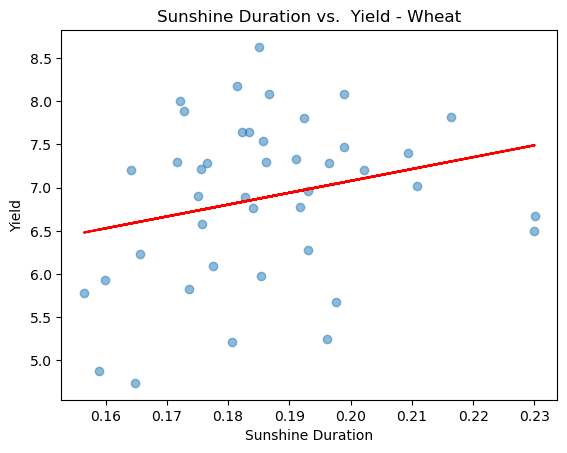

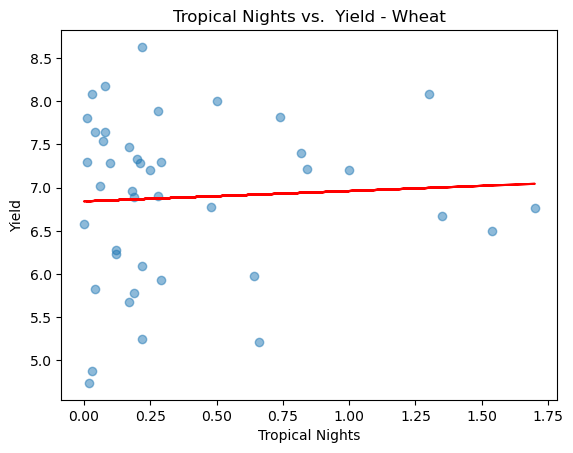

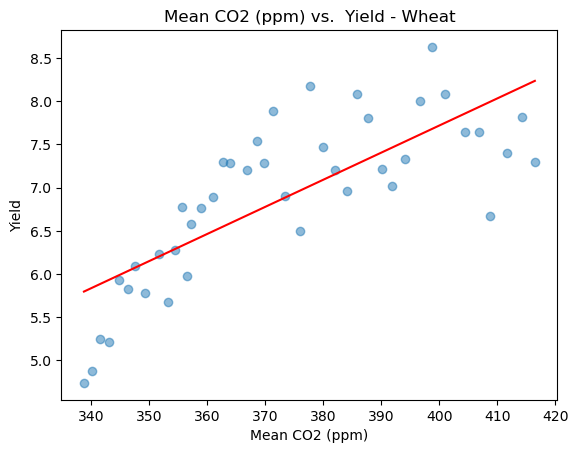

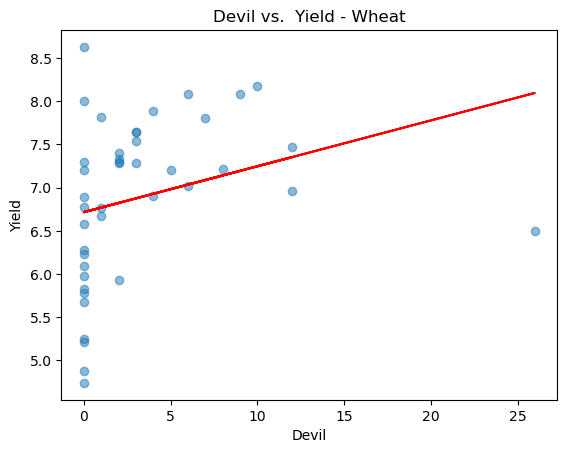

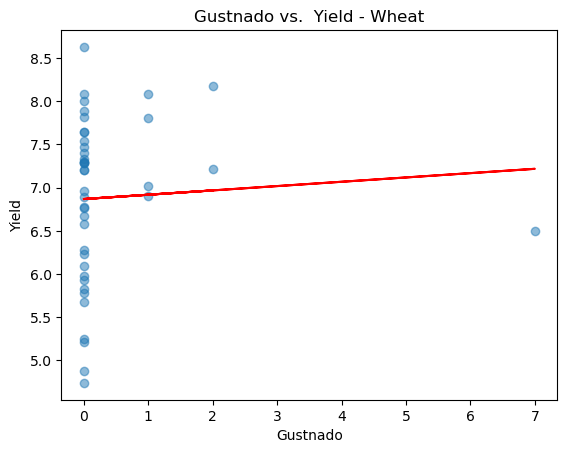

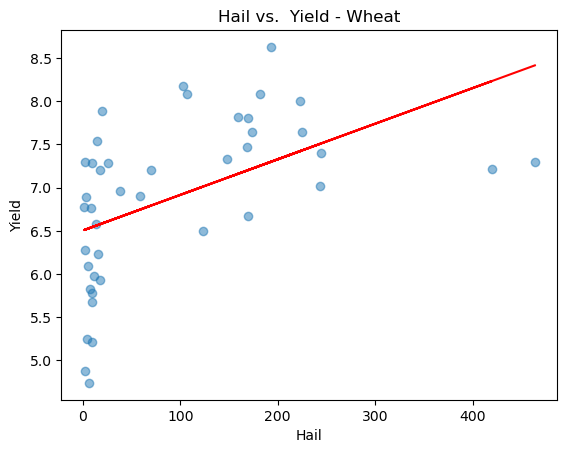

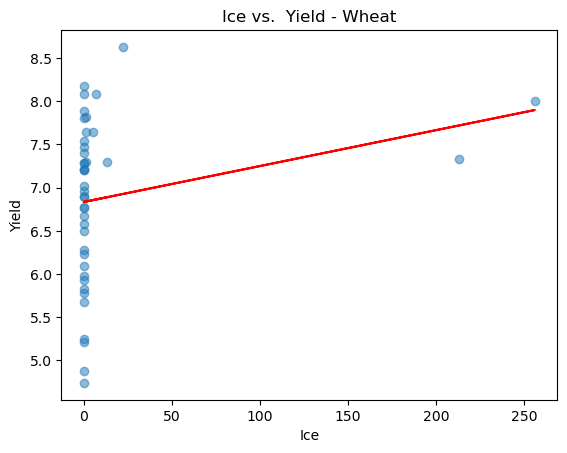

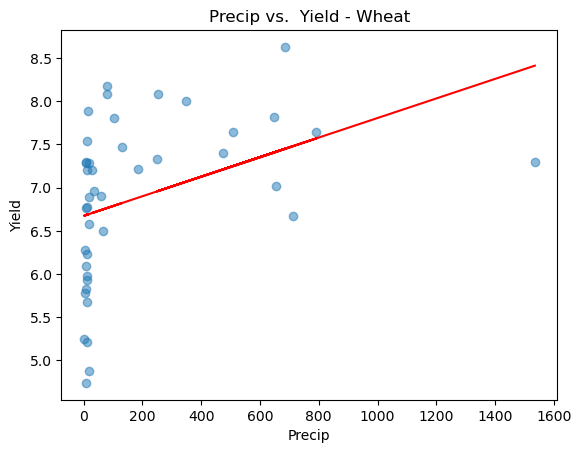

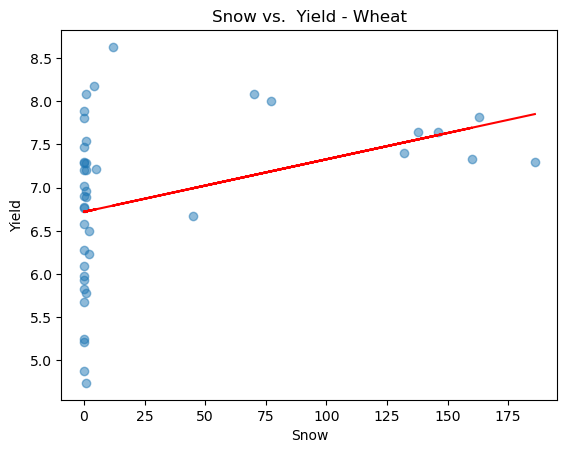

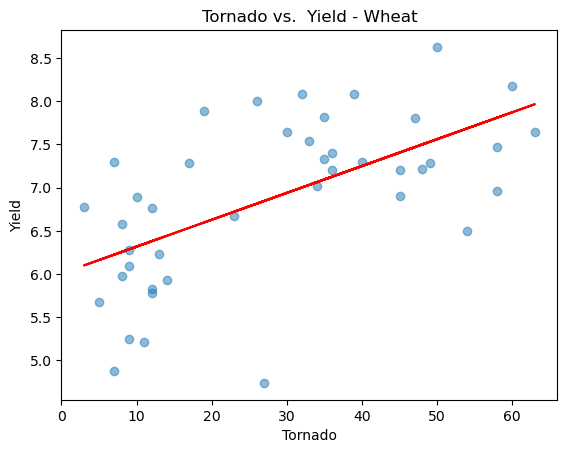

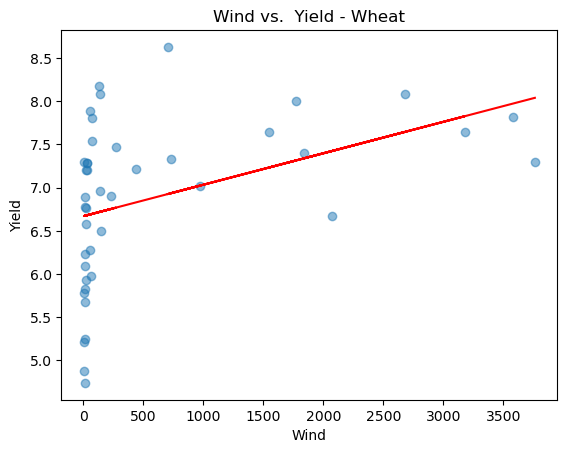

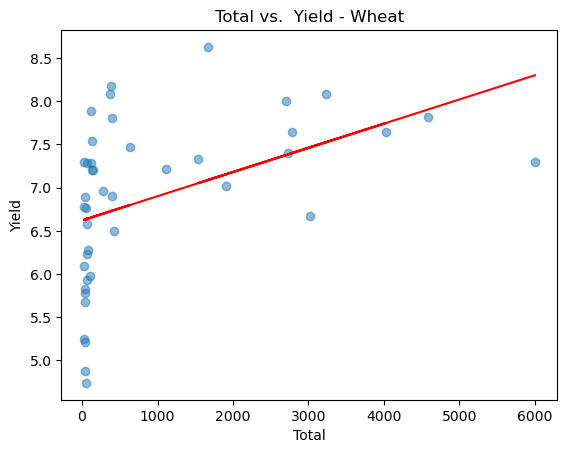

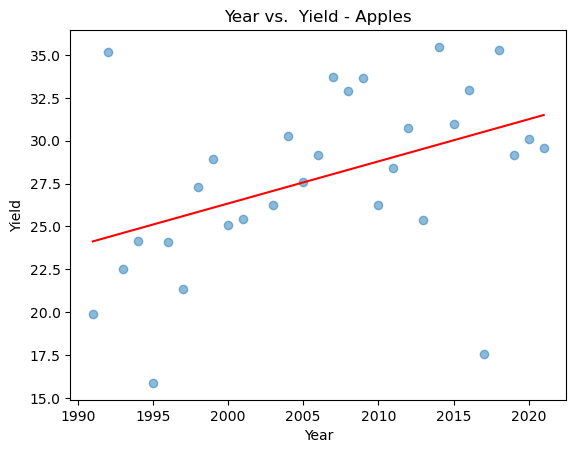

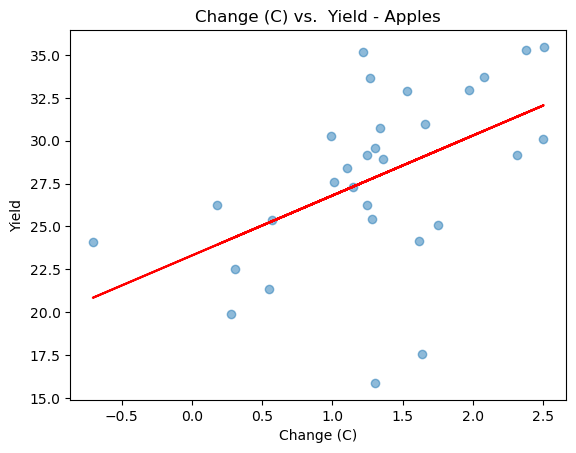

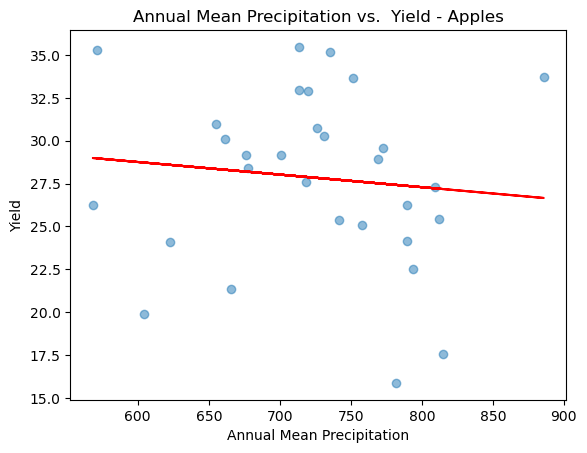

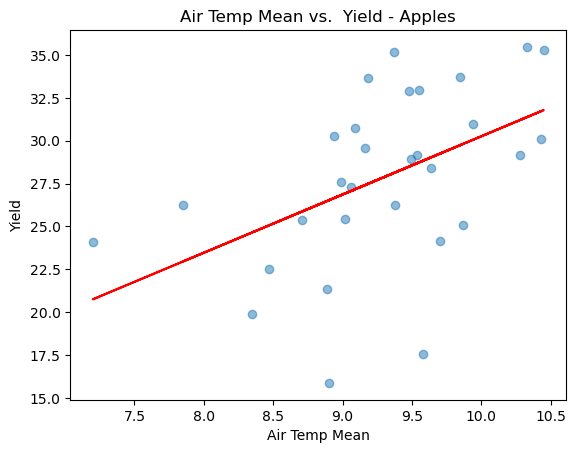

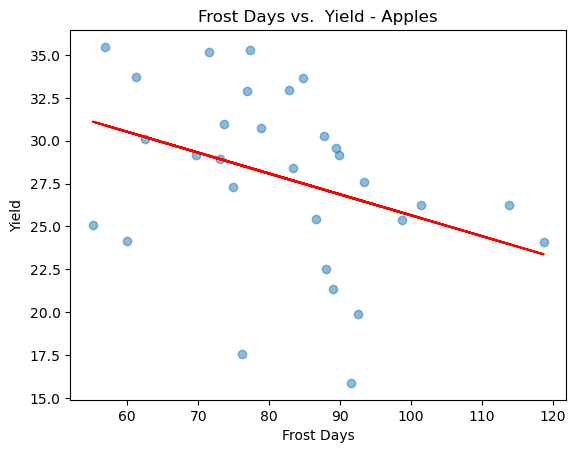

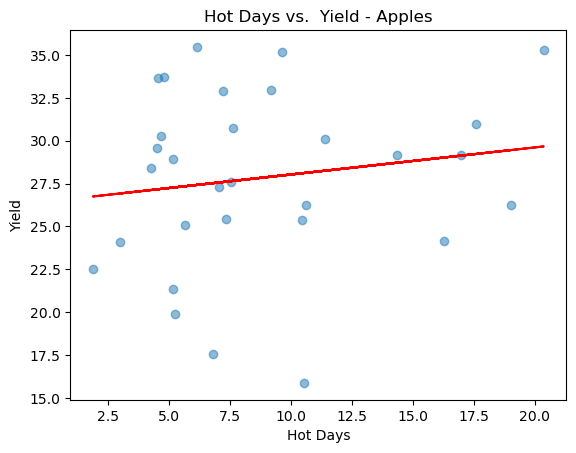

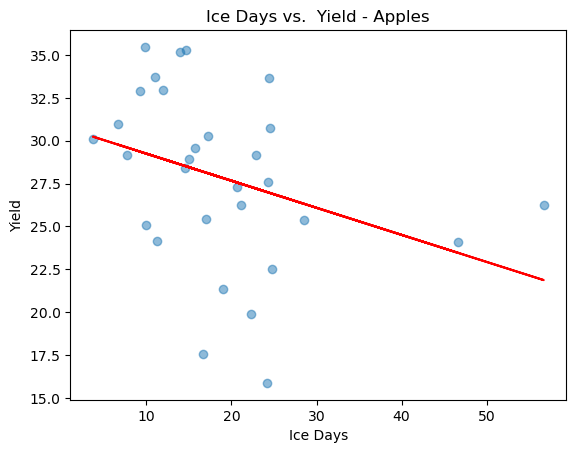

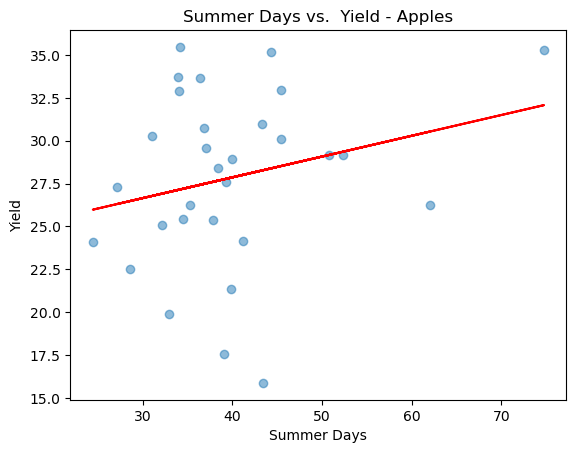

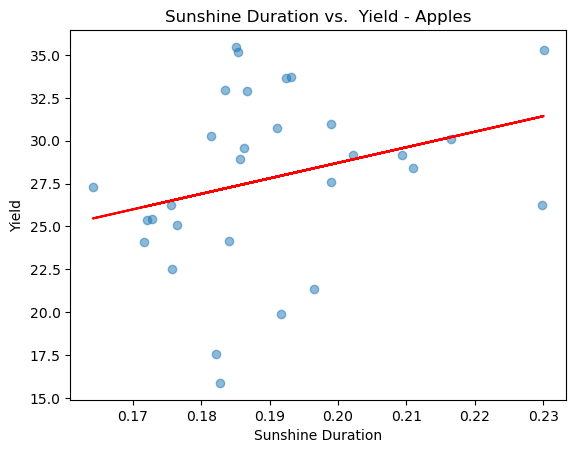

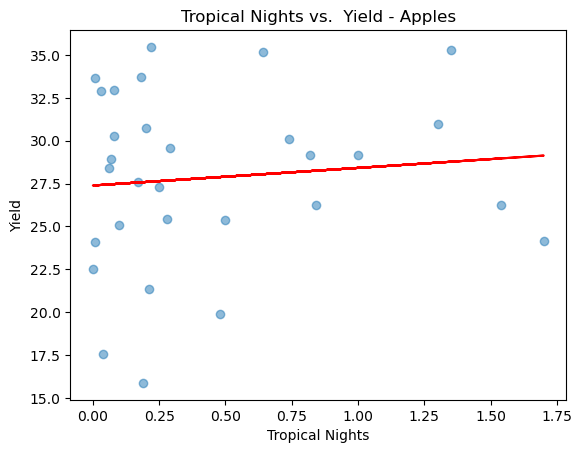

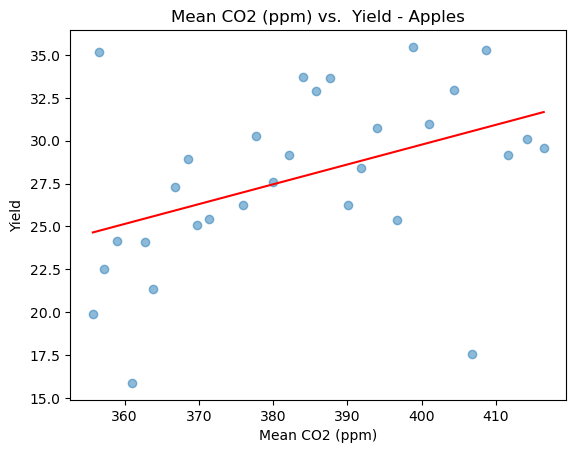

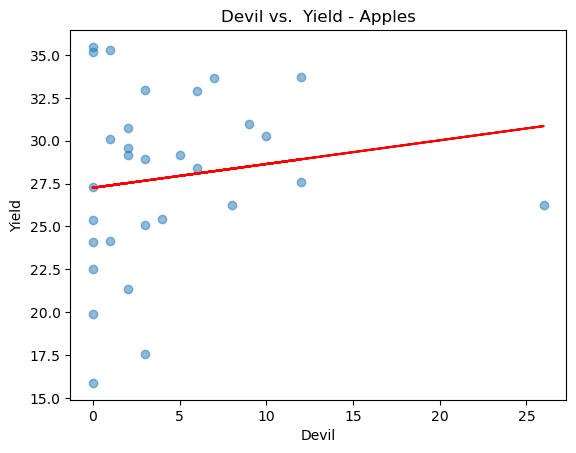

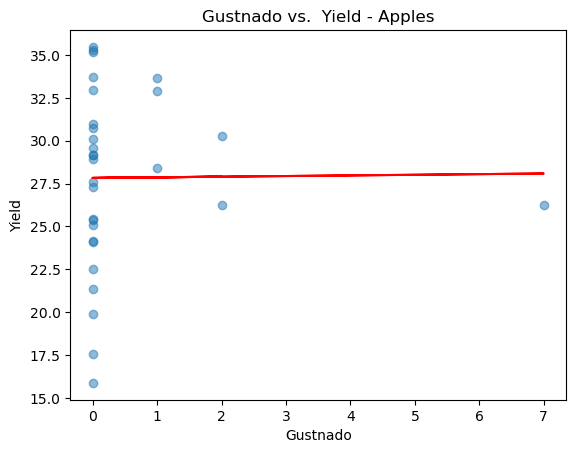

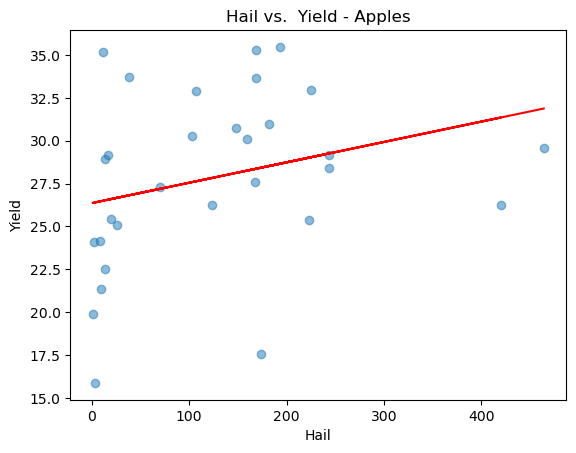

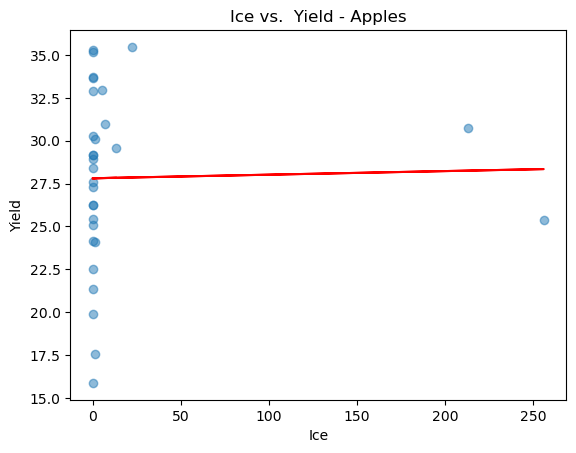

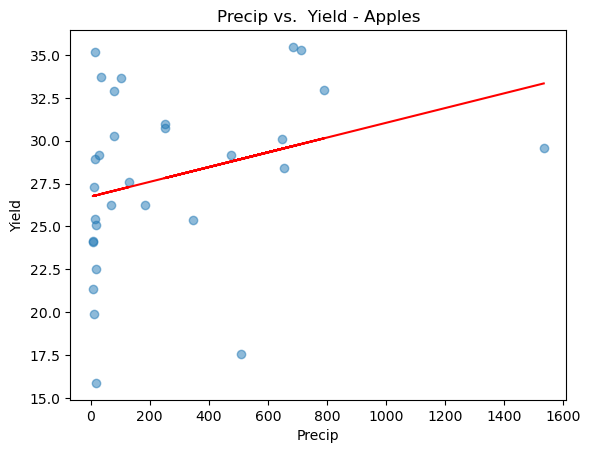

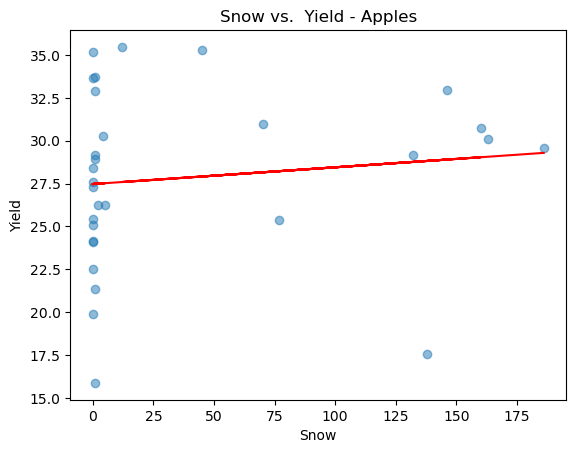

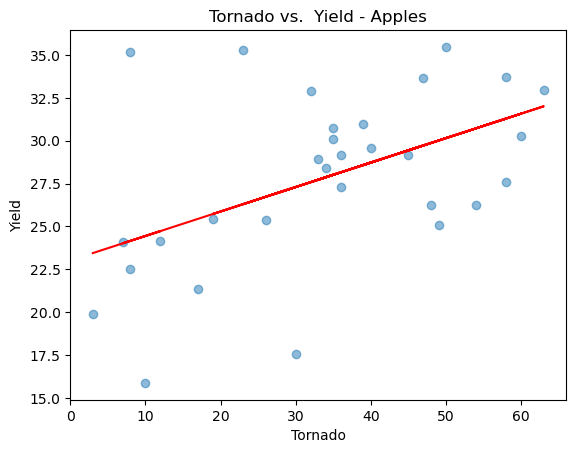

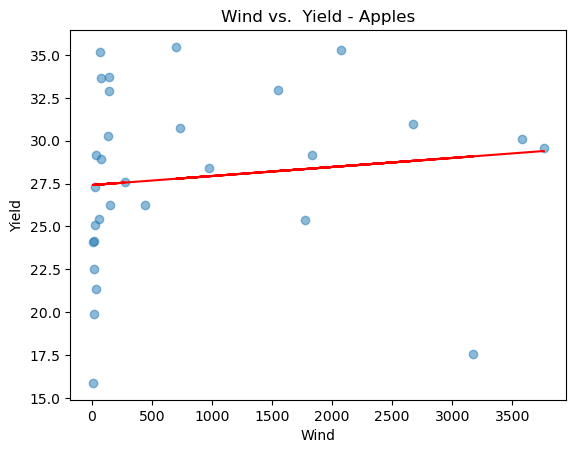

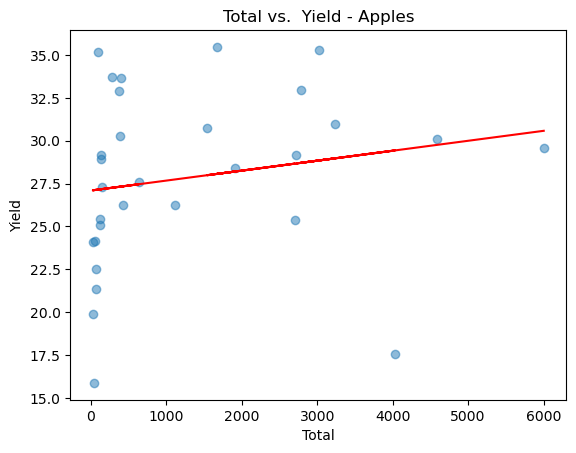

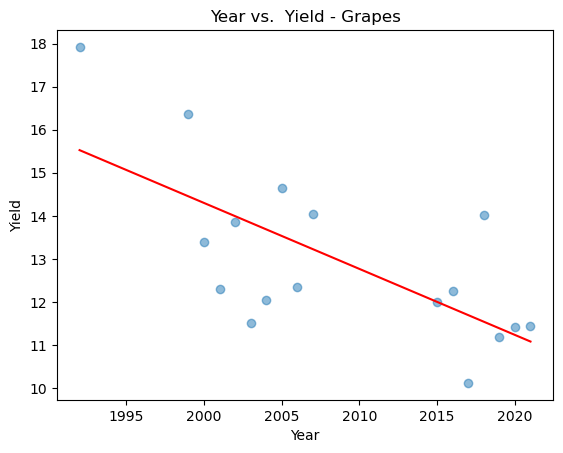

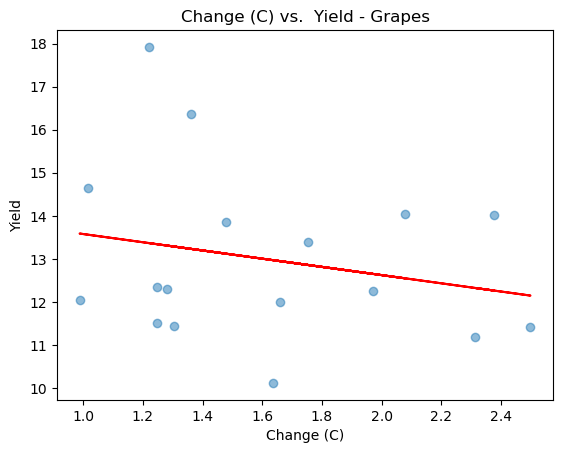

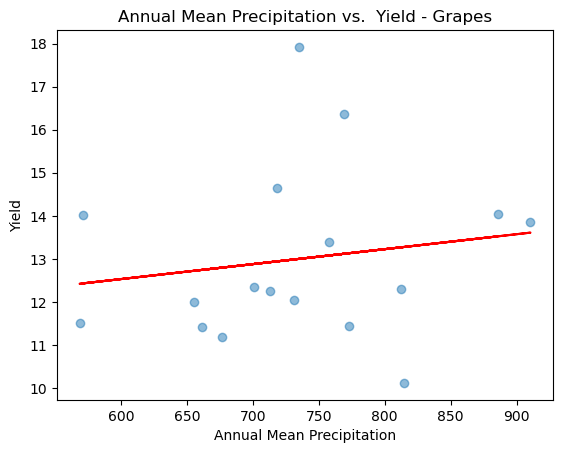

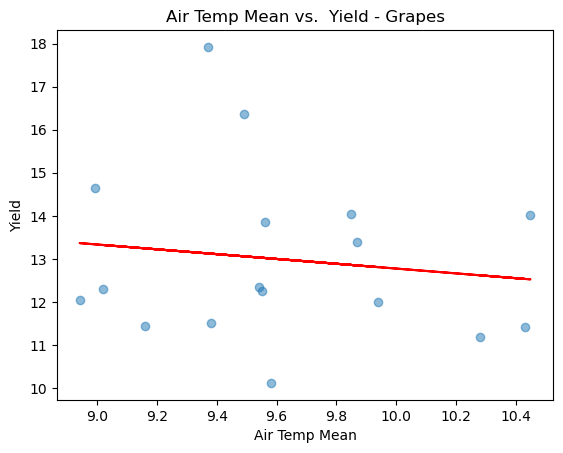

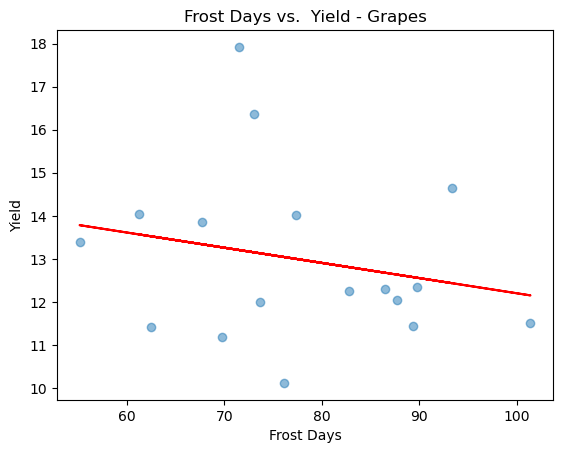

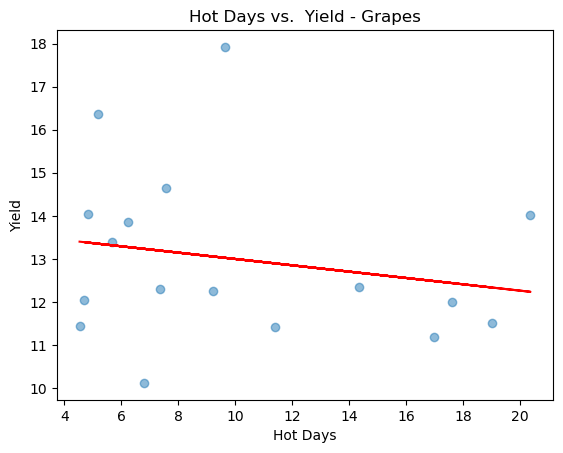

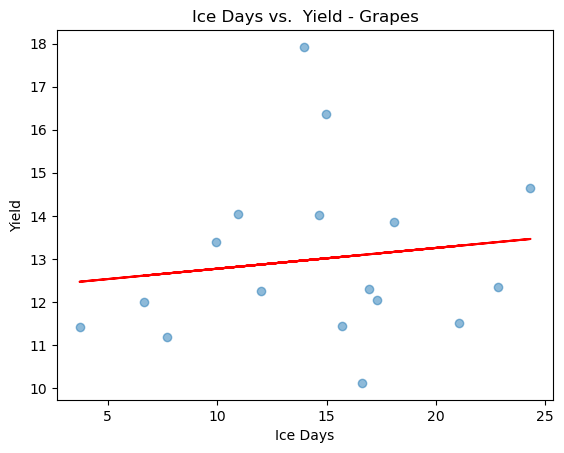

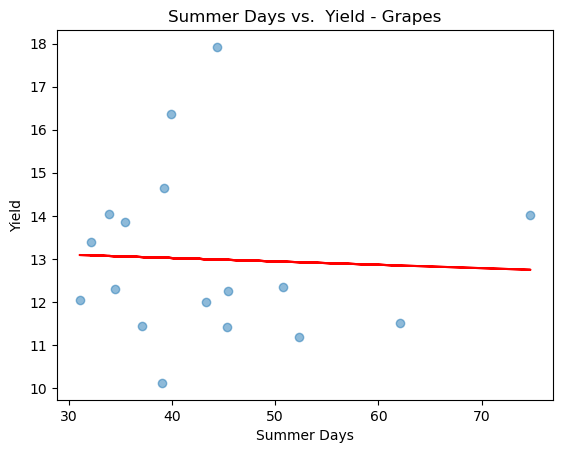

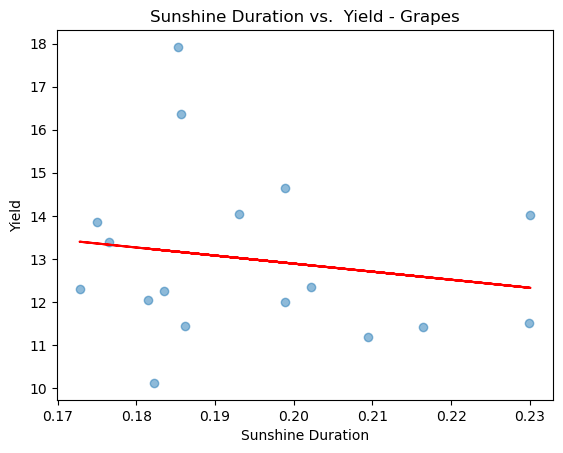

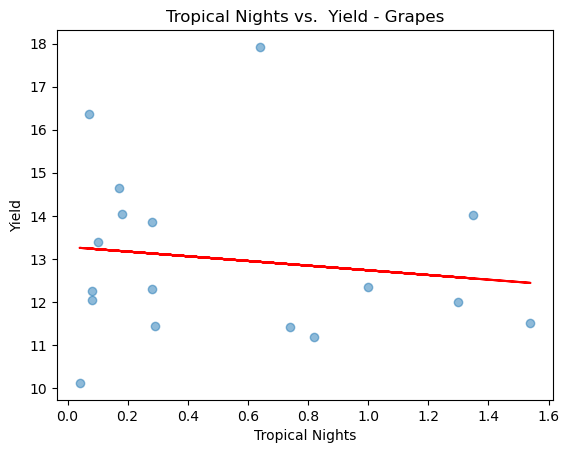

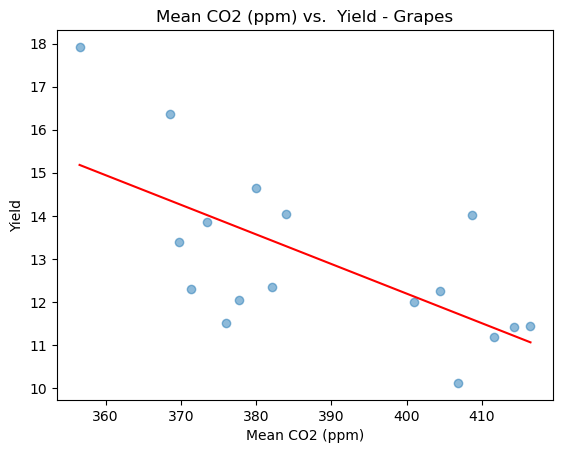

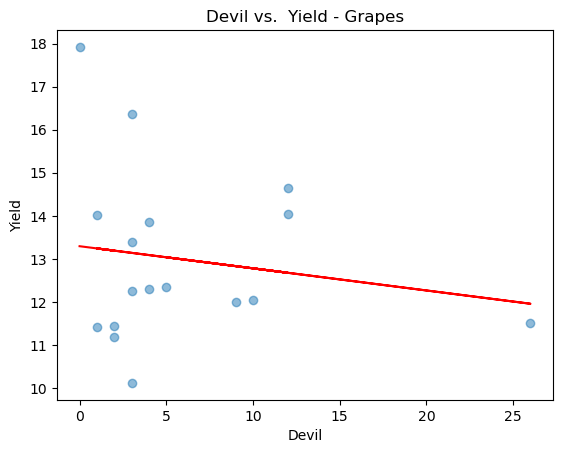

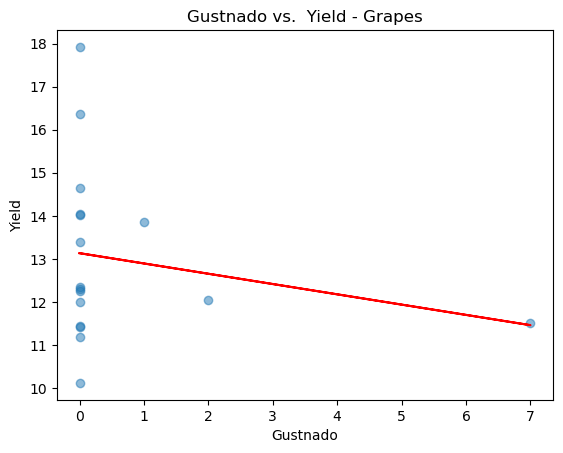

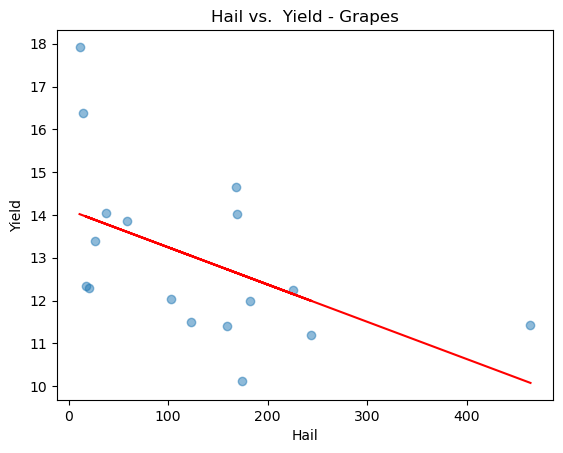

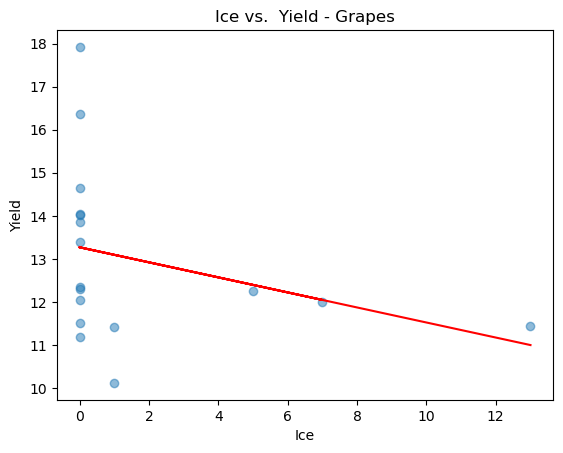

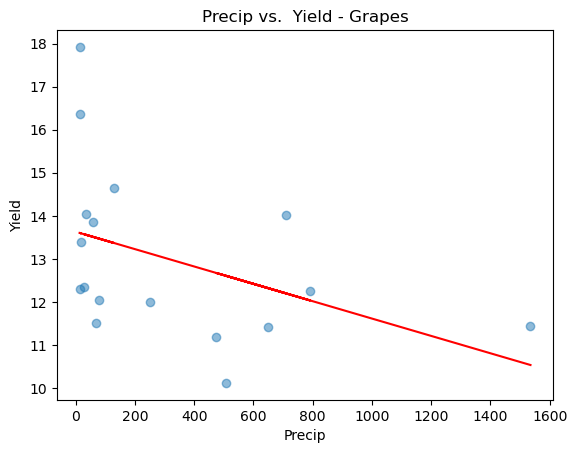

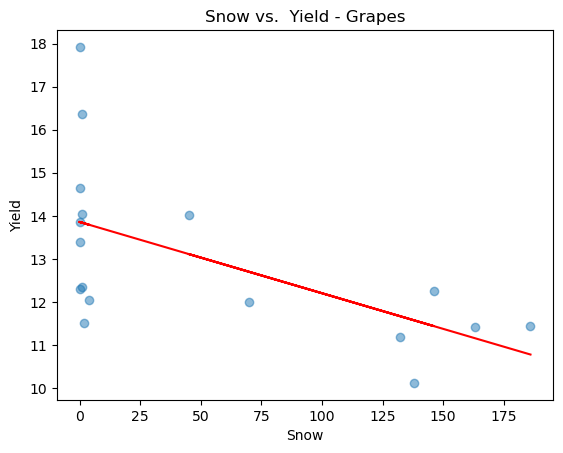

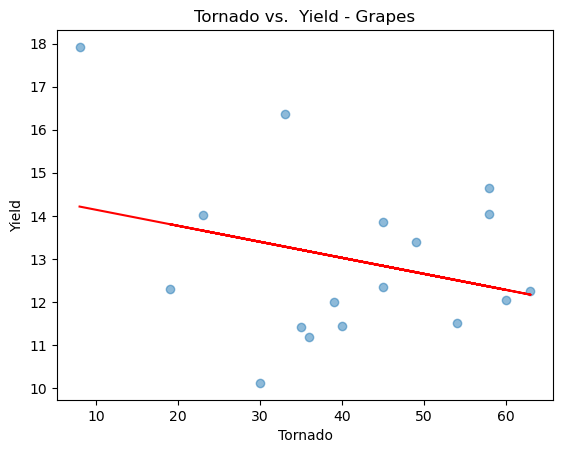

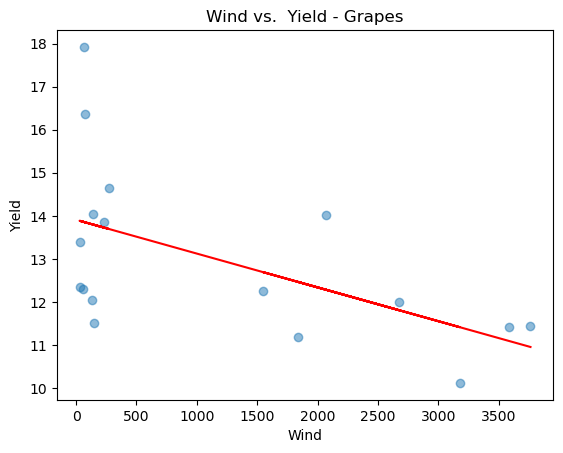

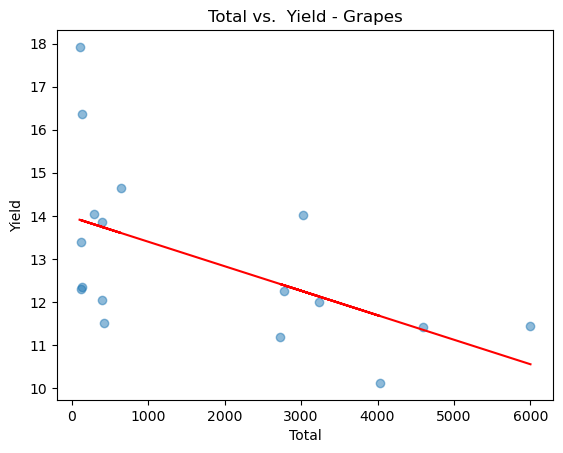

In [19]:
# Loop over each independent variable and plot against the dependent variable
for crop in crop_names:
    crop_df = df[df["Item"] == crop]
    x = crop_df[[
    'Year', 
    'Change (C)', 'Annual Mean Precipitation',
    'Air Temp Mean', 'Frost Days', 'Hot Days', 
    'Ice Days', 'Summer Days','Sunshine Duration', 
    'Tropical Nights', 'Mean CO2 (ppm)', "Devil",	
    'Gustnado',	'Hail',	'Ice',	'Precip',	'Snow',	
    'Tornado',	'Wind',	'Total']]
    y = crop_df['Yield (tonnes/ha)']

    for col in x.columns:
        X = x[col]
        slope, intercept, rvalue, pvalue, stderr = linregress(X, y)
        plt.scatter(X, y, alpha=0.5)
        plt.plot(X, slope * X + intercept, color='red')
        plt.title(f'{col} vs.  Yield - {crop}')
        plt.xlabel(col)
        plt.ylabel('Yield')
        plt.show()

## Correlation Matrix for each Crop

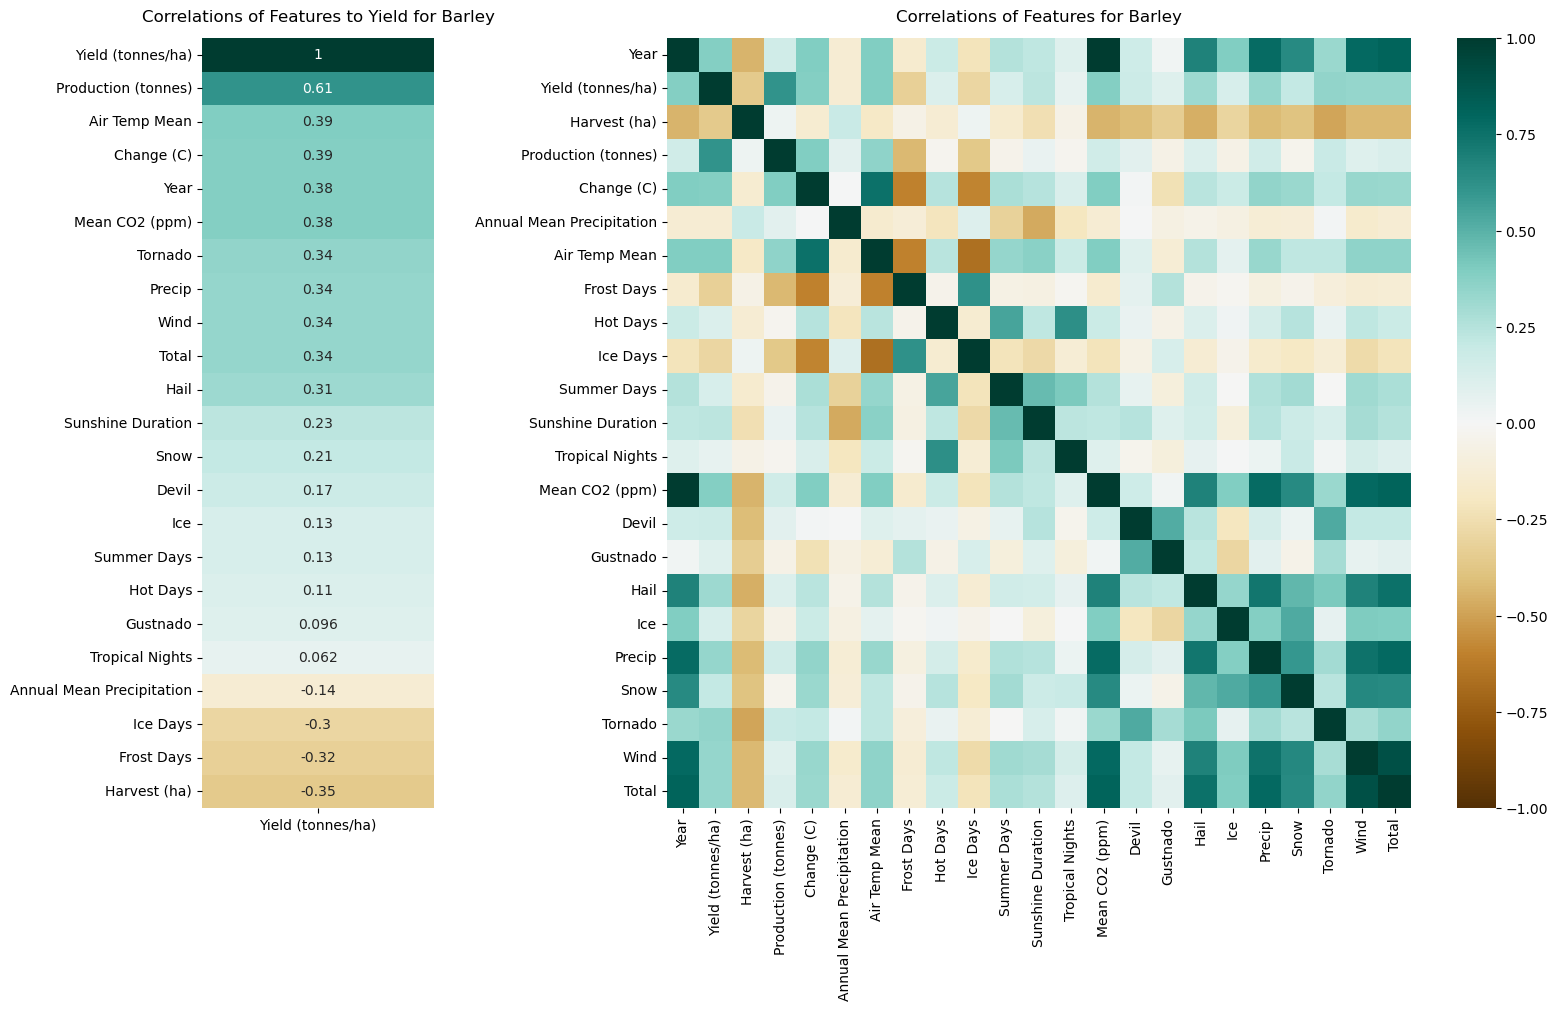

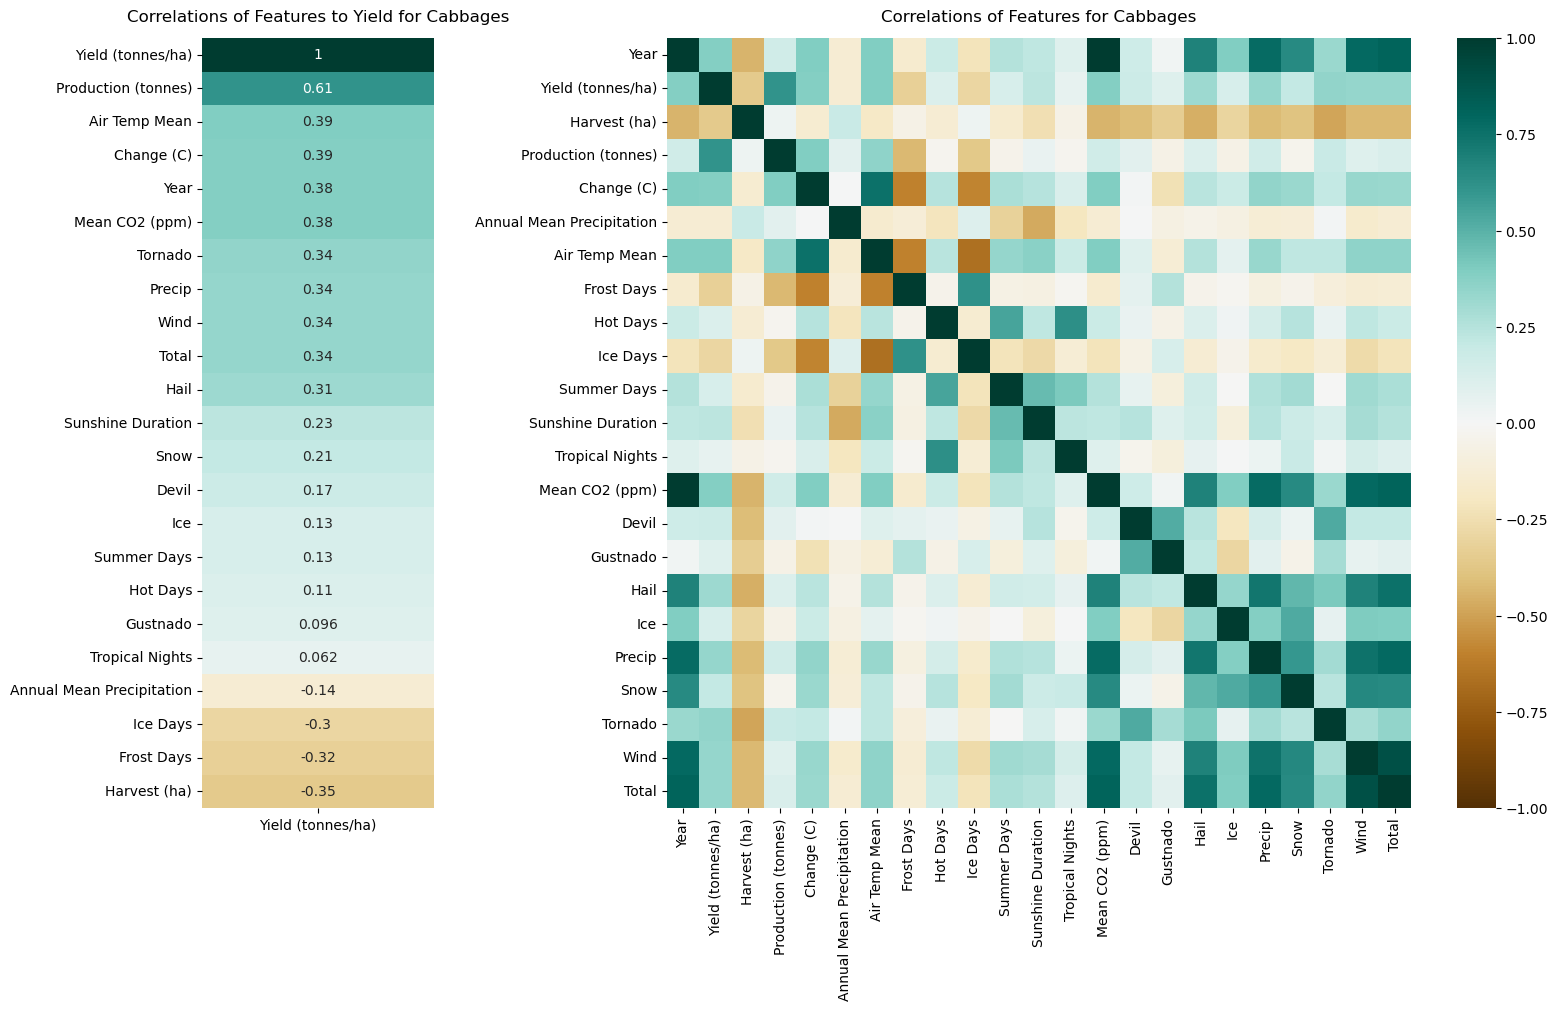

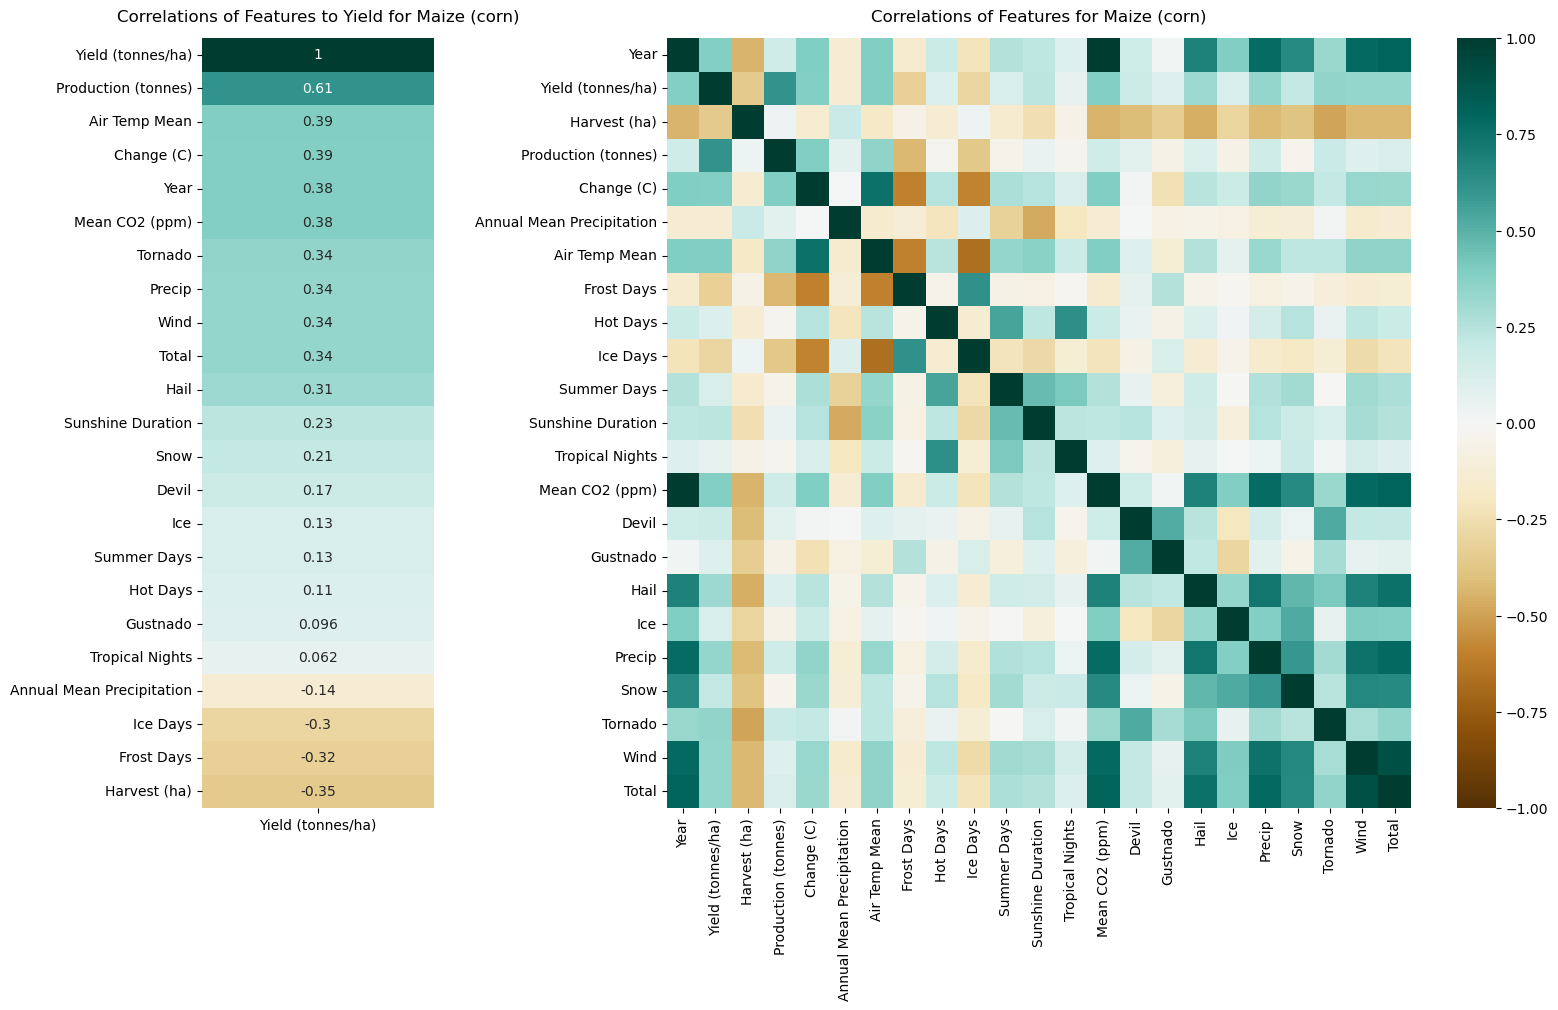

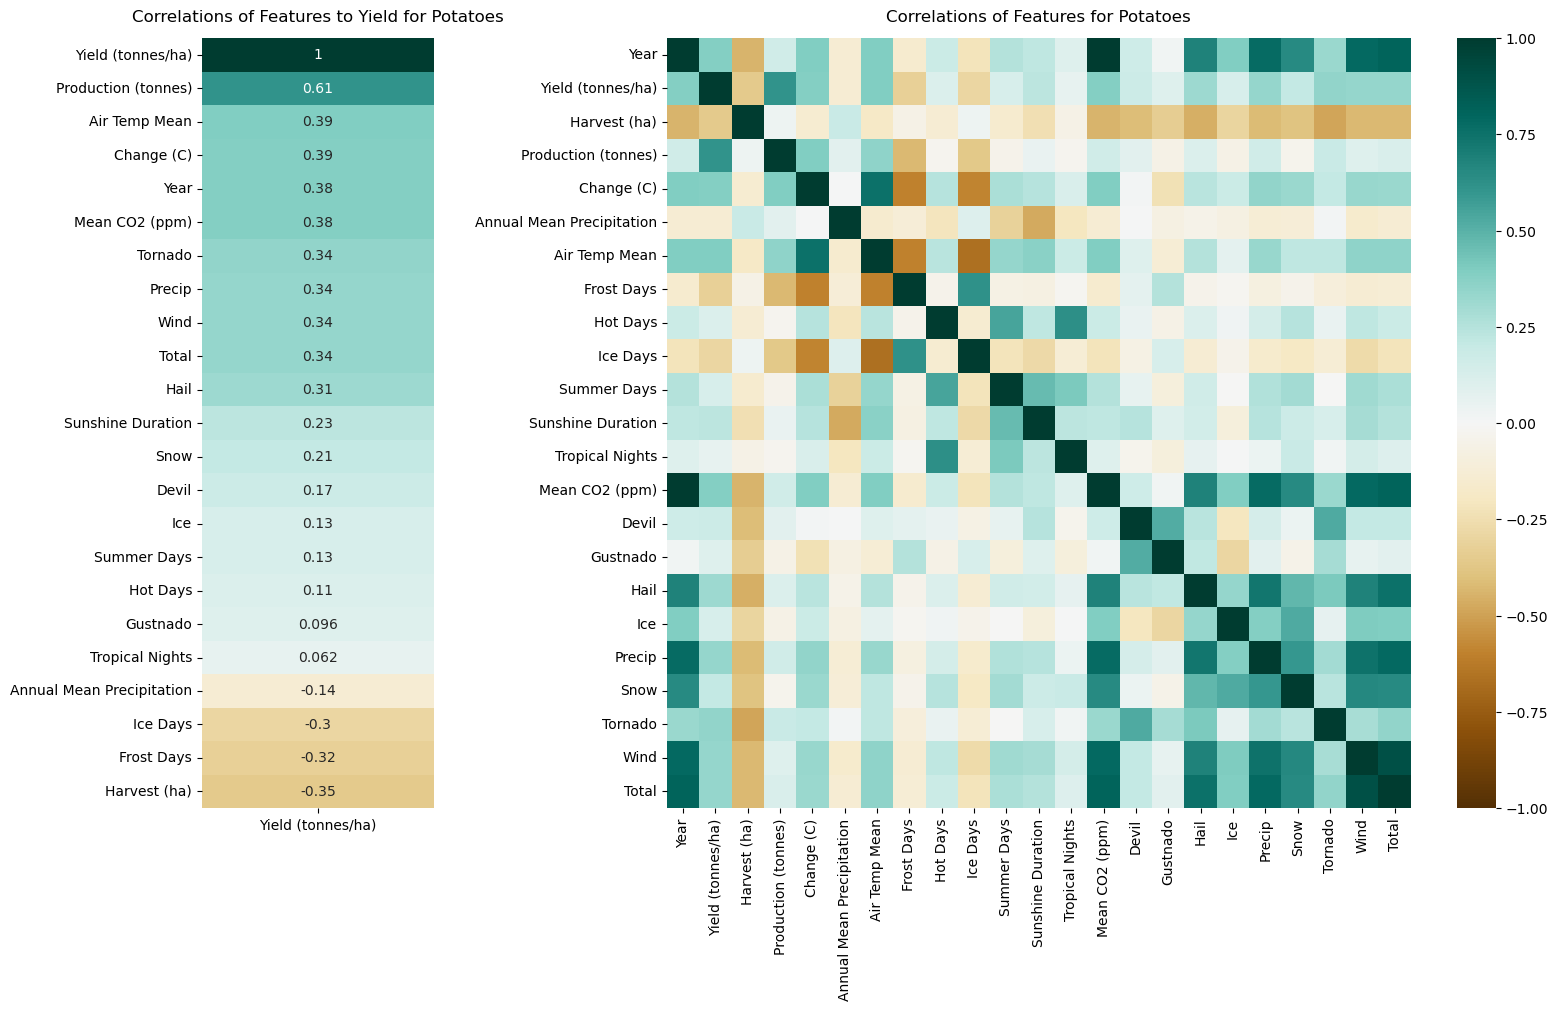

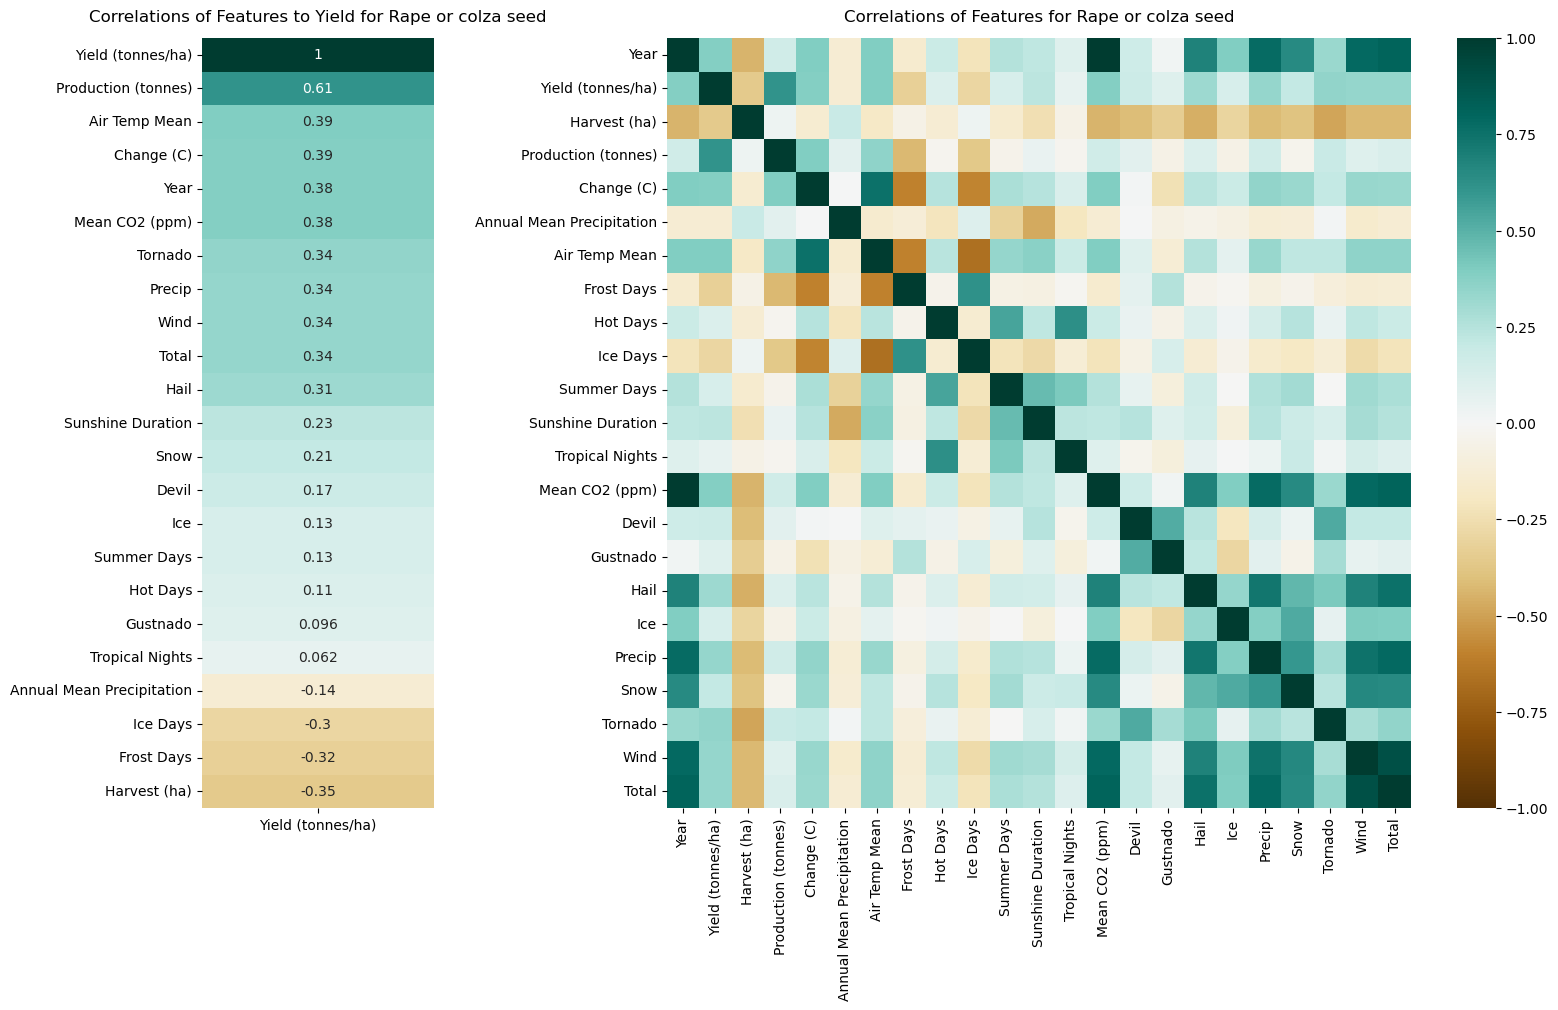

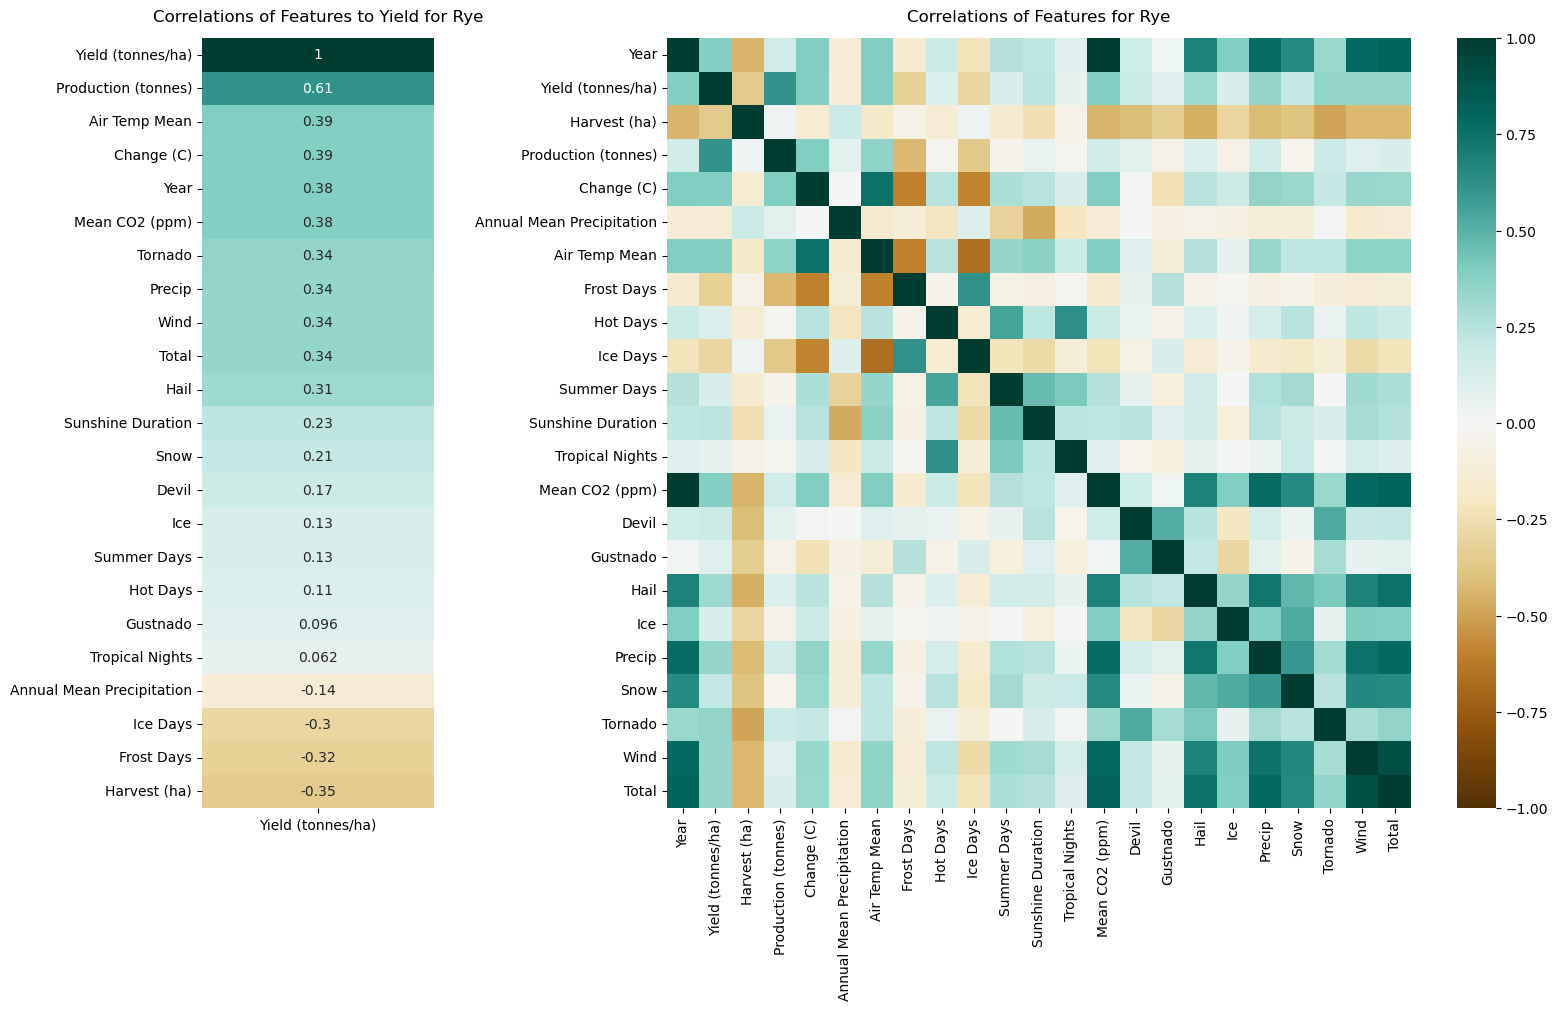

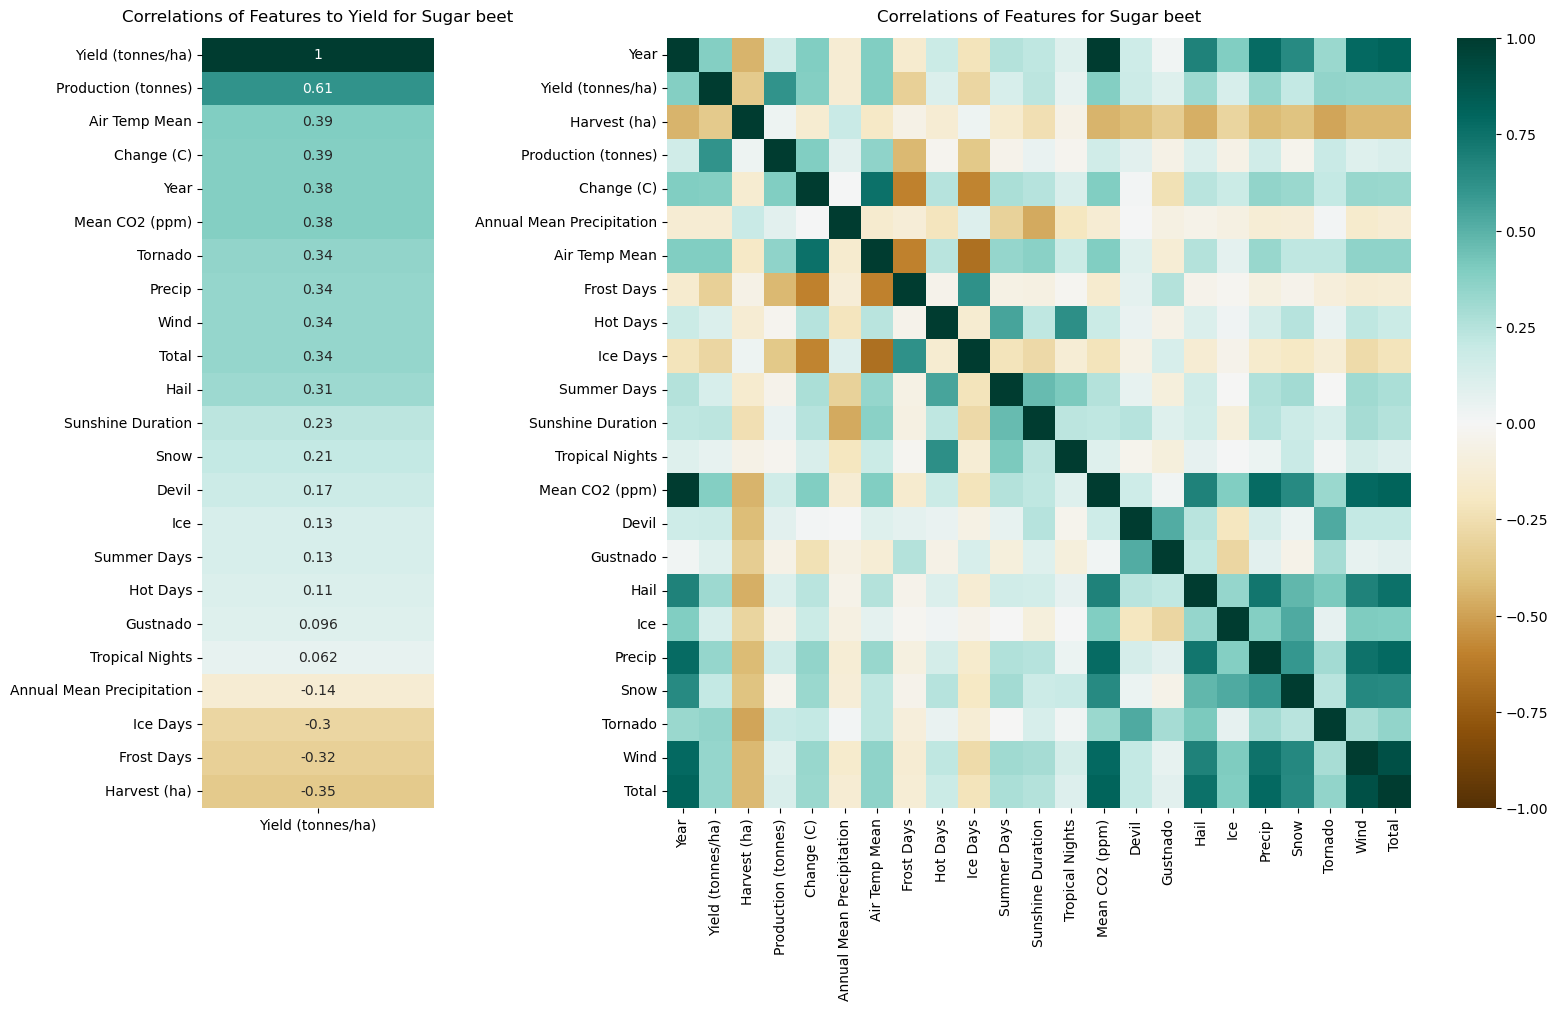

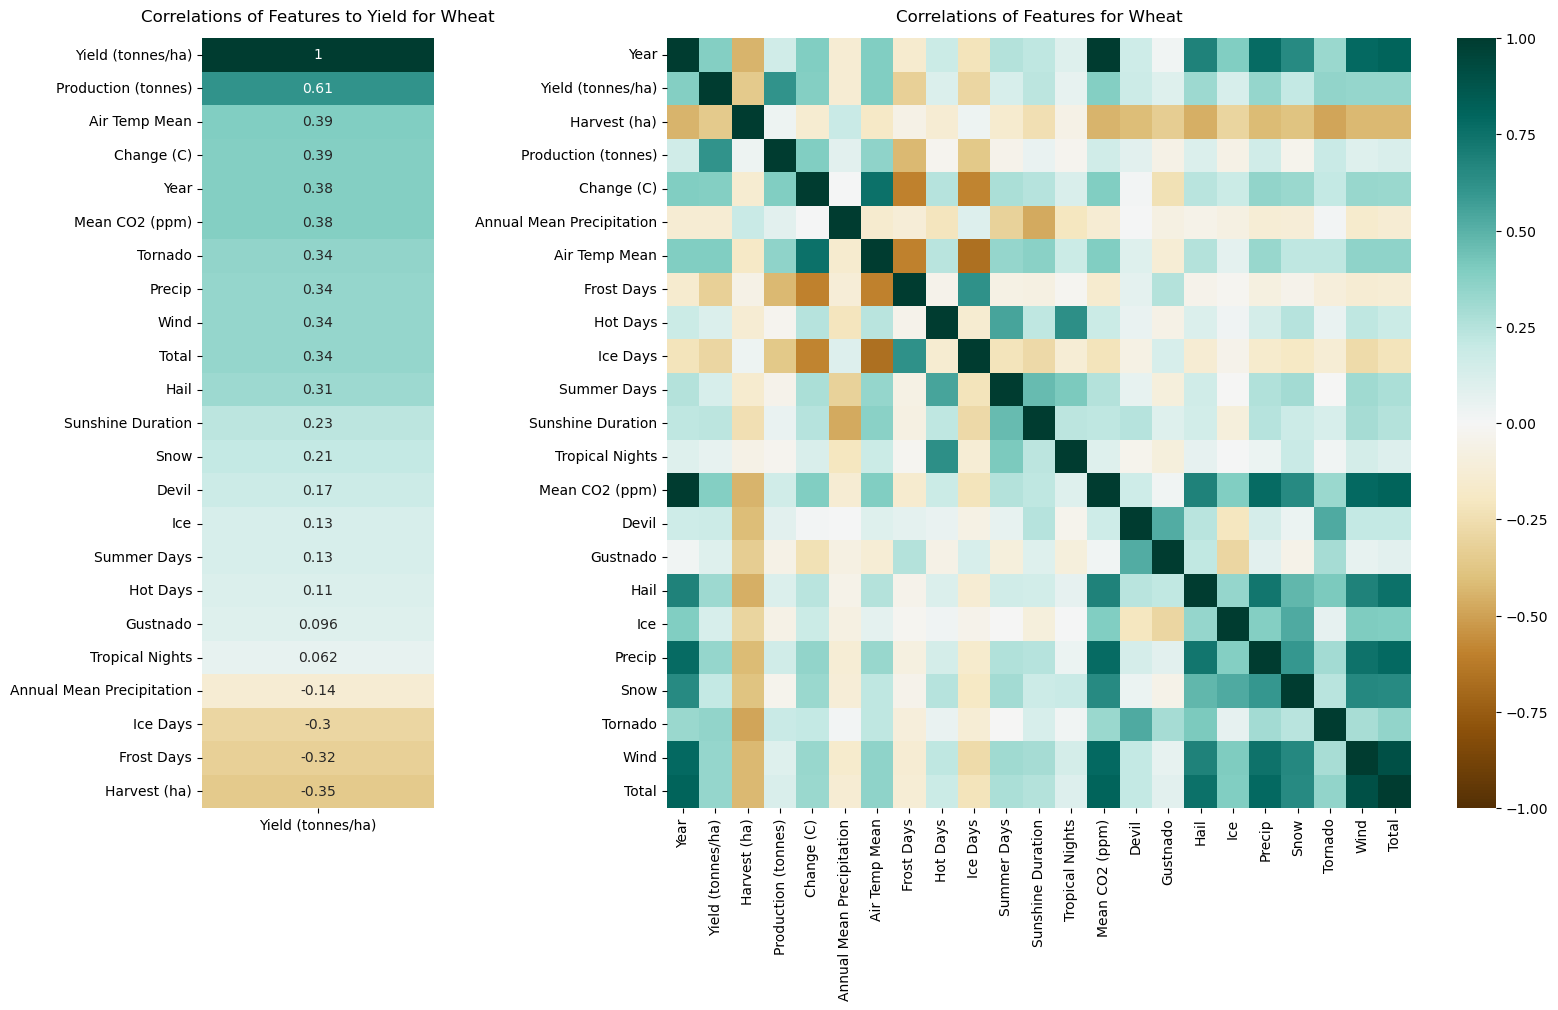

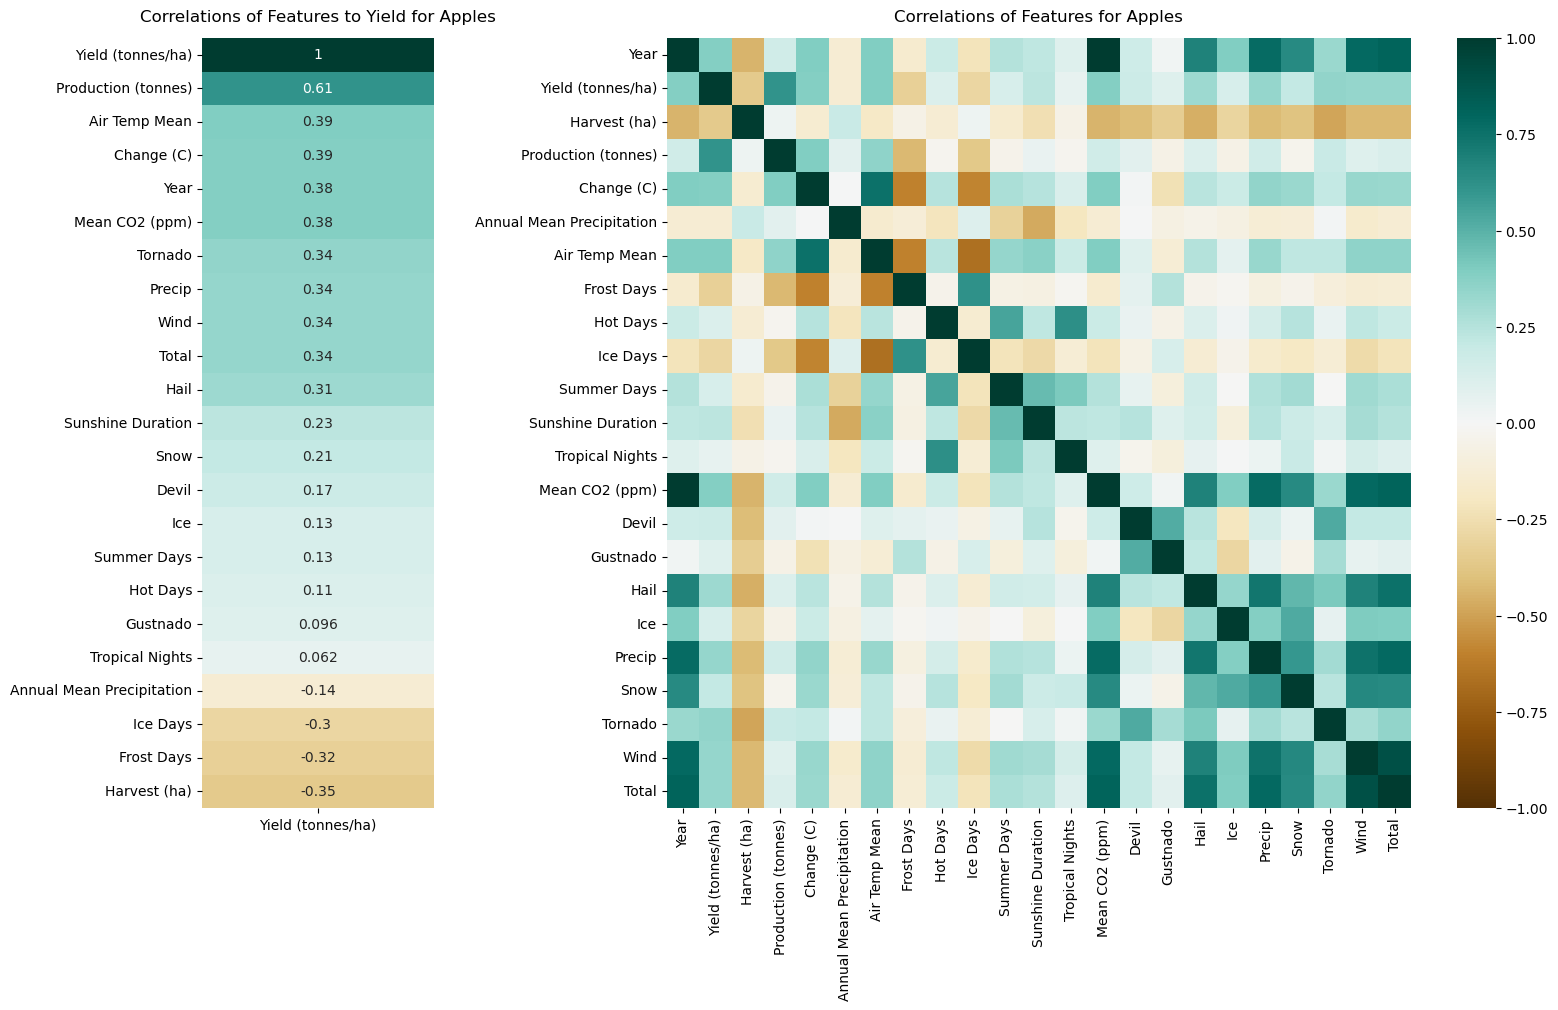

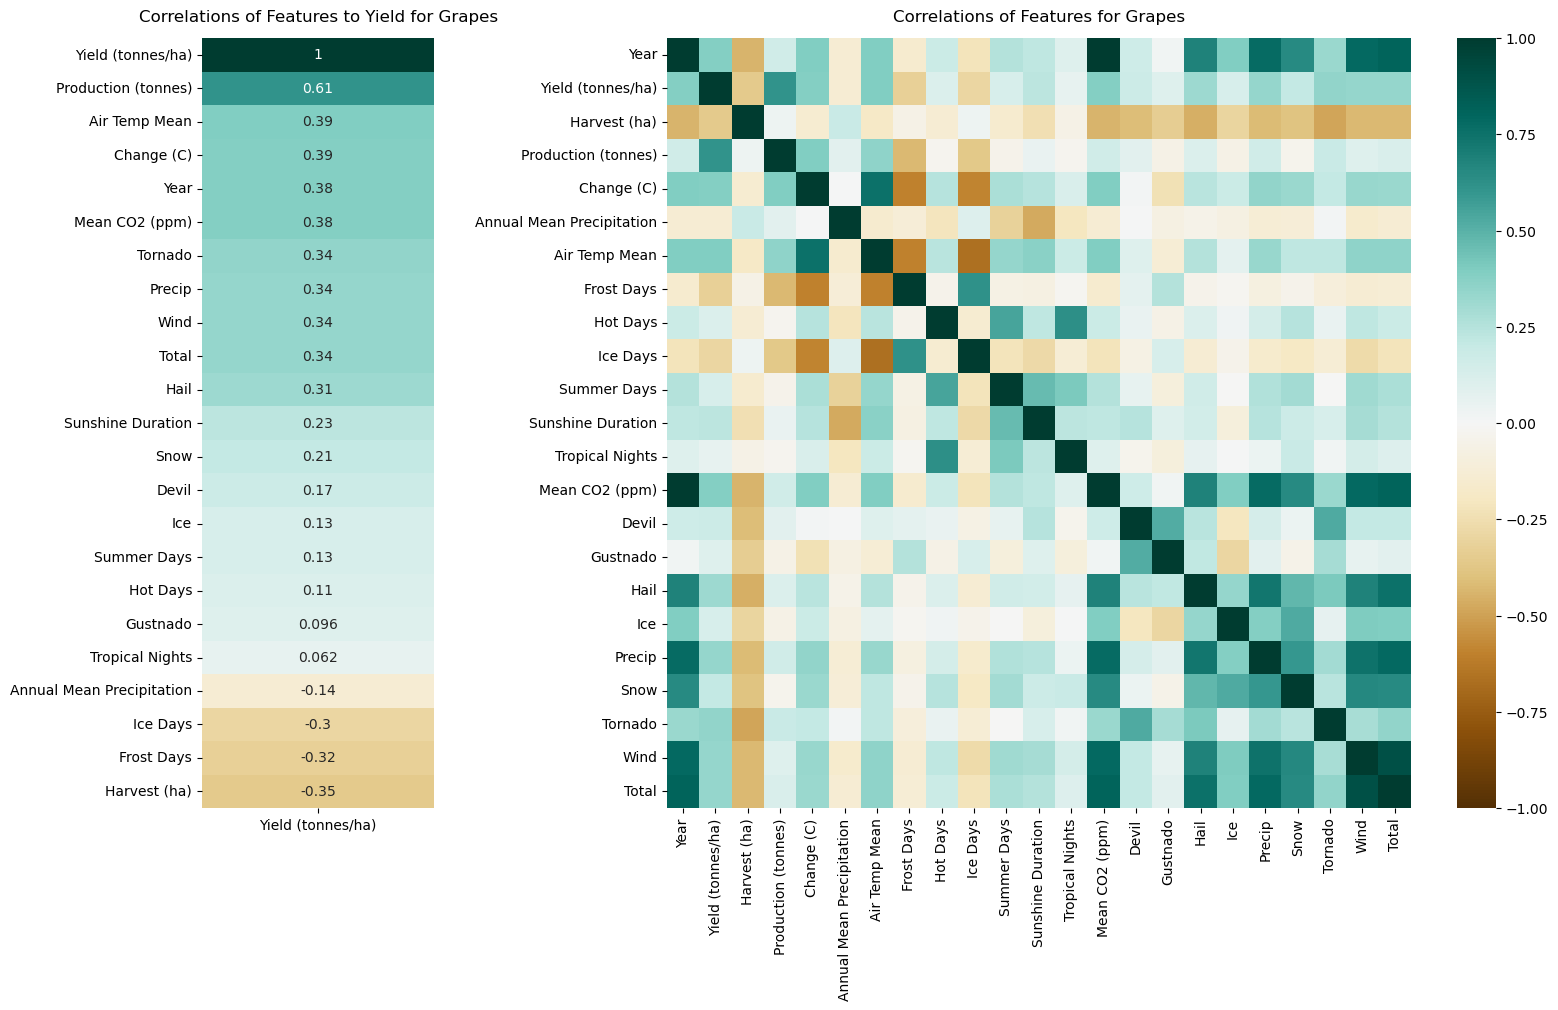

In [20]:
for crop in crop_names:
    crop_df = df[df["Item"] == "Apples"]

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 10), gridspec_kw={'width_ratios': [1, 4]})

    sns.heatmap(crop_df.corr(method="kendall")[['Yield (tonnes/ha)']].sort_values(by='Yield (tonnes/ha)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax1, cbar=False)
    ax1.set_title(f'Correlations of Features to Yield for {crop}', fontdict={'fontsize':12}, pad=12)

    sns.heatmap(crop_df.corr(method="kendall"), vmin=-1, vmax=1, cmap='BrBG', ax=ax2)
    ax2.set_title(f"Correlations of Features for {crop}", fontdict={'fontsize':12}, pad=12)

    plt.subplots_adjust(wspace=0.4)
    # Set the figsize of the first subplot
    #ax1.set_position([0.1, 0.1, 0.6, 0.8])

    # Set the figsize of the second subplot
    #ax2.set_position([0.75, 0.1, 0.2, 0.8])

    plt.show()